# Analysing Gtex code

## importing packages

In [2]:
import numpy as np
import matplotlib as mpl
import seaborn as sb
import pandas as pd


## Reading in files
reading files data files and metadata files downloaded from Gtex portal

Gtex- main data file with counts (unnormalised) 

sample_metadata= metadata for each sample (e.g tissue type and specifics about sequencing)

subject_metadata= metadata for each subject (multiple samples from each subject)

In [4]:
#Gtex=pd.read_table("Documents/bioinformatics practice/GTEx_Analysis_v10_RNASeQCv2.4.2_gene_reads.gct",delimiter="\t",skiprows=2)

In [5]:
subject_metadata=pd.read_table("~/Documents/bioinformatics practice/GTEx_Analysis_v10_Annotations_SubjectPhenotypesDS.txt",delimiter="\t")
sample_metadata=pd.read_table("~/Documents/bioinformatics practice/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt",delimiter="\t",usecols=[0,5,6])
Gtex=pd.read_table("~/Documents/bioinformatics practice/GTEx_Analysis_v10_RNASeQCv2.4.2_gene_tpm.gct",delimiter="\t",header=2)

## investigating data structures
here i just look through and see the general structure of the data

In [7]:
Gtex.shape

(59033, 19618)

In [8]:
display(Gtex)

Name  Description  GTEX-1117F-0005-SM-HL9SH  \
0      ENSG00000223972.5      DDX11L1                   0.00000   
1      ENSG00000227232.5       WASH7P                   1.33343   
2      ENSG00000278267.1    MIR6859-1                   0.00000   
3      ENSG00000243485.5  MIR1302-2HG                   0.00000   
4      ENSG00000237613.2      FAM138A                   0.00000   
...                  ...          ...                       ...   
59028  ENSG00000198695.2       MT-ND6                  95.75380   
59029  ENSG00000210194.1        MT-TE                   0.00000   
59030  ENSG00000198727.2       MT-CYB                 430.55500   
59031  ENSG00000210195.2        MT-TT                   0.00000   
59032  ENSG00000210196.2        MT-TP                   0.00000   

       GTEX-1117F-0011-R10b-SM-GI4VE  GTEX-1117F-0011-R11b-SM-GIN8R  \
0                           0.000000                       0.000000   
1                           3.579280                      10.189300   
2                           0.000000                       0.000000   
3                           0.093825                       0.034191   
4                           0.000000                       0.000000   
...                              ...                            ...   
59028                    4788.560000                    7180.220000   
59029                       6.476660                      17.164800   
59030                   28676.500000                   38598.100000   
59031                       3.077750                       4.486250   
59032                       1.194890                       7.402310   

       GTEX-1117F-0011-R2b-SM-GI4VL  GTEX-1117F-0011-R3a-SM-GJ3PJ  \
0                           0.00000                       0.00000   
1                           2.96650                       3.68280   
2                           0.00000                       0.00000   
3                           0.00000                       0.00000   
4                           0.01766                       0.00000   
...                             ...                           ...   
59028                    7859.33000                    5635.29000   
59029                      15.28750                      12.30860   
59030                   36500.80000                   26520.20000   
59031                      11.41600                       2.21864   
59032                       6.33157                       5.16811   

       GTEX-1117F-0011-R4b-SM-GI4VM  GTEX-1117F-0011-R5a-SM-GI4VW  \
0                          0.012397                       0.00000   
1                          3.599210                       3.51443   
2                          0.000000                       0.00000   
3                          0.024750                       0.00000   
4                          0.000000                       0.00000   
...                             ...                           ...   
59028                   6469.680000                    8253.45000   
59029                     12.425400                      17.74710   
59030                  31737.200000                   38488.70000   
59031                      2.598050                       1.40029   
59032                      1.891220                       3.39776   

       GTEX-1117F-0011-R6a-SM-GI4VX  ...  GTEX-ZZPU-1326-SM-5GZWS  \
0                          0.029395  ...                 0.000000   
1                          4.286380  ...                 5.464380   
2                          0.000000  ...                 0.000000   
3                          0.000000  ...                 0.062071   
4                          0.000000  ...                 0.000000   
...                             ...  ...                      ...   
59028                   6454.330000  ...             14333.800000   
59029                     15.836500  ...                42.846900   
59030                  33241.200000  ...             33738.900000   
59031         

In [9]:
Gtex.loc[Gtex["Description"].isin(["APOBEC3H","CES1","MERTK"]),:]

Name Description  GTEX-1117F-0005-SM-HL9SH  \
7420   ENSG00000153208.18       MERTK                  0.769695   
44670  ENSG00000198848.13        CES1                  3.267750   
55716  ENSG00000100298.16    APOBEC3H                  1.291040   

       GTEX-1117F-0011-R10b-SM-GI4VE  GTEX-1117F-0011-R11b-SM-GIN8R  \
7420                       29.717900                       5.269640   
44670                       0.189769                       0.138307   
55716                       0.142174                       0.233144   

       GTEX-1117F-0011-R2b-SM-GI4VL  GTEX-1117F-0011-R3a-SM-GJ3PJ  \
7420                       7.101750                     20.485800   
44670                      0.276529                      0.535789   
55716                      0.169507                      0.076866   

       GTEX-1117F-0011-R4b-SM-GI4VM  GTEX-1117F-0011-R5a-SM-GI4VW  \
7420                      15.418900                     29.743600   
44670                      0.525626                      1.492950   
55716                      0.112514                      0.121285   

       GTEX-1117F-0011-R6a-SM-GI4VX  ...  GTEX-ZZPU-1326-SM-5GZWS  \
7420                      18.431500  ...                30.169500   
44670                      1.404640  ...                 6.904860   
55716                      0.222328  ...                 0.893537   

       GTEX-ZZPU-1426-SM-5GZZ6  GTEX-ZZPU-1826-SM-5E43L  \
7420                 17.630100                17.728600   
44670                12.106500                44.990600   
55716                 0.416486                 0.229522   

       GTEX-ZZPU-2126-SM-5EGIU  GTEX-ZZPU-2226-SM-5EGIV  \
7420                 23.010400                 2.316660   
44670                 6.212570                 0.695146   
55716                 0.278154                 0.321672   

       GTEX-ZZPU-2326-SM-GOQYU  GTEX-ZZPU-2426-SM-5E44I  \
7420                  23.75240                49.024200   
44670                 22.58190                53.223700   
55716                  1.36923                 0.444403   

       GTEX-ZZPU-2526-SM-GOQZ3  GTEX-ZZPU-2626-SM-5E45Y  \
7420                   25.9759                 4.256440   
44670                  28.2696                 4.191670   
55716                   0.4575                 0.030588   

       GTEX-ZZPU-2726-SM-5NQ8O  
7420                 39.080200  
44670               116.900000  
55716                 0.272273  

[3 rows x 19618 columns]

In [10]:
sample_metadata["SAMPID"]

0        BMS-X4LF-0126-SM-4JBHL
1        BMS-X4LF-0226-SM-4JBJ3
2        BMS-X4LF-0326-SM-4JBIR
3        BMS-X4LF-0426-SM-4JBIS
4        BMS-X4LF-0526-SM-4JBHX
                  ...          
48226            K-562-SM-E9EZC
48227            K-562-SM-E9EZI
48228            K-562-SM-E9EZO
48229            K-562-SM-E9EZT
48230            K-562-SM-E9EZZ
Name: SAMPID, Length: 48231, dtype: object

## cleaning data

here i remove all the samples within the sample metadata that are **not** part of the main Gtex dataset (so they have no trascriptomic data), this happens because i may not have access to some of the data due to privacy concerns

In [12]:
sample_metadata=sample_metadata.loc[sample_metadata["SAMPID"].isin(Gtex.columns),:] # similar to %in% in R
sample_metadata=sample_metadata.reset_index(drop=True) #reset number index so dont have to call by specific index from before

### merging sample and subject information

so here i need to link the samples and subjects together, 1 subject can have multiple samples so i take reconstruct the  Subject ID for each sample, I can do this becasue the Subject Id is the first 2 parts of the sample ID

e.g Gtex-117F = Subject
GTEX-1117F-0005-SM-HL9SH= Sample

so i split the sample ID and make the subject then create a new column on the sample metadata

I then merge the subject data with the sampledata based on the Subject ID, so i no longer need subect metadata

In [14]:
import re

for i,j in enumerate(sample_metadata["SAMPID"]):
    #print (j[5:])
    subject_gtex=j[:5]
    #print(subject_gtex)
    subjID= re.sub('-.*','',(j[5:]))
    new_sub_id= subject_gtex+subjID
    #print (new_sub_id)
    sample_metadata.loc[[i],["SUBJID"]]=new_sub_id
    

In [15]:
sample_metadata=sample_metadata.merge(subject_metadata,on="SUBJID")

further exploration of data and testing out some functions

size- counts how many rows present in each grouping (use in groups)

valuecounts- give raw counts of each unique value (use in series )

In [17]:
#print(sample_metadata["AGE"].value_counts())
#print(sample_metadata["SMTS"].value_counts())
#print(sample_metadata.groupby(["SMTSD","SEX"]).describe())
sample_metadata.loc[sample_metadata.isna().any(axis=1),:].groupby(["SMTSD","AGE"]).size().unstack()
#sample_metadata.groupby(["SMTSD","AGE"]).size().unstack().replace(np.NAN,0)


AGE                                  30-39  40-49  50-59  60-69  70-79
SMTSD                                                                 
Adipose - Subcutaneous                 2.0    2.0    4.0    4.0    1.0
Artery - Aorta                         NaN    1.0    NaN    NaN    NaN
Artery - Coronary                      NaN    1.0    NaN    NaN    NaN
Artery - Tibial                        2.0    1.0    4.0    2.0    1.0
Bladder                                NaN    1.0    NaN    NaN    NaN
Cells - Cultured fibroblasts           2.0    1.0    5.0    4.0    1.0
Cells - EBV-transformed lymphocytes    2.0    NaN    3.0    3.0    1.0
Cervix - Ectocervix                    NaN    1.0    NaN    NaN    NaN
Cervix - Endocervix                    NaN    1.0    1.0    NaN    NaN
Colon - Transverse                     NaN    1.0    NaN    NaN    NaN
Esophagus - Mucosa                     NaN    1.0    1.0    NaN    NaN
Esophagus - Muscularis                 NaN    1.0    NaN    NaN    NaN
Fallopian Tube                         NaN    1.0    1.0    NaN    NaN
Heart - Left Ventricle                 NaN    1.0    NaN    NaN    NaN
Liver                                  NaN    1.0    NaN    NaN    NaN
Lung                                   NaN    1.0    NaN    NaN    NaN
Muscle - Skeletal                      1.0    2.0    3.0    2.0    2.0
Nerve - Tibial                         1.0    2.0    2.0    3.0    2.0
Ovary                                  NaN    1.0    1.0    NaN    NaN
Pancreas                               NaN    1.0    NaN    NaN    NaN
Skin - Sun Exposed (Lower leg)         1.0    1.0    3.0    3.0    1.0
Spleen                                 NaN    1.0    NaN    NaN    NaN
Stomach                                NaN    1.0    NaN    NaN    NaN
Thyroid                                NaN    NaN    1.0    NaN    NaN
Uterus                                 NaN    1.0    NaN    NaN    NaN
Vagina                                 NaN    1.0    1.0    NaN    NaN
Whole Blood                            2.0    1.0    6.0    4.0    2.0

# Exploring sample metadata

## visualisation 1
**number of samples in dataset for each tissue**
,
made a barchart, using value counts on tissue type column, plot index(names) by values(counts)

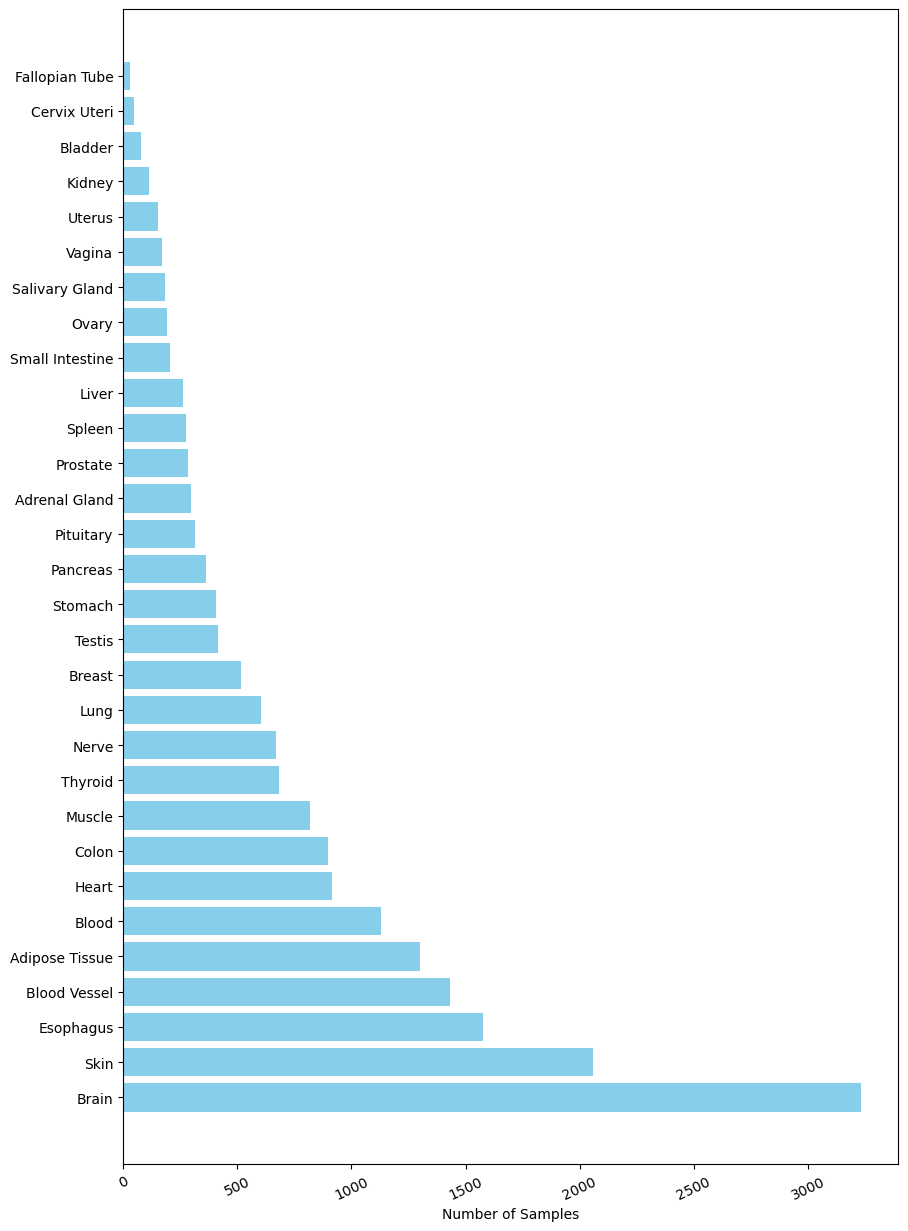

In [19]:
mpl.pyplot.figure(figsize=(10,15))
mpl.pyplot.barh(sample_metadata['SMTS'].value_counts().index,sample_metadata['SMTS'].value_counts().values,height=0.8,color="Skyblue")
mpl.pyplot.xticks(rotation=25)
mpl.pyplot.xlabel("Number of Samples")
mpl.pyplot.show()

## visualisation 2
**number of samples in each tissue type between sex**

first had to get grouping of tissue type and sex then got size
**NOTE** - replaced NAN with 0, there were some tissues that are obviously sex specific so grouping returned NAN, so replaced NAN with 0 e.g 0 men with Uterus sample

remember use leftcounts = dependent offset to plot both on same bar

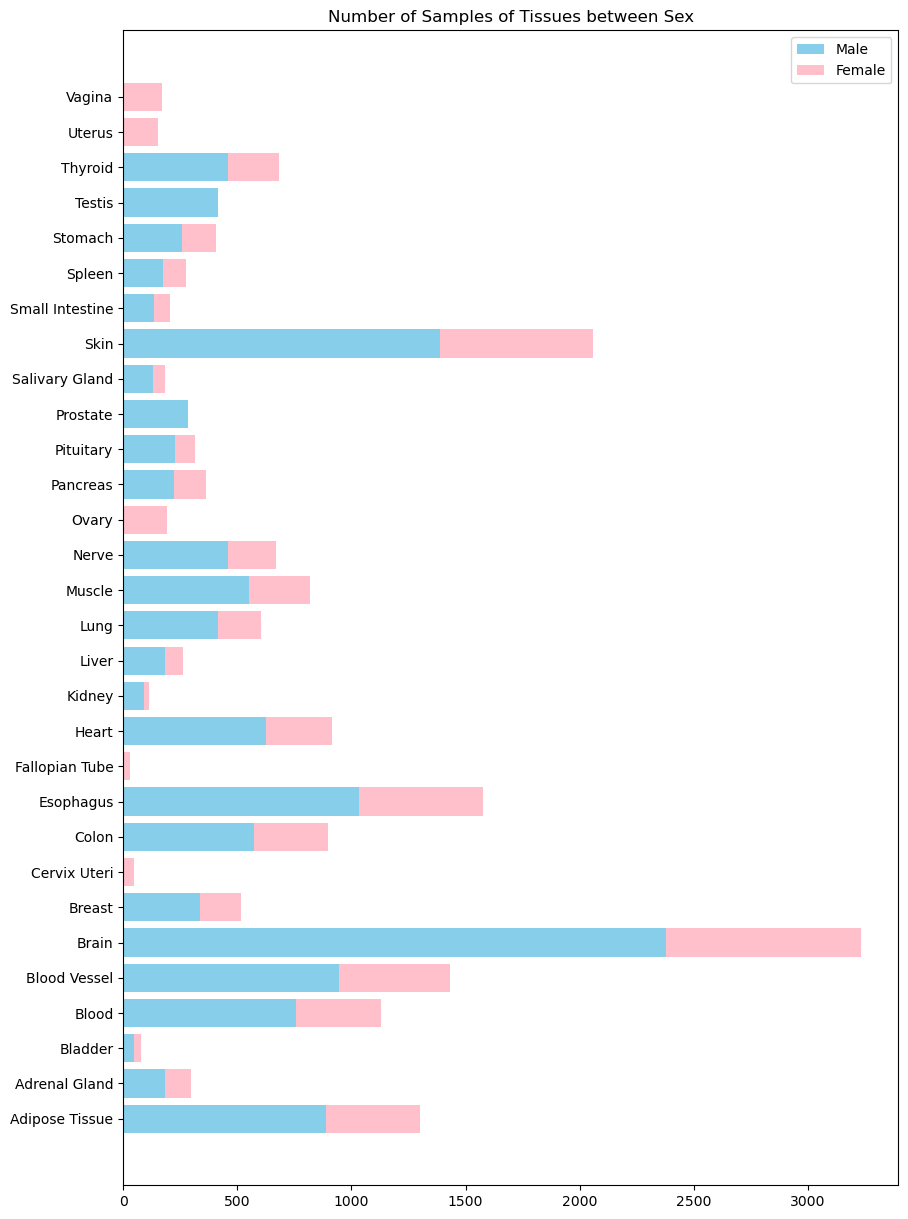

In [21]:
counts=sample_metadata.groupby(["SMTS","SEX"]).size().unstack().replace(np.NAN,0)

mpl.pyplot.figure(figsize=(10,15))
mpl.pyplot.barh(counts.index,counts[1].values,height=0.8,color="Skyblue",label="Male")
mpl.pyplot.barh(counts.index,counts[2].values,height=0.8,color="pink",label="Female",left=counts[1].values)
#mpl.pyplot.yticks(rotation=5,labels=counts.index)
mpl.pyplot.legend()
mpl.pyplot.title("Number of Samples of Tissues between Sex")
mpl.pyplot.savefig("Figures/Number_of_samples_between_sex.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

In [22]:
sample_metadata.groupby(["SUBJID"]).size().sort_values()

SUBJID
GTEX-14PJP     1
GTEX-RN5K      3
GTEX-13CZU     3
GTEX-U3ZG      4
GTEX-S3LF      4
              ..
GTEX-11GSP    38
GTEX-12WSD    38
GTEX-15CHQ    38
GTEX-1JMLX    39
GTEX-15ER7    39
Length: 946, dtype: int64

## Visualisation 3
**number of samples in each tissue type between each age group**

similar method to earlier between sex
5 age groups, used for loop to plot all of them
Left (offset) needs to be a series (each bar)
also manually set colour bar, but could use Cmap and choose random

In [24]:
colour=["red","orange","skyblue","purple","pink","grey"]

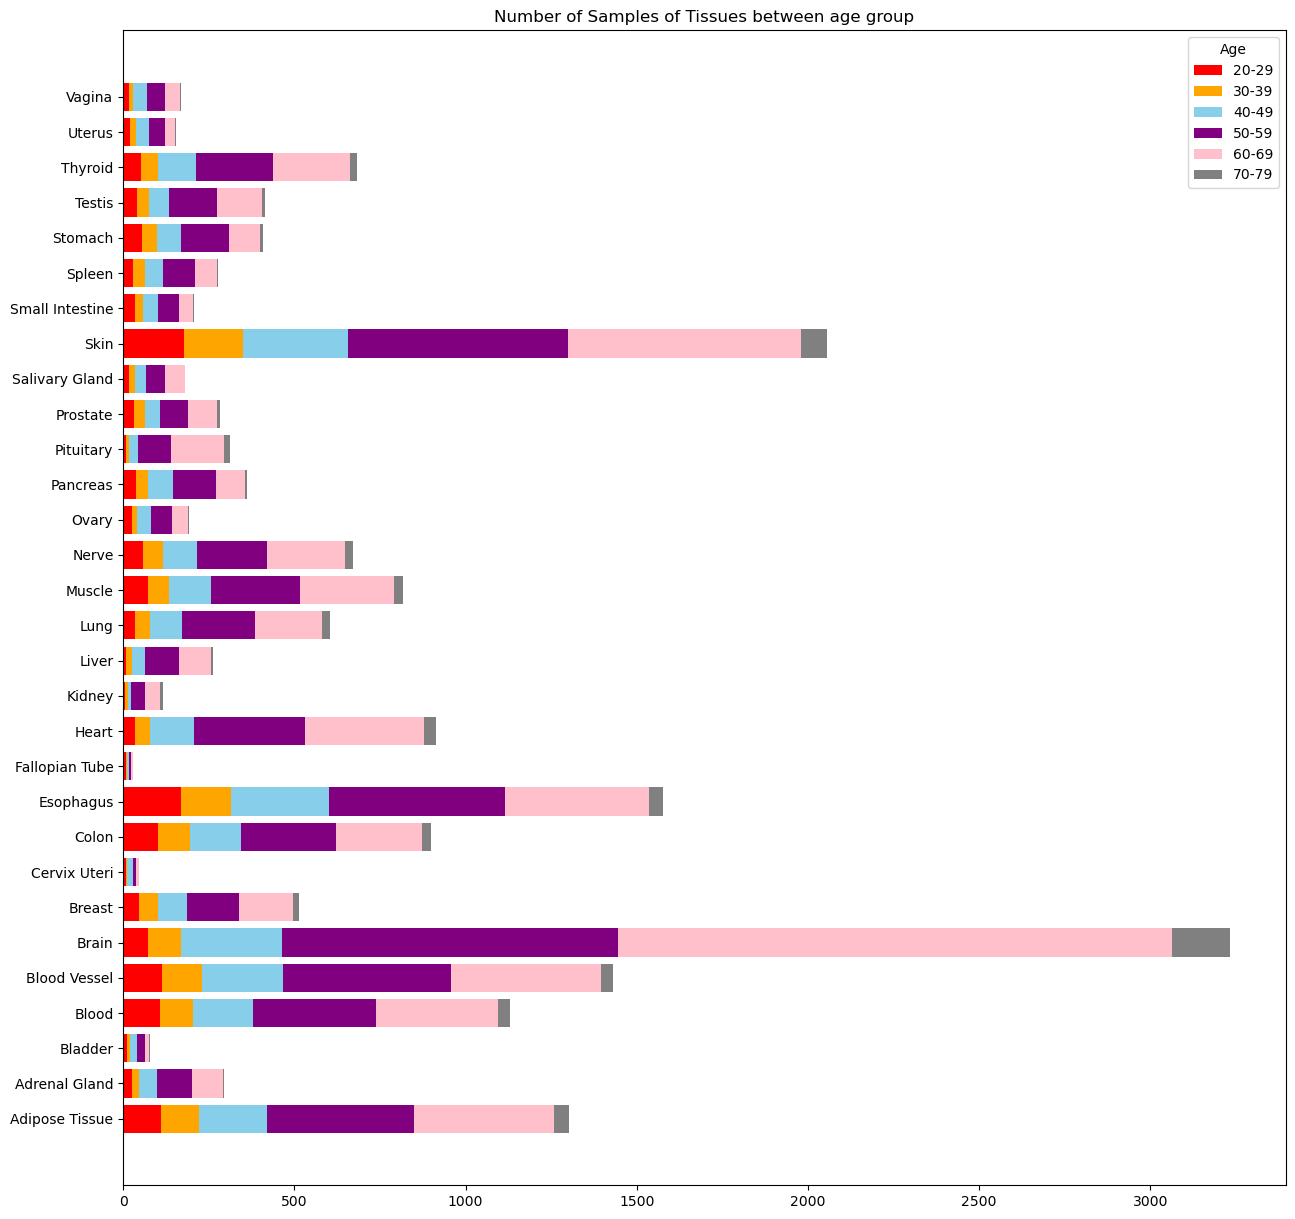

In [25]:
counts=sample_metadata.groupby(["SMTS","AGE"]).size().unstack().replace(np.NAN,0)
left_offset = np.zeros(len(counts.index))
#colour = list(np.random.rand(7,3))
mpl.pyplot.figure(figsize=(15,15))
for i,j in enumerate(counts.columns):
    mpl.pyplot.barh(counts.index,counts.iloc[:,i].values,height=0.8,color=colour[i],label=j,left=left_offset)
    left_offset=left_offset+counts.iloc[:,i].values
#mpl.pyplot.barh(counts.index,counts[1].values,height=0.8,color="Skyblue",label="Male")
#mpl.pyplot.barh(counts.index,counts[2].values,height=0.8,color="pink",label="Female")
#xlab
#mpl.pyplot.yticks(rotation=5,labels=counts.index)
mpl.pyplot.legend(title="Age")
mpl.pyplot.title("Number of Samples of Tissues between age group")
mpl.pyplot.savefig("Figures/Number_of_samples_between_tissue_type.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()


easier method of doing so using .plot (not as easy to edit)

<Axes: ylabel='SMTS'>

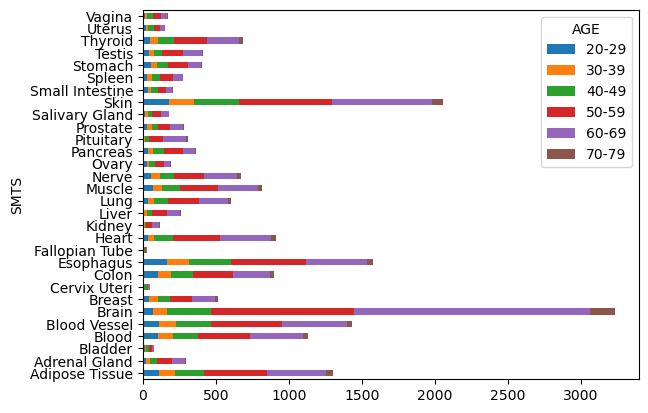

In [27]:
counts.plot(kind="barh",stacked=True)

# exploring transcriptomic data

In [29]:
Gtex

Name  Description  GTEX-1117F-0005-SM-HL9SH  \
0      ENSG00000223972.5      DDX11L1                   0.00000   
1      ENSG00000227232.5       WASH7P                   1.33343   
2      ENSG00000278267.1    MIR6859-1                   0.00000   
3      ENSG00000243485.5  MIR1302-2HG                   0.00000   
4      ENSG00000237613.2      FAM138A                   0.00000   
...                  ...          ...                       ...   
59028  ENSG00000198695.2       MT-ND6                  95.75380   
59029  ENSG00000210194.1        MT-TE                   0.00000   
59030  ENSG00000198727.2       MT-CYB                 430.55500   
59031  ENSG00000210195.2        MT-TT                   0.00000   
59032  ENSG00000210196.2        MT-TP                   0.00000   

       GTEX-1117F-0011-R10b-SM-GI4VE  GTEX-1117F-0011-R11b-SM-GIN8R  \
0                           0.000000                       0.000000   
1                           3.579280                      10.189300   
2                           0.000000                       0.000000   
3                           0.093825                       0.034191   
4                           0.000000                       0.000000   
...                              ...                            ...   
59028                    4788.560000                    7180.220000   
59029                       6.476660                      17.164800   
59030                   28676.500000                   38598.100000   
59031                       3.077750                       4.486250   
59032                       1.194890                       7.402310   

       GTEX-1117F-0011-R2b-SM-GI4VL  GTEX-1117F-0011-R3a-SM-GJ3PJ  \
0                           0.00000                       0.00000   
1                           2.96650                       3.68280   
2                           0.00000                       0.00000   
3                           0.00000                       0.00000   
4                           0.01766                       0.00000   
...                             ...                           ...   
59028                    7859.33000                    5635.29000   
59029                      15.28750                      12.30860   
59030                   36500.80000                   26520.20000   
59031                      11.41600                       2.21864   
59032                       6.33157                       5.16811   

       GTEX-1117F-0011-R4b-SM-GI4VM  GTEX-1117F-0011-R5a-SM-GI4VW  \
0                          0.012397                       0.00000   
1                          3.599210                       3.51443   
2                          0.000000                       0.00000   
3                          0.024750                       0.00000   
4                          0.000000                       0.00000   
...                             ...                           ...   
59028                   6469.680000                    8253.45000   
59029                     12.425400                      17.74710   
59030                  31737.200000                   38488.70000   
59031                      2.598050                       1.40029   
59032                      1.891220                       3.39776   

       GTEX-1117F-0011-R6a-SM-GI4VX  ...  GTEX-ZZPU-1326-SM-5GZWS  \
0                          0.029395  ...                 0.000000   
1                          4.286380  ...                 5.464380   
2                          0.000000  ...                 0.000000   
3                          0.000000  ...                 0.062071   
4                          0.000000  ...                 0.000000   
...                             ...  ...                      ...   
59028                   6454.330000  ...             14333.800000   
59029                     15.836500  ...                42.846900   
59030                  33241.200000  ...             33738.900000   
59031         

In [30]:
#Gtex.loc[["FOXO3"],:].iloc[:,1:]

## matching metadata with transcriptomics

Here i create mappings, to match each sample with its associated metadata, I use map commands 

The R equivalent would be using match,

I also set the index as the Gene symbol and drop the ensemble codes

In [32]:
mapping_col=Gtex.columns[2:].map(sample_metadata.set_index("SAMPID")["SMTS"])
mapping_col_age=Gtex.columns[2:].map(sample_metadata.set_index("SAMPID")["AGE"])
mapping_sex=Gtex.columns[2:].map(sample_metadata.set_index("SAMPID")["SEX"])


EnsGene_names=Gtex.loc[:,"Name"]

In [33]:
Gtex.set_index("Description",inplace=True)




In [34]:
Gtex.drop("Name",inplace=True,axis=1)

here i remove any genes that just have 0, neeed to save a bit of space so Jupyter doesn't creash

In [36]:
Gtex=Gtex.loc[Gtex.sum(axis=1)>0,:]

In [37]:
Gtex.T.groupby(mapping_col).mean().T

Adipose Tissue  Adrenal Gland       Bladder        Blood  \
Description                                                             
DDX11L1            0.006554       0.012322      0.006458     0.023760   
WASH7P             4.039515       3.024461      5.043501     3.232202   
MIR6859-1          0.008590       0.007569      0.007900     0.011257   
MIR1302-2HG        0.016722       0.021667      0.014246     0.010108   
FAM138A            0.006226       0.007993      0.004659     0.004495   
...                     ...            ...           ...          ...   
MT-ND6          5764.524480    7189.969156   8893.478052  2565.760377   
MT-TE             20.085257      20.735489     24.287297     8.583534   
MT-CYB         24744.149347   29594.728102  23171.674545  4073.512781   
MT-TT              0.794996       1.441426      0.353221     1.093182   
MT-TP              1.690248       1.940244      1.698701     0.808483   

             Blood Vessel         Brain        Breast  Cervix Uteri  \
Description                                                           
DDX11L1          0.006519      0.009852      0.006977      0.006734   
WASH7P           4.140344      2.816716      4.702083      6.588965   
MIR6859-1        0.009718      0.005011      0.015270      0.017355   
MIR1302-2HG      0.013443      0.031329      0.017760      0.009559   
FAM138A          0.005931      0.009133      0.006718      0.006590   
...                   ...           ...           ...           ...   
MT-ND6        6548.341301   9243.562452   4670.387358   3364.081255   
MT-TE           24.031570     23.962721     14.669713      8.568379   
MT-CYB       14118.099217  32224.865365  24693.010914  14465.100851   
MT-TT            0.587984      1.491896      0.872311      0.213531   
MT-TP            2.251870      3.530369      2.082763      0.988249   

                    Colon     Esophagus  ...      Prostate  Salivary Gland  \
Description                              ...                                 
DDX11L1          0.008841      0.008342  ...      0.010709        0.006434   
WASH7P           4.543501      4.126478  ...      7.639416        3.917216   
MIR6859-1        0.006096      0.010779  ...      0.023630        0.012045   
MIR1302-2HG      0.019164      0.017022  ...      0.017135        0.018247   
FAM138A          0.007837      0.007149  ...      0.006941        0.006064   
...                   ...           ...  ...           ...             ...   
MT-ND6        6560.153314   7452.540282  ...   4010.151738     3468.923597   
MT-TE           19.369840     21.428606  ...      7.957477        8.657895   
MT-CYB       24922.288151  22716.780811  ...  25891.728936    17932.825083   
MT-TT            0.810086      0.551655  ...      0.308122        0.529045   
MT-TP            2.059126      2.293381  ...      1.667817        1.132276   

                     Skin  Small Intestine        Spleen       Stomach  \
Description                                                              
DDX11L1          0.007747         0.011034      0.016335      0.007580   
WASH7P           4.905837         4.890010      6.816727      3.452982   
MIR6859-1        0.016005         0.007432      0.014278      0.018612   
MIR1302-2HG      0.018057         0.015744      0.016369      0.022060   
FAM138A          0.006246         0.006748      0.006755      0.006684   
...                   ...              ...           ...           ...   
MT-ND6        7973.755503      9953.269807   6433.433058  10195.196585   
MT-TE           28.352643        31.745130     24.931059     30.484637   
MT-CYB       15829.561526     24978.884976  12495.321733  28115.710319   
MT-TT            1.374976         1.280452      1.110123      0.897550   
MT-TP            1.857311         1.992423      1.377802      2.303162   

                   Testis       Thyroid        Uterus        Vagina  
Description                                                          
DDX11L1          0.23

In [38]:
mapping_col.unique()

Index(['Blood', 'Brain', 'Adipose Tissue', 'Muscle', 'Blood Vessel', 'Heart',
       'Thyroid', 'Kidney', 'Uterus', 'Vagina', 'Breast', 'Skin',
       'Salivary Gland', 'Adrenal Gland', 'Lung', 'Spleen', 'Pancreas',
       'Esophagus', 'Stomach', 'Colon', 'Small Intestine', 'Prostate',
       'Testis', 'Nerve', 'Liver', 'Pituitary', 'Ovary', 'Bladder',
       'Cervix Uteri', 'Fallopian Tube'],
      dtype='object')

In [39]:
Gtex.columns

Index(['GTEX-1117F-0005-SM-HL9SH', 'GTEX-1117F-0011-R10b-SM-GI4VE',
       'GTEX-1117F-0011-R11b-SM-GIN8R', 'GTEX-1117F-0011-R2b-SM-GI4VL',
       'GTEX-1117F-0011-R3a-SM-GJ3PJ', 'GTEX-1117F-0011-R4b-SM-GI4VM',
       'GTEX-1117F-0011-R5a-SM-GI4VW', 'GTEX-1117F-0011-R6a-SM-GI4VX',
       'GTEX-1117F-0011-R7a-SM-H65ZK', 'GTEX-1117F-0226-SM-5GZZ7',
       ...
       'GTEX-ZZPU-1326-SM-5GZWS', 'GTEX-ZZPU-1426-SM-5GZZ6',
       'GTEX-ZZPU-1826-SM-5E43L', 'GTEX-ZZPU-2126-SM-5EGIU',
       'GTEX-ZZPU-2226-SM-5EGIV', 'GTEX-ZZPU-2326-SM-GOQYU',
       'GTEX-ZZPU-2426-SM-5E44I', 'GTEX-ZZPU-2526-SM-GOQZ3',
       'GTEX-ZZPU-2626-SM-5E45Y', 'GTEX-ZZPU-2726-SM-5NQ8O'],
      dtype='object', length=19616)

## Variance stabilisation and selecting top variation

Variance stablising using log2 +1. This is to reduce the effect of large absolute variances caused by highly expressed genes

I then select the top 1000 genes in variance

In [41]:
for i in Gtex.columns:
    Gtex.loc[:,i]=np.log2(Gtex.loc[:,i]+1)
#Gtex = Gtex.apply(lambda x: np.log2(x + 1), axis=0)

#Gtex[:] = np.log2(Gtex.values + 1)

In [42]:
Top_var=Gtex.var(axis=1).sort_values(ascending=False).head(999).index
Gtex_top_var=Gtex.loc[Top_var,:]

## visualisation 4

**General expression across tissues**

I take each group from my mapping (in this case tissue), then i flatten each group value into a series and create a list of series for each tissue type

i can then make this into a boxplot

In [44]:
data_for_plot=[]
for _, group in Gtex_top_var.T.groupby(mapping_col):
    var1=group.values.flatten()
    data_for_plot.append(var1)
    

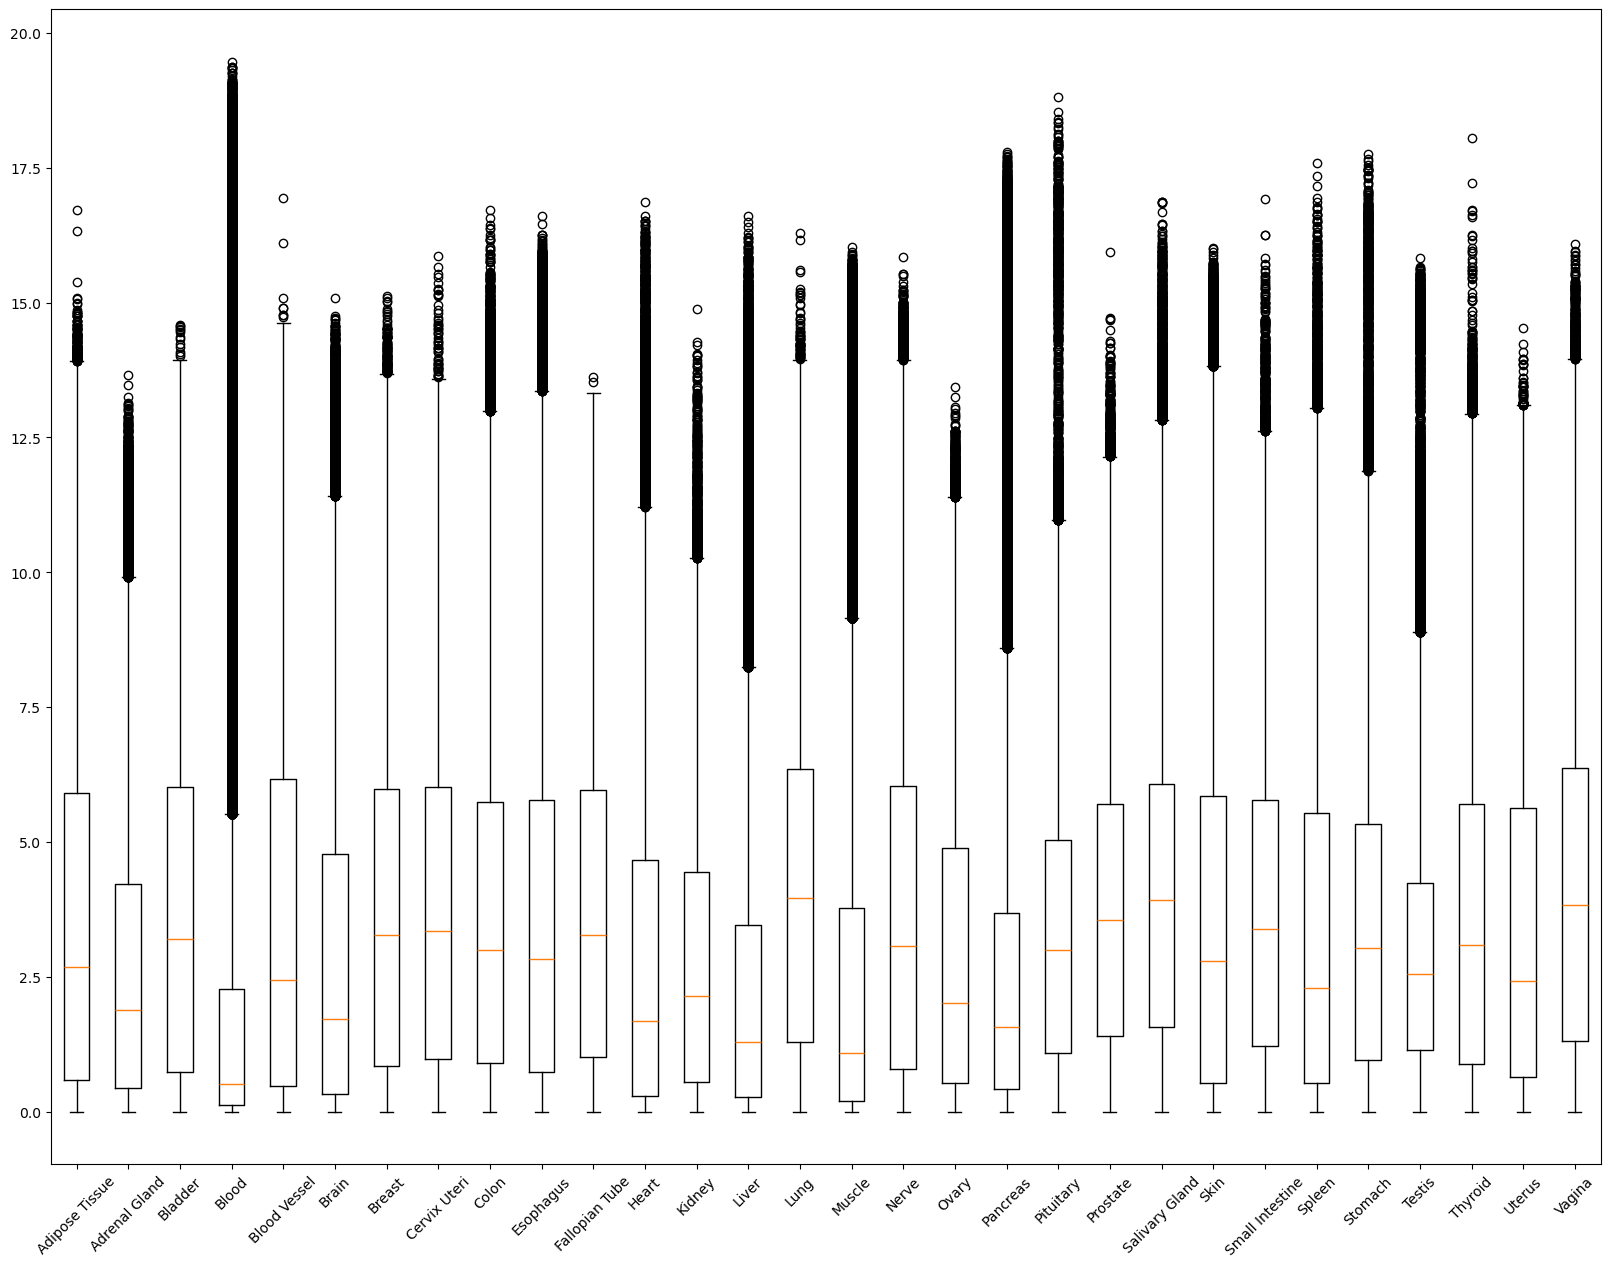

In [45]:
mpl.pyplot.figure(figsize=(20,15))
mpl.pyplot.boxplot(data_for_plot,labels=sorted(mapping_col.unique()))
mpl.pyplot.xticks(rotation=45)
mpl.pyplot.show()

## Visualisation 5
PCA


take 10 PCs thenfit it to transcriptomic data, so have all genes then 10 PCs,
then make scree plot

make the dataframe and reset the index to be gene names, then plot it and colour by tissue types,

did both in seaborn (easier) and matplotlib (harder)

shows good separation by tissue type, meaning variation in gene expression is dominated almost completely by tissue types

In [47]:
from sklearn.decomposition import PCA

In [48]:
PC=PCA(n_components=10)
PC_Gtex=PC.fit_transform(Gtex_top_var.T)

In [49]:
PC.explained_variance_ratio_

array([0.26192609, 0.1518444 , 0.12305138, 0.0814574 , 0.0440655 ,
       0.03497385, 0.02887141, 0.0200468 , 0.0176719 , 0.01579573])

### Scree plot

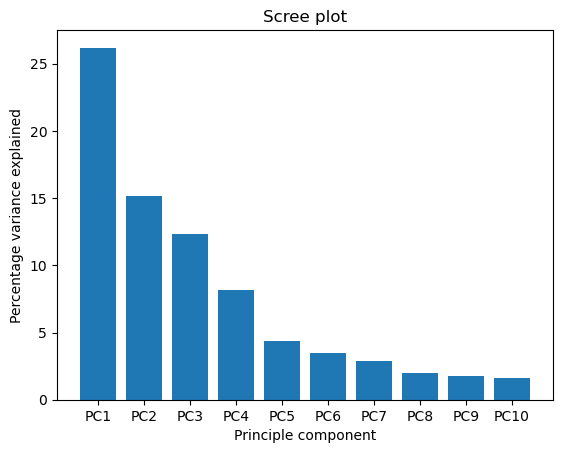

In [51]:
mpl.pyplot.bar(["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"],(PC.explained_variance_ratio_ * 100))
#mpl.pyplot.line
mpl.pyplot.xlabel("Principle component")
mpl.pyplot.ylabel("Percentage variance explained")
mpl.pyplot.title("Scree plot")
mpl.pyplot.savefig("Figures/PCA_scree_plot.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

In [52]:
PCA_Gtex=pd.DataFrame(data=PC_Gtex,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])

In [53]:
PCA_Gtex

PC1        PC2        PC3        PC4        PC5        PC6  \
0      31.075490  35.077501  61.984214  16.154708 -22.874203 -15.341634   
1      81.135110  -1.929150 -21.788924 -11.658833   2.028126  -6.012191   
2      79.416661   3.758465 -15.494948  -4.751863   0.670297   2.221680   
3      65.483657   0.293345  -3.187652   3.512360  -5.282552  -3.957982   
4      86.323976   0.774410 -21.713149 -10.541457   2.885640  -3.323240   
...          ...        ...        ...        ...        ...        ...   
19611 -18.145131 -18.430478  -3.588288 -16.046079  -2.650757 -17.928538   
19612 -30.330168 -37.932995   0.784962  -2.317397  -0.772331  -3.339892   
19613 -46.728296  43.263126 -45.025880  13.498639  -2.368601 -20.806068   
19614   4.192163 -23.004182  21.395256  54.363867  32.622089  -3.342294   
19615 -31.767450 -18.457979  18.081644 -12.475297  -8.804154 -18.497574   

             PC7        PC8        PC9       PC10  
0      -5.194784 -21.339224   2.115207   0.389020  
1      -0.814504   4.373652  -0.650000   3.198865  
2      -0.029954   1.326193  -1.748211   1.138715  
3       3.869823  -2.803581  -8.409990   1.252302  
4      -0.830074   4.924339  -1.765657   1.336072  
...          ...        ...        ...        ...  
19611  11.355451  -1.970531 -14.976640   4.711456  
19612 -17.211533  -3.809203   1.421094  -5.319445  
19613  13.990745   2.494813  -4.899118 -14.802379  
19614  14.387549   9.017728 -13.966389   4.421526  
19615  24.437630  10.387378 -20.764816   6.843830  

[19616 rows x 10 columns]

In [54]:
PCA_Gtex=PCA_Gtex.set_index(Gtex_top_var.T.index)

In [55]:
mapping_col

Index(['Blood', 'Brain', 'Brain', 'Brain', 'Brain', 'Brain', 'Brain', 'Brain',
       'Brain', 'Adipose Tissue',
       ...
       'Thyroid', 'Stomach', 'Esophagus', 'Ovary', 'Vagina', 'Nerve',
       'Blood Vessel', 'Skin', 'Muscle', 'Adipose Tissue'],
      dtype='object', length=19616)

### Seaborn

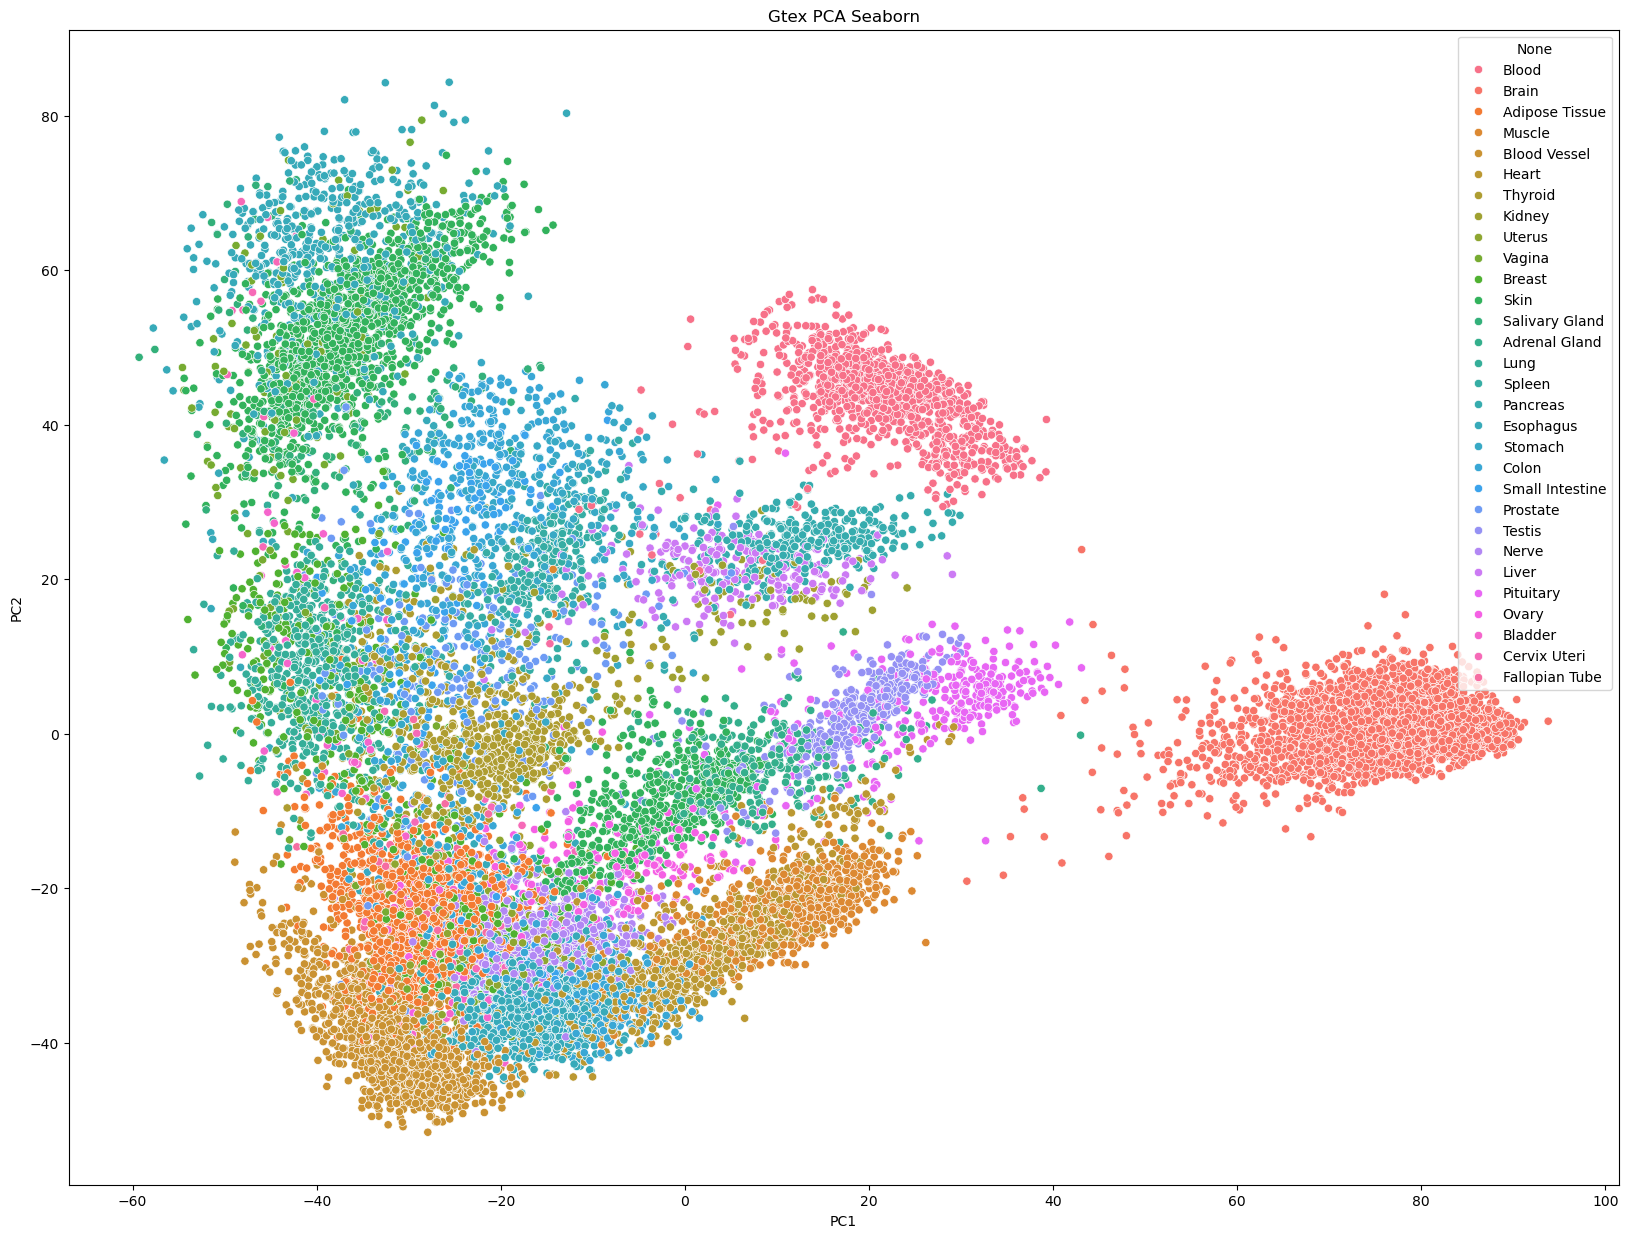

In [57]:
mpl.pyplot.figure(figsize=(20,15))
sb.scatterplot(data=PCA_Gtex,x="PC1",y="PC2",hue=mapping_col)
mpl.pyplot.title("Gtex PCA Seaborn")
mpl.pyplot.savefig("Figures/PCA_tissue_type.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

### matplotlib

had to select colours from Cmap, used Np linspace to try and get a range of distinct colours, needed approx 20
had to plot using for loop and by zipping colour to each group

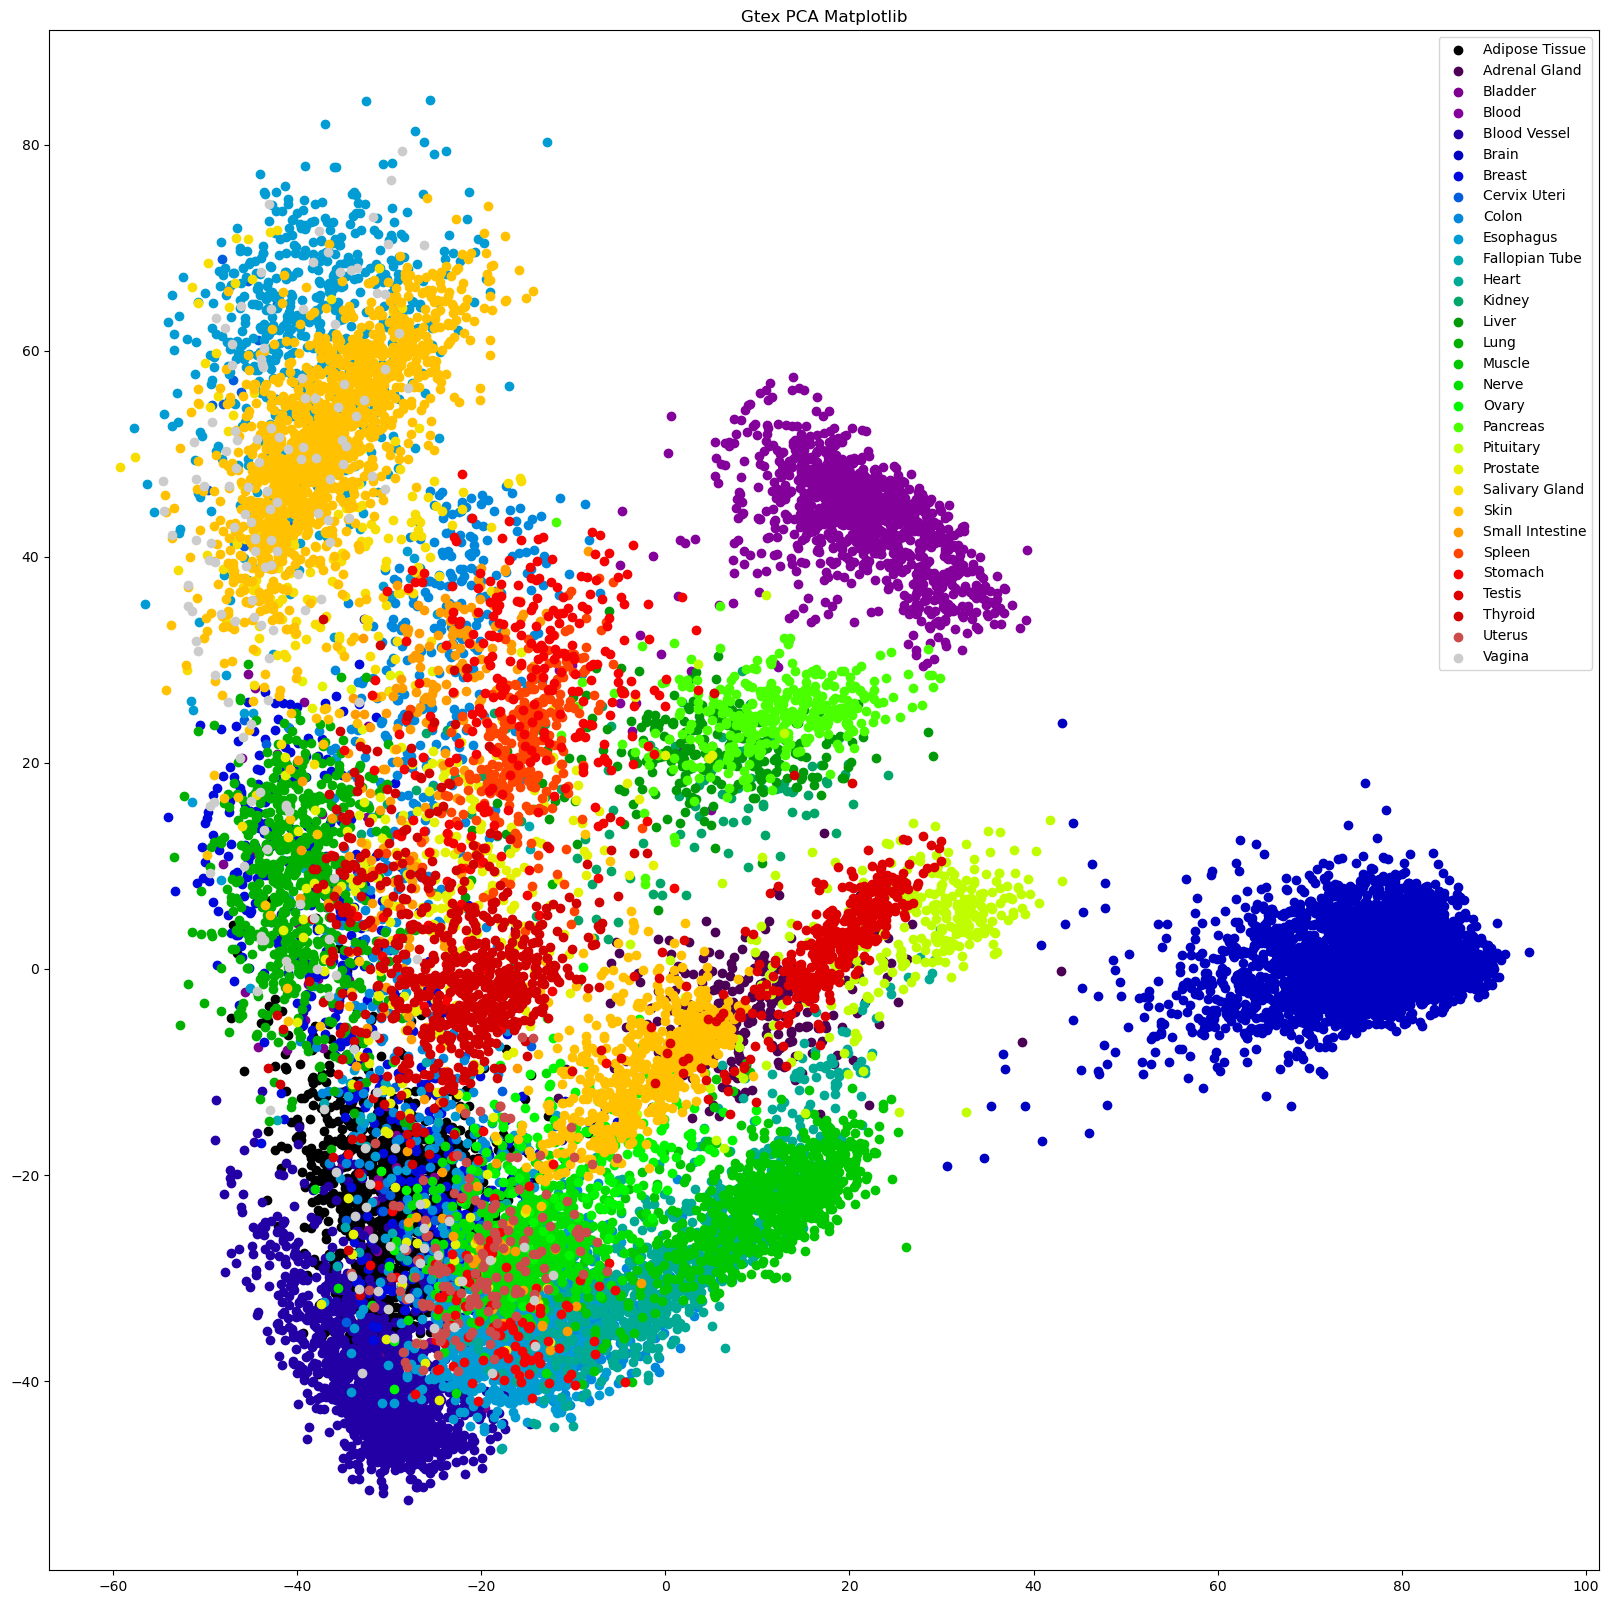

In [59]:
colours=mpl.cm.nipy_spectral(np.linspace(0, 1, len(mapping_col.unique())))

mpl.pyplot.figure(figsize=(20,20))
for (i,j),col in zip(PCA_Gtex.groupby(mapping_col),colours):
    mpl.pyplot.scatter(x=j.iloc[:,0],y=j.iloc[:,1],color=col)
mpl.pyplot.legend(sorted(mapping_col.unique()))
mpl.pyplot.title("Gtex PCA Matplotlib")
mpl.pyplot.show()

## Visualisation 6

**UMAP**

Mkae UMAP from PCA (10 PCs) values 
then plot it and colour it by using our tissue types

plotting very similar between PCA and UMAP

showed seperation of tissues 

In [61]:
import umap
import umap.plot

/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [62]:
umap_Gtex=umap.UMAP().fit_transform(PCA_Gtex)

In [63]:
umap_Gtex=pd.DataFrame(umap_Gtex,columns=["UMAP1","UMAP2"])

In [64]:
umap_Gtex=umap_Gtex.set_index(PCA_Gtex.index)

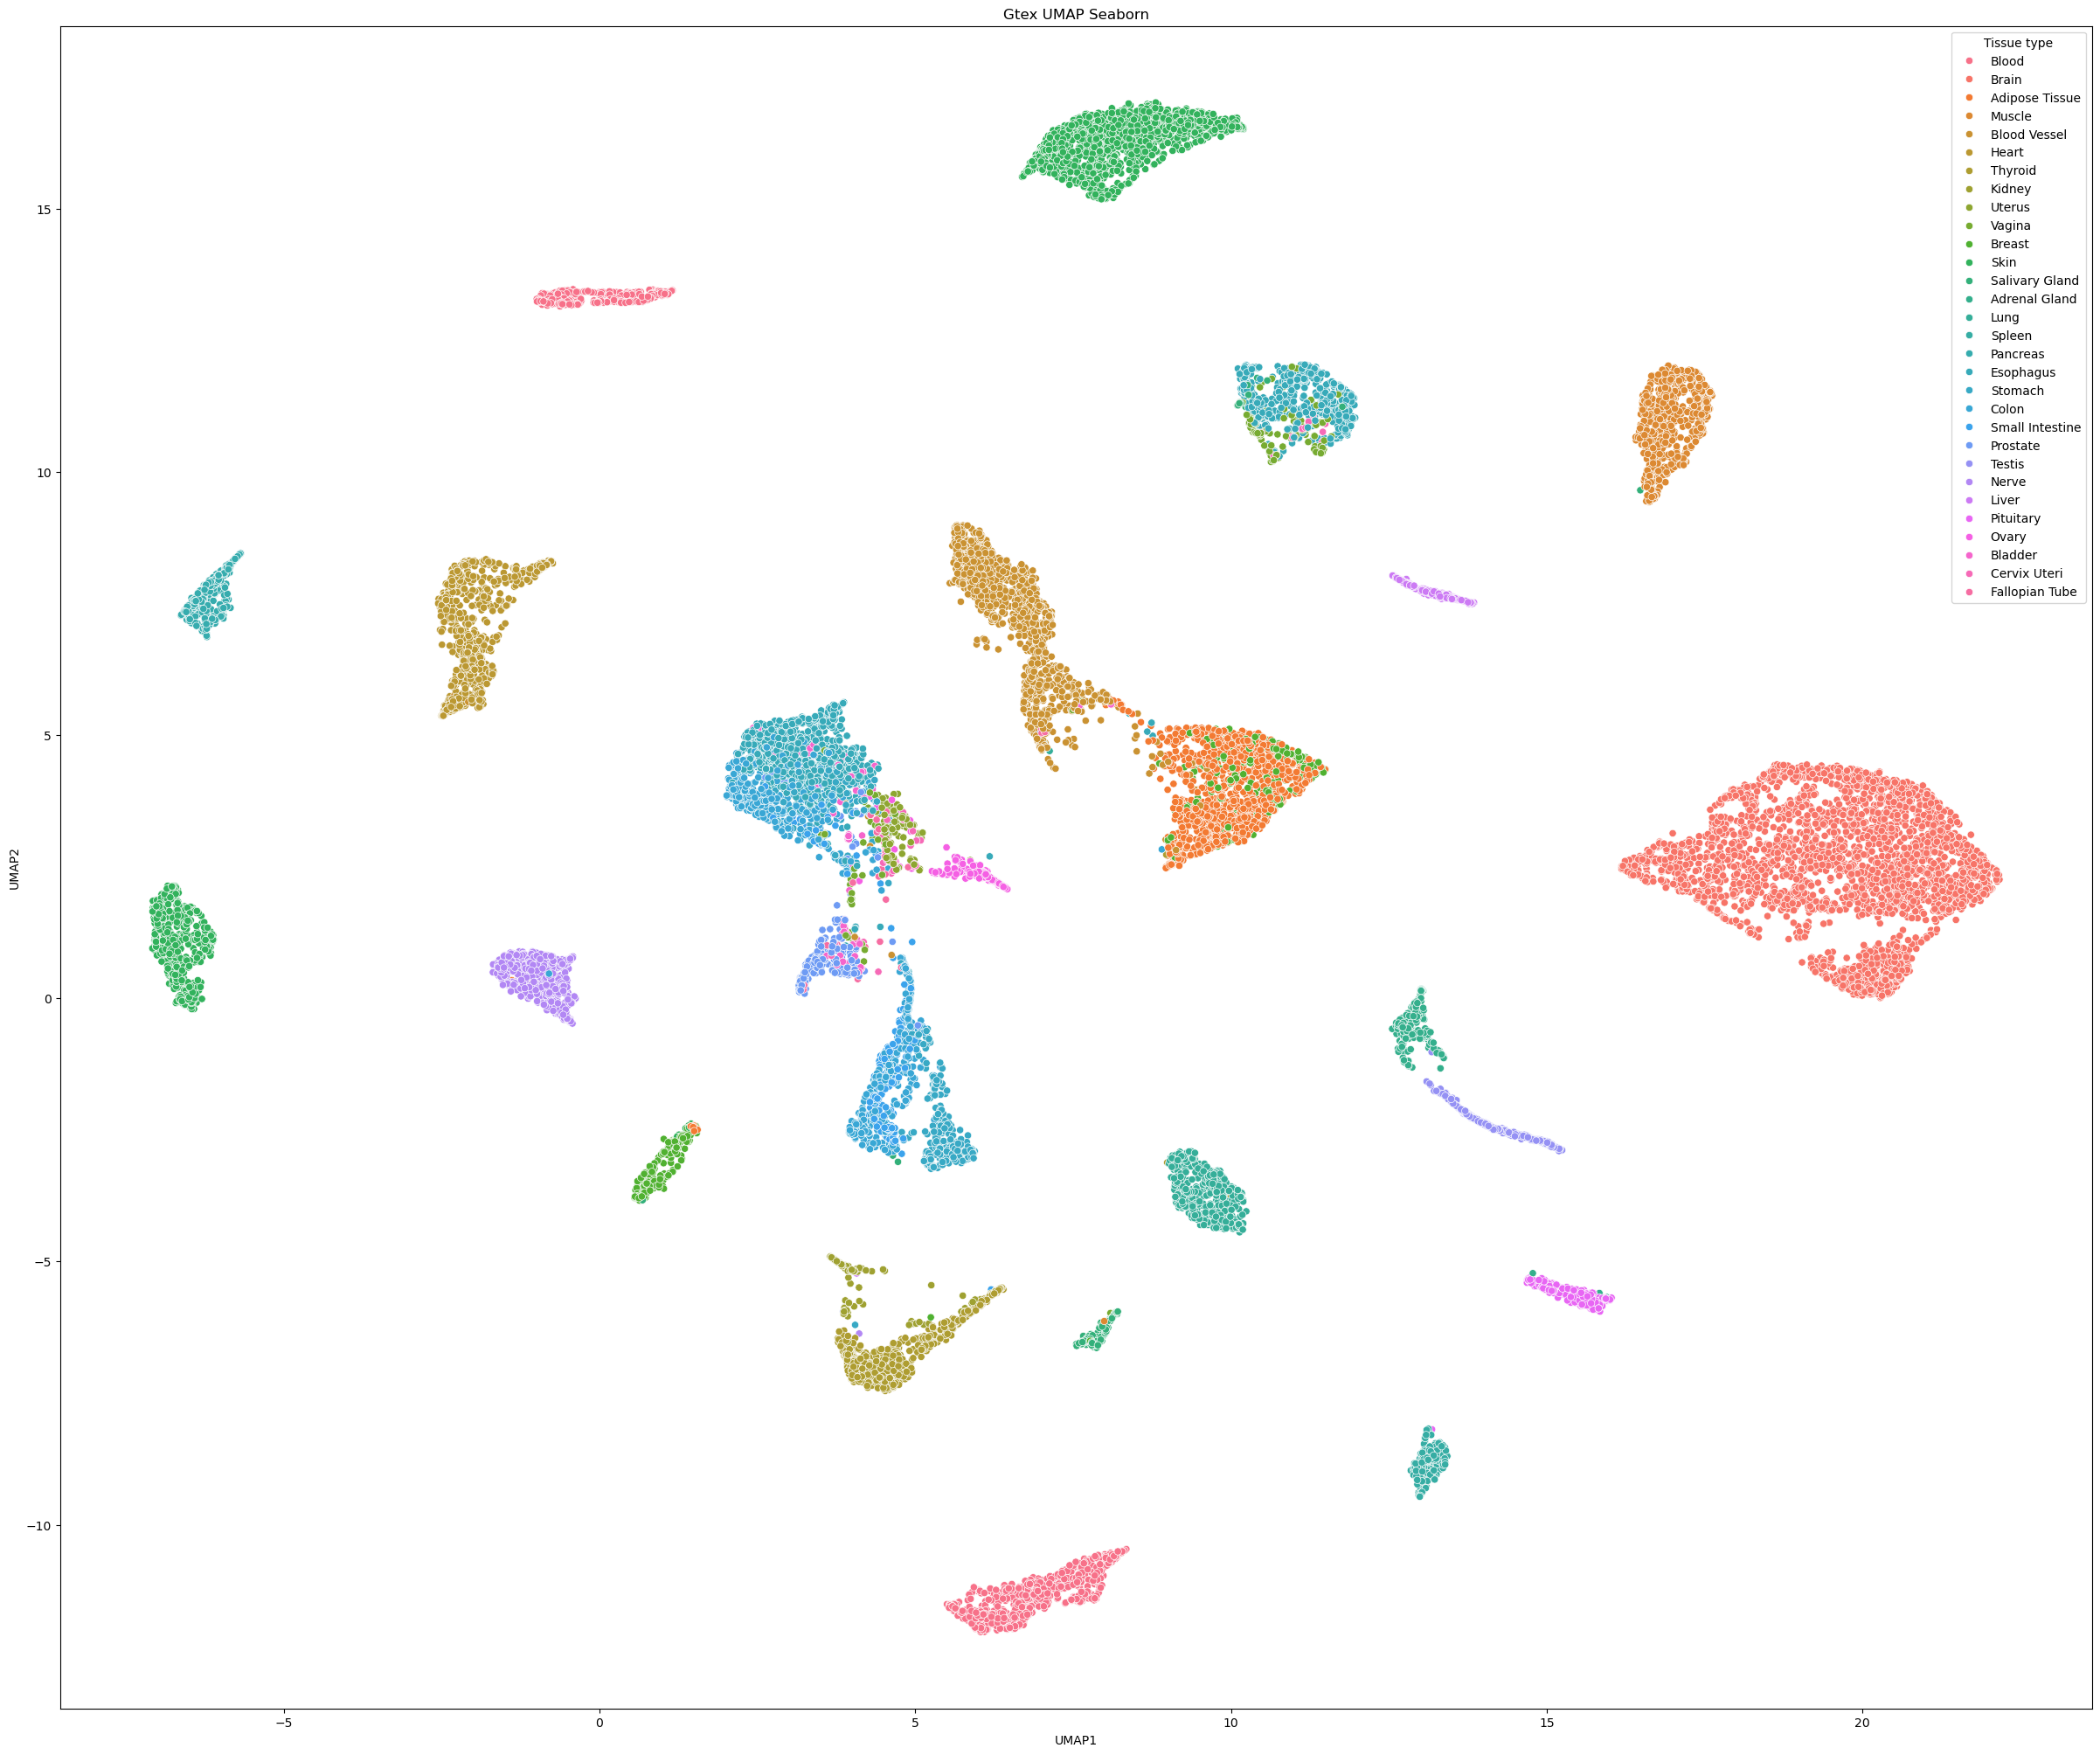

In [65]:
mpl.pyplot.figure(figsize=(30,25))
sb.scatterplot(data=umap_Gtex,x="UMAP1",y="UMAP2",hue=mapping_col,legend="full")
mpl.pyplot.legend(title="Tissue type")
mpl.pyplot.title("Gtex UMAP Seaborn")
mpl.pyplot.savefig("Figures/UMAP_tissue_type.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

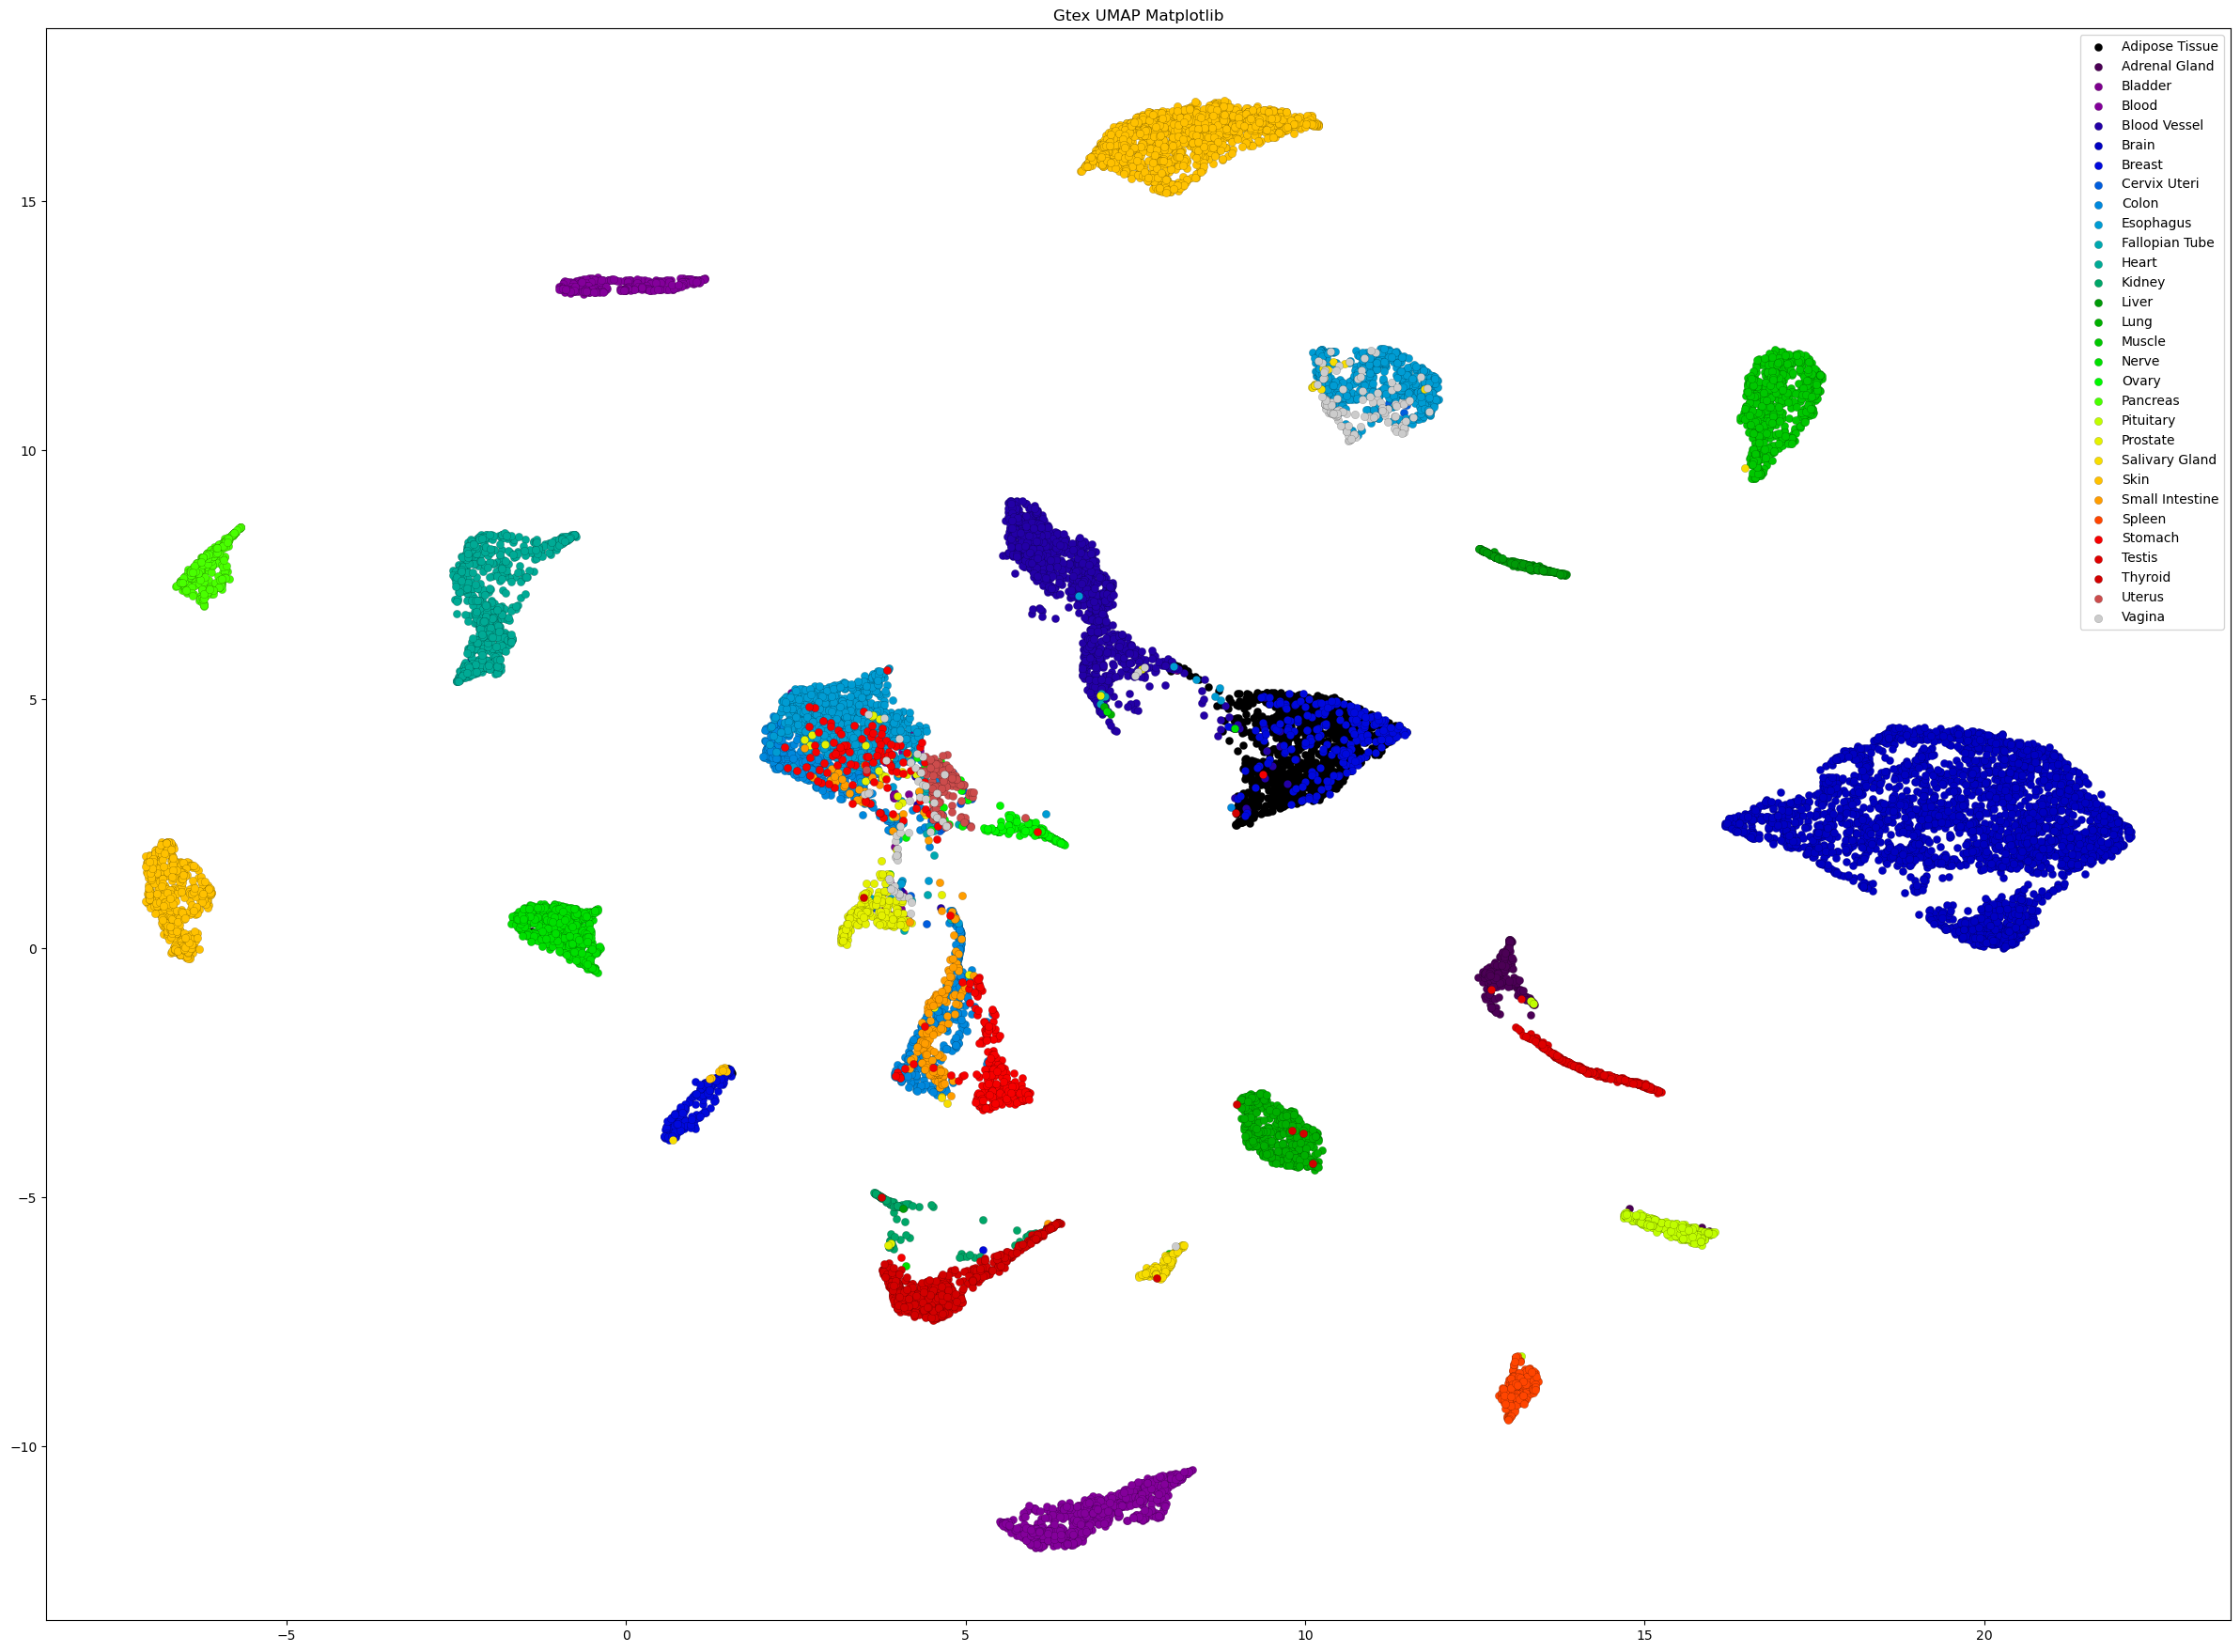

In [66]:
colours=mpl.cm.nipy_spectral(np.linspace(0, 1, len(mapping_col.unique())))

mpl.pyplot.figure(figsize=(30,22))
for (i,j),col in zip(umap_Gtex.groupby(mapping_col),colours):
    mpl.pyplot.scatter(x=j.iloc[:,0],y=j.iloc[:,1],color=col,edgecolors="black",linewidths=0.1)
mpl.pyplot.legend(sorted(mapping_col.unique()))
mpl.pyplot.title("Gtex UMAP Matplotlib")
mpl.pyplot.show()

## visualisation 7
**Heatmap of high variance genes and tissue types**

need to group samples by tissue types (this requires transposing as grouping is done row wise) then find mean of each group and plot
this data is not normalised so the heatmap dominated by high expression still)

In [68]:
#Gtex_top_var.T.groupby(mapping_col).mean().T

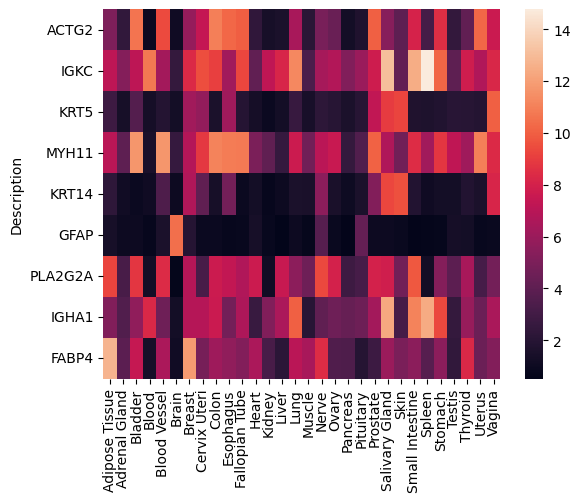

In [69]:
sb.heatmap(Gtex_top_var.iloc[1:10,:].T.groupby(mapping_col).mean().T,xticklabels=True)
mpl.pyplot.show()

## Z score normalisation
without Z scoring all my heatmap visualisations will be dominated by higher absolute expression, so i z score my top variable genes

In [71]:
import scipy

In [72]:
from sklearn.preprocessing  import StandardScaler

In [73]:
#Gtex_z=Gtex.apply(lambda x: scipy.stats.zscore(x),axis=1)

In [74]:
#Top_var=Gtex_z.var(axis=1).sort_values(ascending=False).head(999).index
#Gtex_top_var_zscore=Gtex_z.loc[Top_var,:]

In [75]:
Gtex_top_var_zscore=pd.DataFrame(scipy.stats.zscore(Gtex_top_var,axis=1),columns=Gtex_top_var.columns)

In [76]:
Gtex_top_var_zscore.set_index(Gtex_top_var.index,inplace=True)

In [77]:
Gtex_top_var_zscore

GTEX-1117F-0005-SM-HL9SH  GTEX-1117F-0011-R10b-SM-GI4VE  \
Description                                                            
DES                         -1.360314                      -1.218316   
ACTG2                       -0.780172                      -1.032748   
IGKC                         0.164634                      -1.538473   
KRT5                        -0.758314                      -0.693211   
MYH11                       -1.514559                      -1.128665   
...                               ...                            ...   
KLK13                       -0.492267                      -0.479282   
CXCL8                        1.941855                      -0.454909   
HEPACAM                     -0.726781                       2.565787   
RIPK4                       -0.964645                      -0.948628   
MNDA                         2.093082                      -0.222397   

             GTEX-1117F-0011-R11b-SM-GIN8R  GTEX-1117F-0011-R2b-SM-GI4VL  \
Description                                                                
DES                              -1.312856                     -1.218405   
ACTG2                            -1.128685                     -1.092005   
IGKC                             -1.465284                     -1.400412   
KRT5                             -0.866499                     -0.474431   
MYH11                            -1.296855                     -1.118515   
...                                    ...                           ...   
KLK13                            -0.501192                     -0.501192   
CXCL8                            -0.706529                     -0.553824   
HEPACAM                           1.625370                      2.123621   
RIPK4                            -0.964645                     -0.947682   
MNDA                             -0.954473                     -0.738875   

             GTEX-1117F-0011-R3a-SM-GJ3PJ  GTEX-1117F-0011-R4b-SM-GI4VM  \
Description                                                               
DES                             -1.130613                     -0.624381   
ACTG2                           -1.019294                     -0.474548   
IGKC                            -1.098316                     -1.173912   
KRT5                            -0.653407                     -0.753417   
MYH11                           -1.238652                      0.094868   
...                                   ...                           ...   
KLK13                           -0.469815                     -0.489548   
CXCL8                           -0.865156                     -0.017901   
HEPACAM                          2.592536                      2.274312   
RIPK4                           -0.953063                     -0.939459   
MNDA                            -0.689949                     -0.253438   

             GTEX-1117F-0011-R5a-SM-GI4VW  GTEX-1117F-0011-R6a-SM-GI4VX  \
Description                                                               
DES                             -1.234910                     -1.184666   
ACTG2                           -1.044621                     -1.025653   
IGKC                            -1.273192                     -1.403538   
KRT5                            -0.664313                     -0.471316   
MYH11                           -1.115083                     -1.053919   
...                                   ...                           ...   
KLK13                           -0.501192                     -0.487408   
CXCL8                           -0.621444                     -0.663187   
HEPACAM                          2.610545                      2.404081   
RIPK4                           -0.964645                     -0.964645   
MNDA                            -0.308145                     -0.334750   

             GTEX-1117F-0011-R7a-SM-H65ZK  GTEX-1117F-0226-SM-5GZZ7  ...  \
Description                                                

### Visualisation 8
**Normalised clustered heatmap of genes by tissue types**

By clustering tissue specific genes can be seen, Tissue types with similar expression profiles can also be found e.g small intestine and stomach tissue

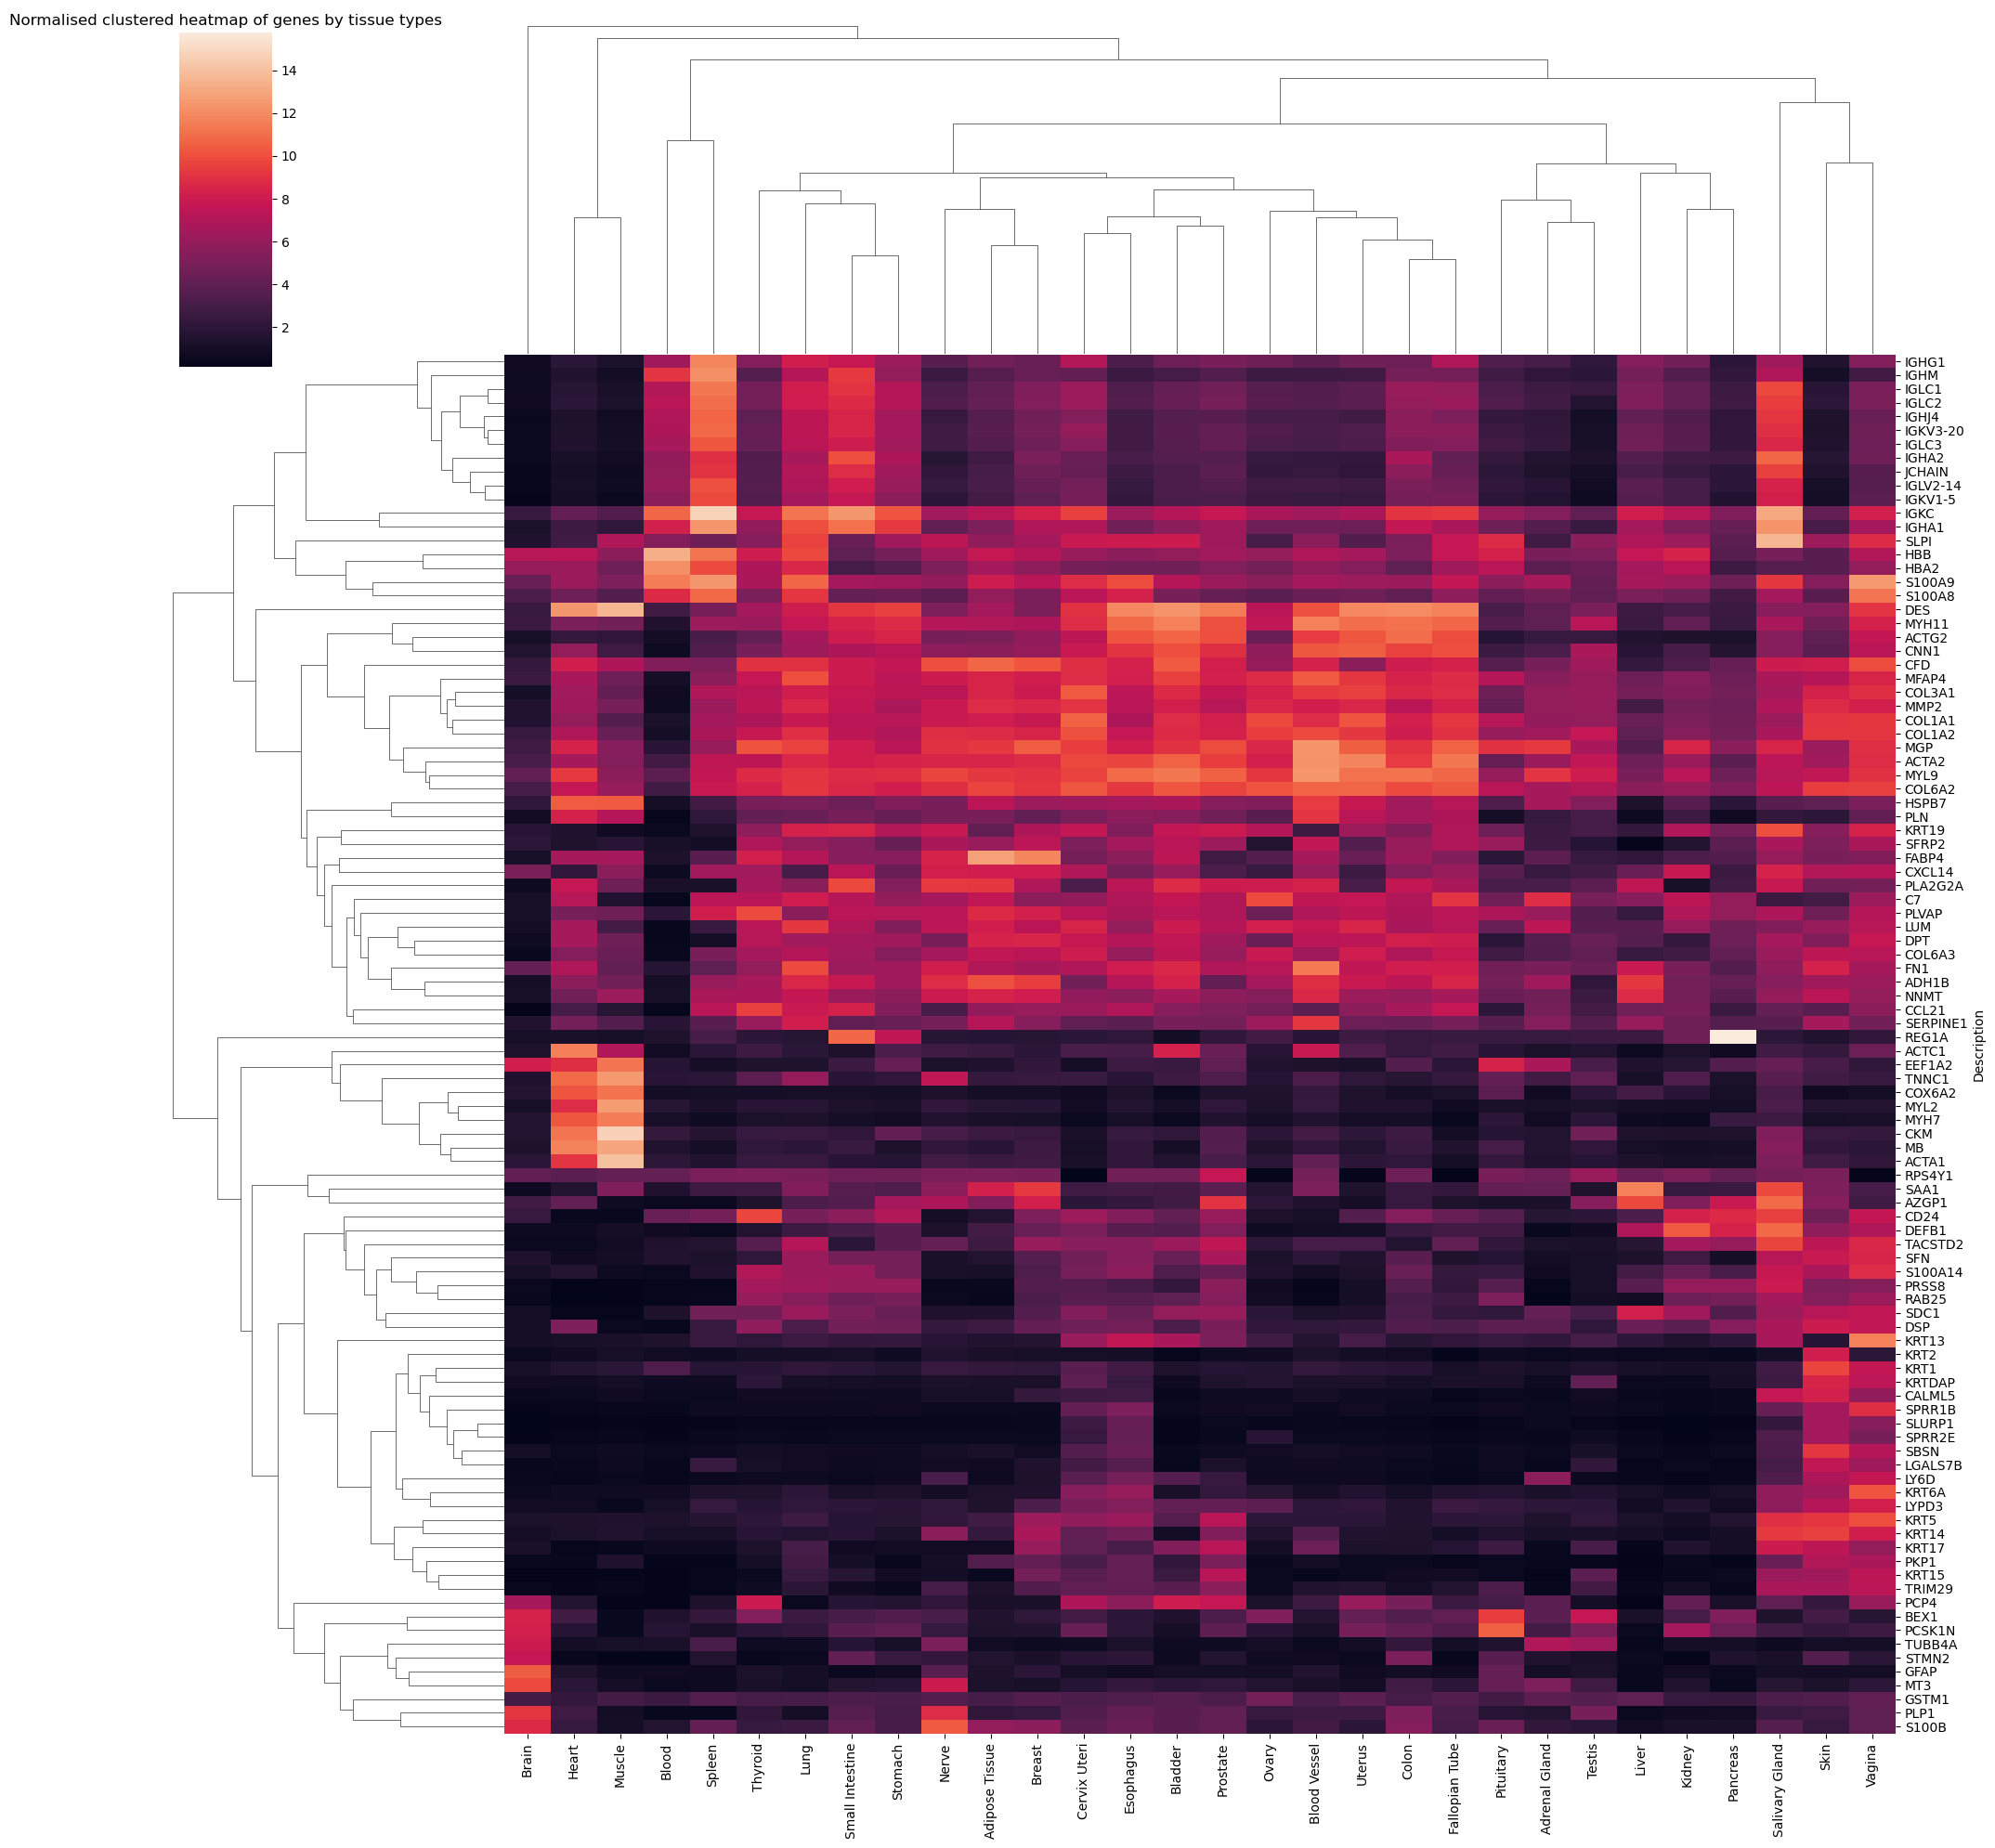

In [79]:

sb.clustermap(Gtex_top_var.iloc[:100,:].T.groupby(mapping_col).mean().T,xticklabels=True,yticklabels=True,figsize=(20,20),col_cluster=True)
mpl.pyplot.title("Normalised clustered heatmap of genes by tissue types")
mpl.pyplot.savefig("Figures/Heatmap_genes_tissue_type", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

In [80]:

PC_Gtex_zscore=PC.fit_transform(Gtex_top_var_zscore.T)
PCA_Gtex_zscore=pd.DataFrame(data=PC_Gtex_zscore,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])
PCA_Gtex_zscore=PCA_Gtex_zscore.set_index(Gtex_top_var_zscore.T.index)

In [81]:
PCA_Gtex_zscore

PC1        PC2        PC3        PC4  \
GTEX-1117F-0005-SM-HL9SH       11.797730  19.189021  24.762166   4.566706   
GTEX-1117F-0011-R10b-SM-GI4VE  33.645805  -3.210396  -8.285289  -3.938134   
GTEX-1117F-0011-R11b-SM-GIN8R  33.050569  -0.119883  -6.407009  -1.273690   
GTEX-1117F-0011-R2b-SM-GI4VL   26.371969  -0.423766  -0.092309   2.103580   
GTEX-1117F-0011-R3a-SM-GJ3PJ   35.961666  -2.112092  -8.410194  -3.253490   
...                                  ...        ...        ...        ...   
GTEX-ZZPU-2326-SM-GOQYU        -7.742547  -8.493741  -0.902819  -6.402798   
GTEX-ZZPU-2426-SM-5E44I       -12.494621 -15.516249   2.440225  -0.477093   
GTEX-ZZPU-2526-SM-GOQZ3       -18.084027  14.579205 -20.796274   6.093070   
GTEX-ZZPU-2626-SM-5E45Y         1.188907  -6.886762  11.873264  21.871165   
GTEX-ZZPU-2726-SM-5NQ8O       -13.782491  -6.541746   7.336067  -5.309749   

                                     PC5       PC6        PC7       PC8  \
GTEX-1117F-0005-SM-HL9SH        9.147507 -5.690389  -1.241756 -8.214749   
GTEX-1117F-0011-R10b-SM-GI4VE  -0.541740 -2.549146  -0.424454  2.193834   
GTEX-1117F-0011-R11b-SM-GIN8R  -0.319710  1.126975   0.028666  0.855020   
GTEX-1117F-0011-R2b-SM-GI4VL    1.911928 -1.269518   1.971508 -0.955039   
GTEX-1117F-0011-R3a-SM-GJ3PJ   -0.751310 -1.483597  -0.496368  2.310927   
...                                  ...       ...        ...       ...   
GTEX-ZZPU-2326-SM-GOQYU         1.364474 -6.624275   4.463925 -0.975058   
GTEX-ZZPU-2426-SM-5E44I         0.686288 -1.250230  -6.739075 -2.348441   
GTEX-ZZPU-2526-SM-GOQZ3         1.253627 -9.150562   5.404077  0.509097   
GTEX-ZZPU-2626-SM-5E45Y       -13.727151 -2.308158   5.436193  4.525973   
GTEX-ZZPU-2726-SM-5NQ8O         3.398545 -7.015139  10.072472  5.179679   

                                    PC9      PC10  
GTEX-1117F-0005-SM-HL9SH       0.610403  1.245181  
GTEX-1117F-0011-R10b-SM-GI4VE -0.387234  1.309827  
GTEX-1117F-0011-R11b-SM-GIN8R -0.742406  0.494985  
GTEX-1117F-0011-R2b-SM-GI4VL  -3.438247  0.916846  
GTEX-1117F-0011-R3a-SM-GJ3PJ  -0.726201  0.436330  
...                                 ...       ...  
GTEX-ZZPU-2326-SM-GOQYU       -6.764308  1.077698  
GTEX-ZZPU-2426-SM-5E44I        0.853261 -2.168172  
GTEX-ZZPU-2526-SM-GOQZ3       -2.123375 -6.017817  
GTEX-ZZPU-2626-SM-5E45Y       -5.751545  0.901100  
GTEX-ZZPU-2726-SM-5NQ8O       -8.708575  2.210733  

[19616 rows x 10 columns]

### visualisation 9
**PCA but with normalised values**

coloured by Sex, (1 male 2 female) No difference 

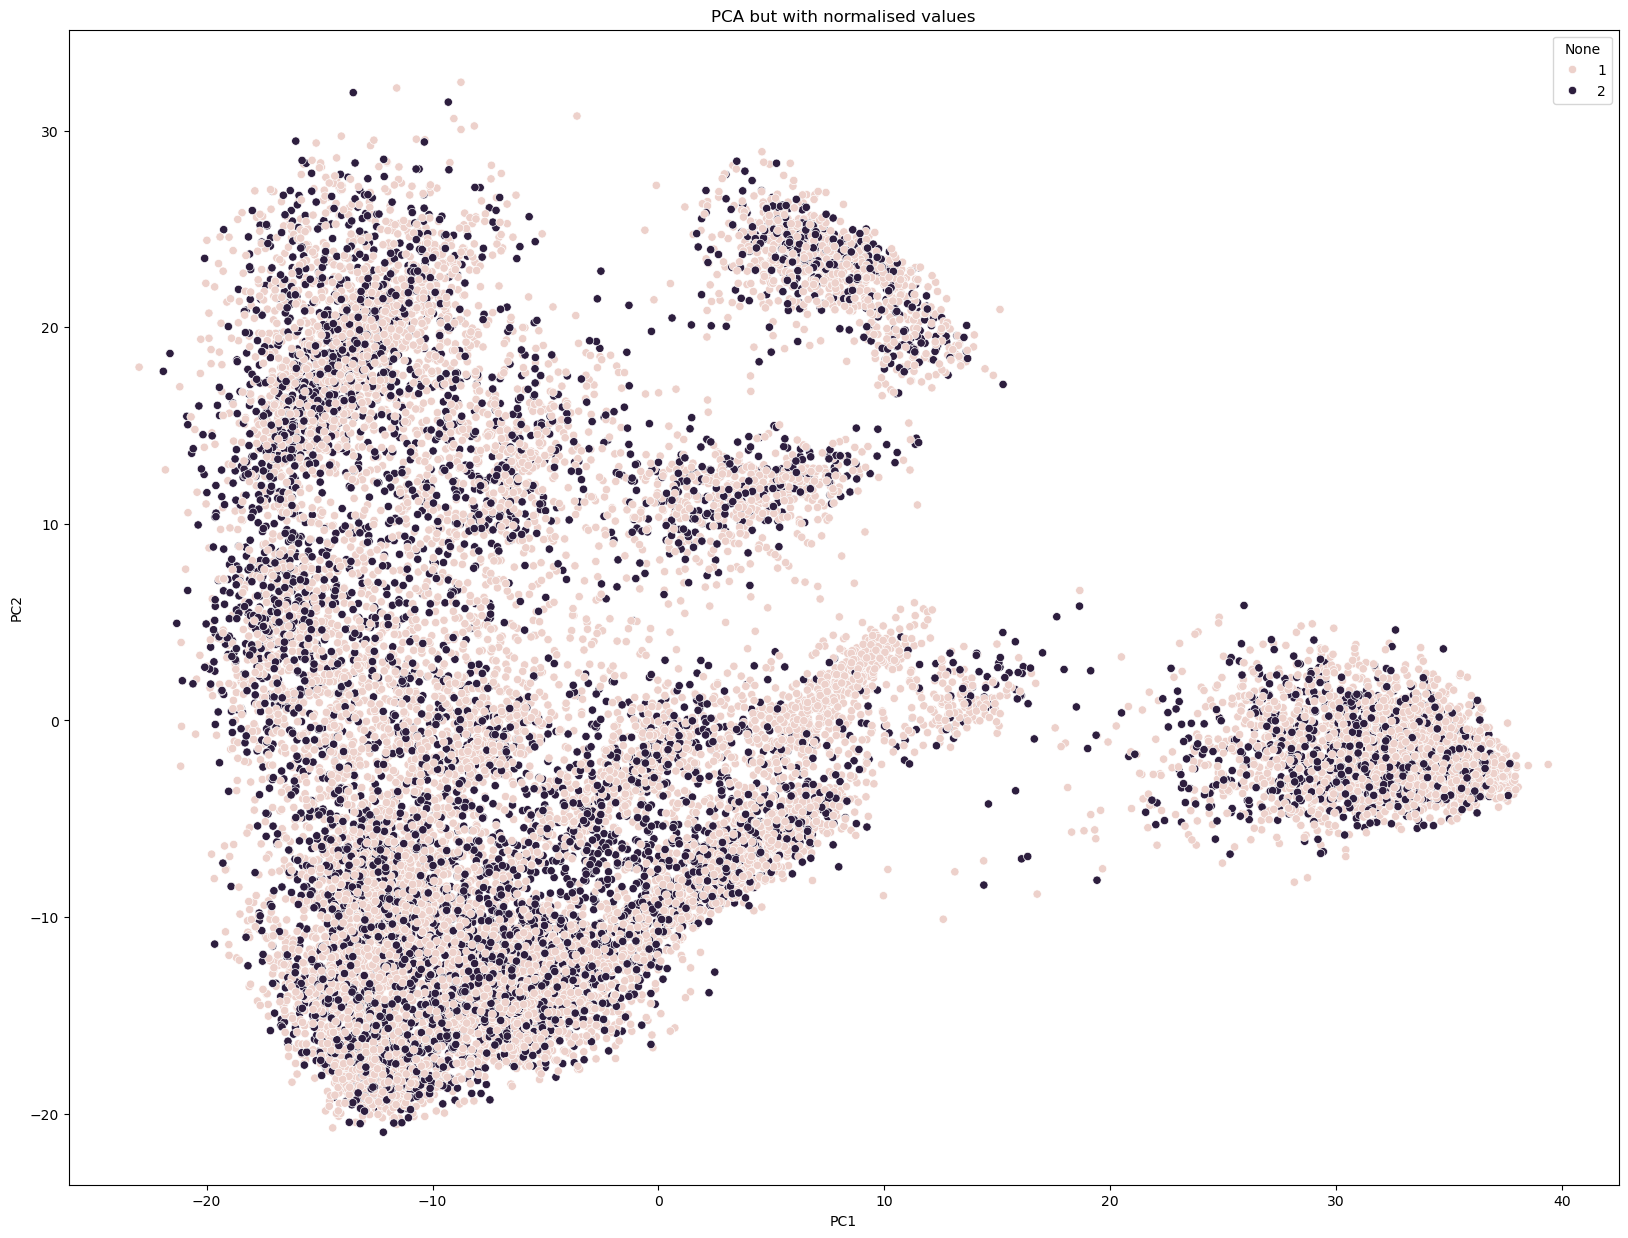

In [83]:
mpl.pyplot.figure(figsize=(20,15))
sb.scatterplot(data=PCA_Gtex_zscore,x="PC1",y="PC2",hue=mapping_sex)
mpl.pyplot.title("PCA but with normalised values")
mpl.pyplot.show()

### Kmeans


In [85]:
from sklearn.cluster import KMeans

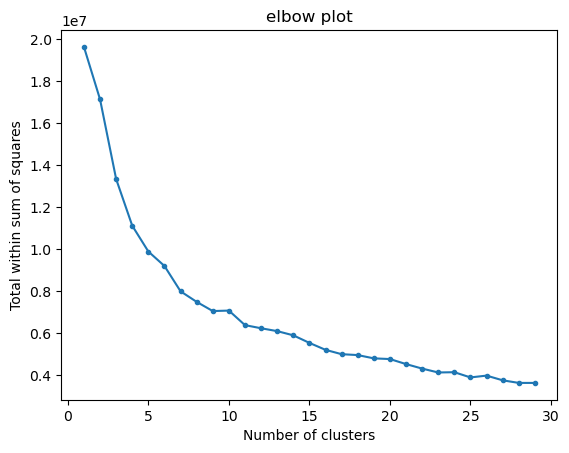

In [86]:

ssd = [] # (it is sum of squared distance of each point from there cluster center)
for i in range(1, 30):
    model = KMeans(n_clusters=i)
    result_kmc = model.fit(Gtex_top_var_zscore.T)
    ssd.append(model.inertia_)

mpl.pyplot.plot(range(1,30),ssd,'.-')
mpl.pyplot.title("elbow plot")
mpl.pyplot.xlabel("Number of clusters")
mpl.pyplot.ylabel("Total within sum of squares")
mpl.pyplot.savefig("Figures/K_means_elbow_plot.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

In [87]:
model = KMeans(n_clusters=20)
kmeans_result=model.fit_predict(Gtex_top_var_zscore.T)


In [88]:
model.labels_

array([ 2, 10,  1, ...,  5,  3,  8], dtype=int32)

### visualisation 10
**UMAP but with normalised values**

coloured by Age,  No difference and seperation

In [90]:
umap_Gtex_zscore=umap.UMAP().fit_transform(PCA_Gtex_zscore)
umap_Gtex_zscore=pd.DataFrame(umap_Gtex_zscore,columns=["UMAP1","UMAP2"])


/var/folders/nh/p3vplyh913scfnrjs3h1c1th0000gn/T/ipykernel_56051/2157541311.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sb.scatterplot(data=umap_Gtex_zscore,x="UMAP1",y="UMAP2",palette=colours,hue=kmeans_result,legend="full")
/var/folders/nh/p3vplyh913scfnrjs3h1c1th0000gn/T/ipykernel_56051/2157541311.py:3: UserWarning: The palette list has more values (30) than needed (20), which may not be intended.
  sb.scatterplot(data=umap_Gtex_zscore,x="UMAP1",y="UMAP2",palette=colours,hue=kmeans_result,legend="full")


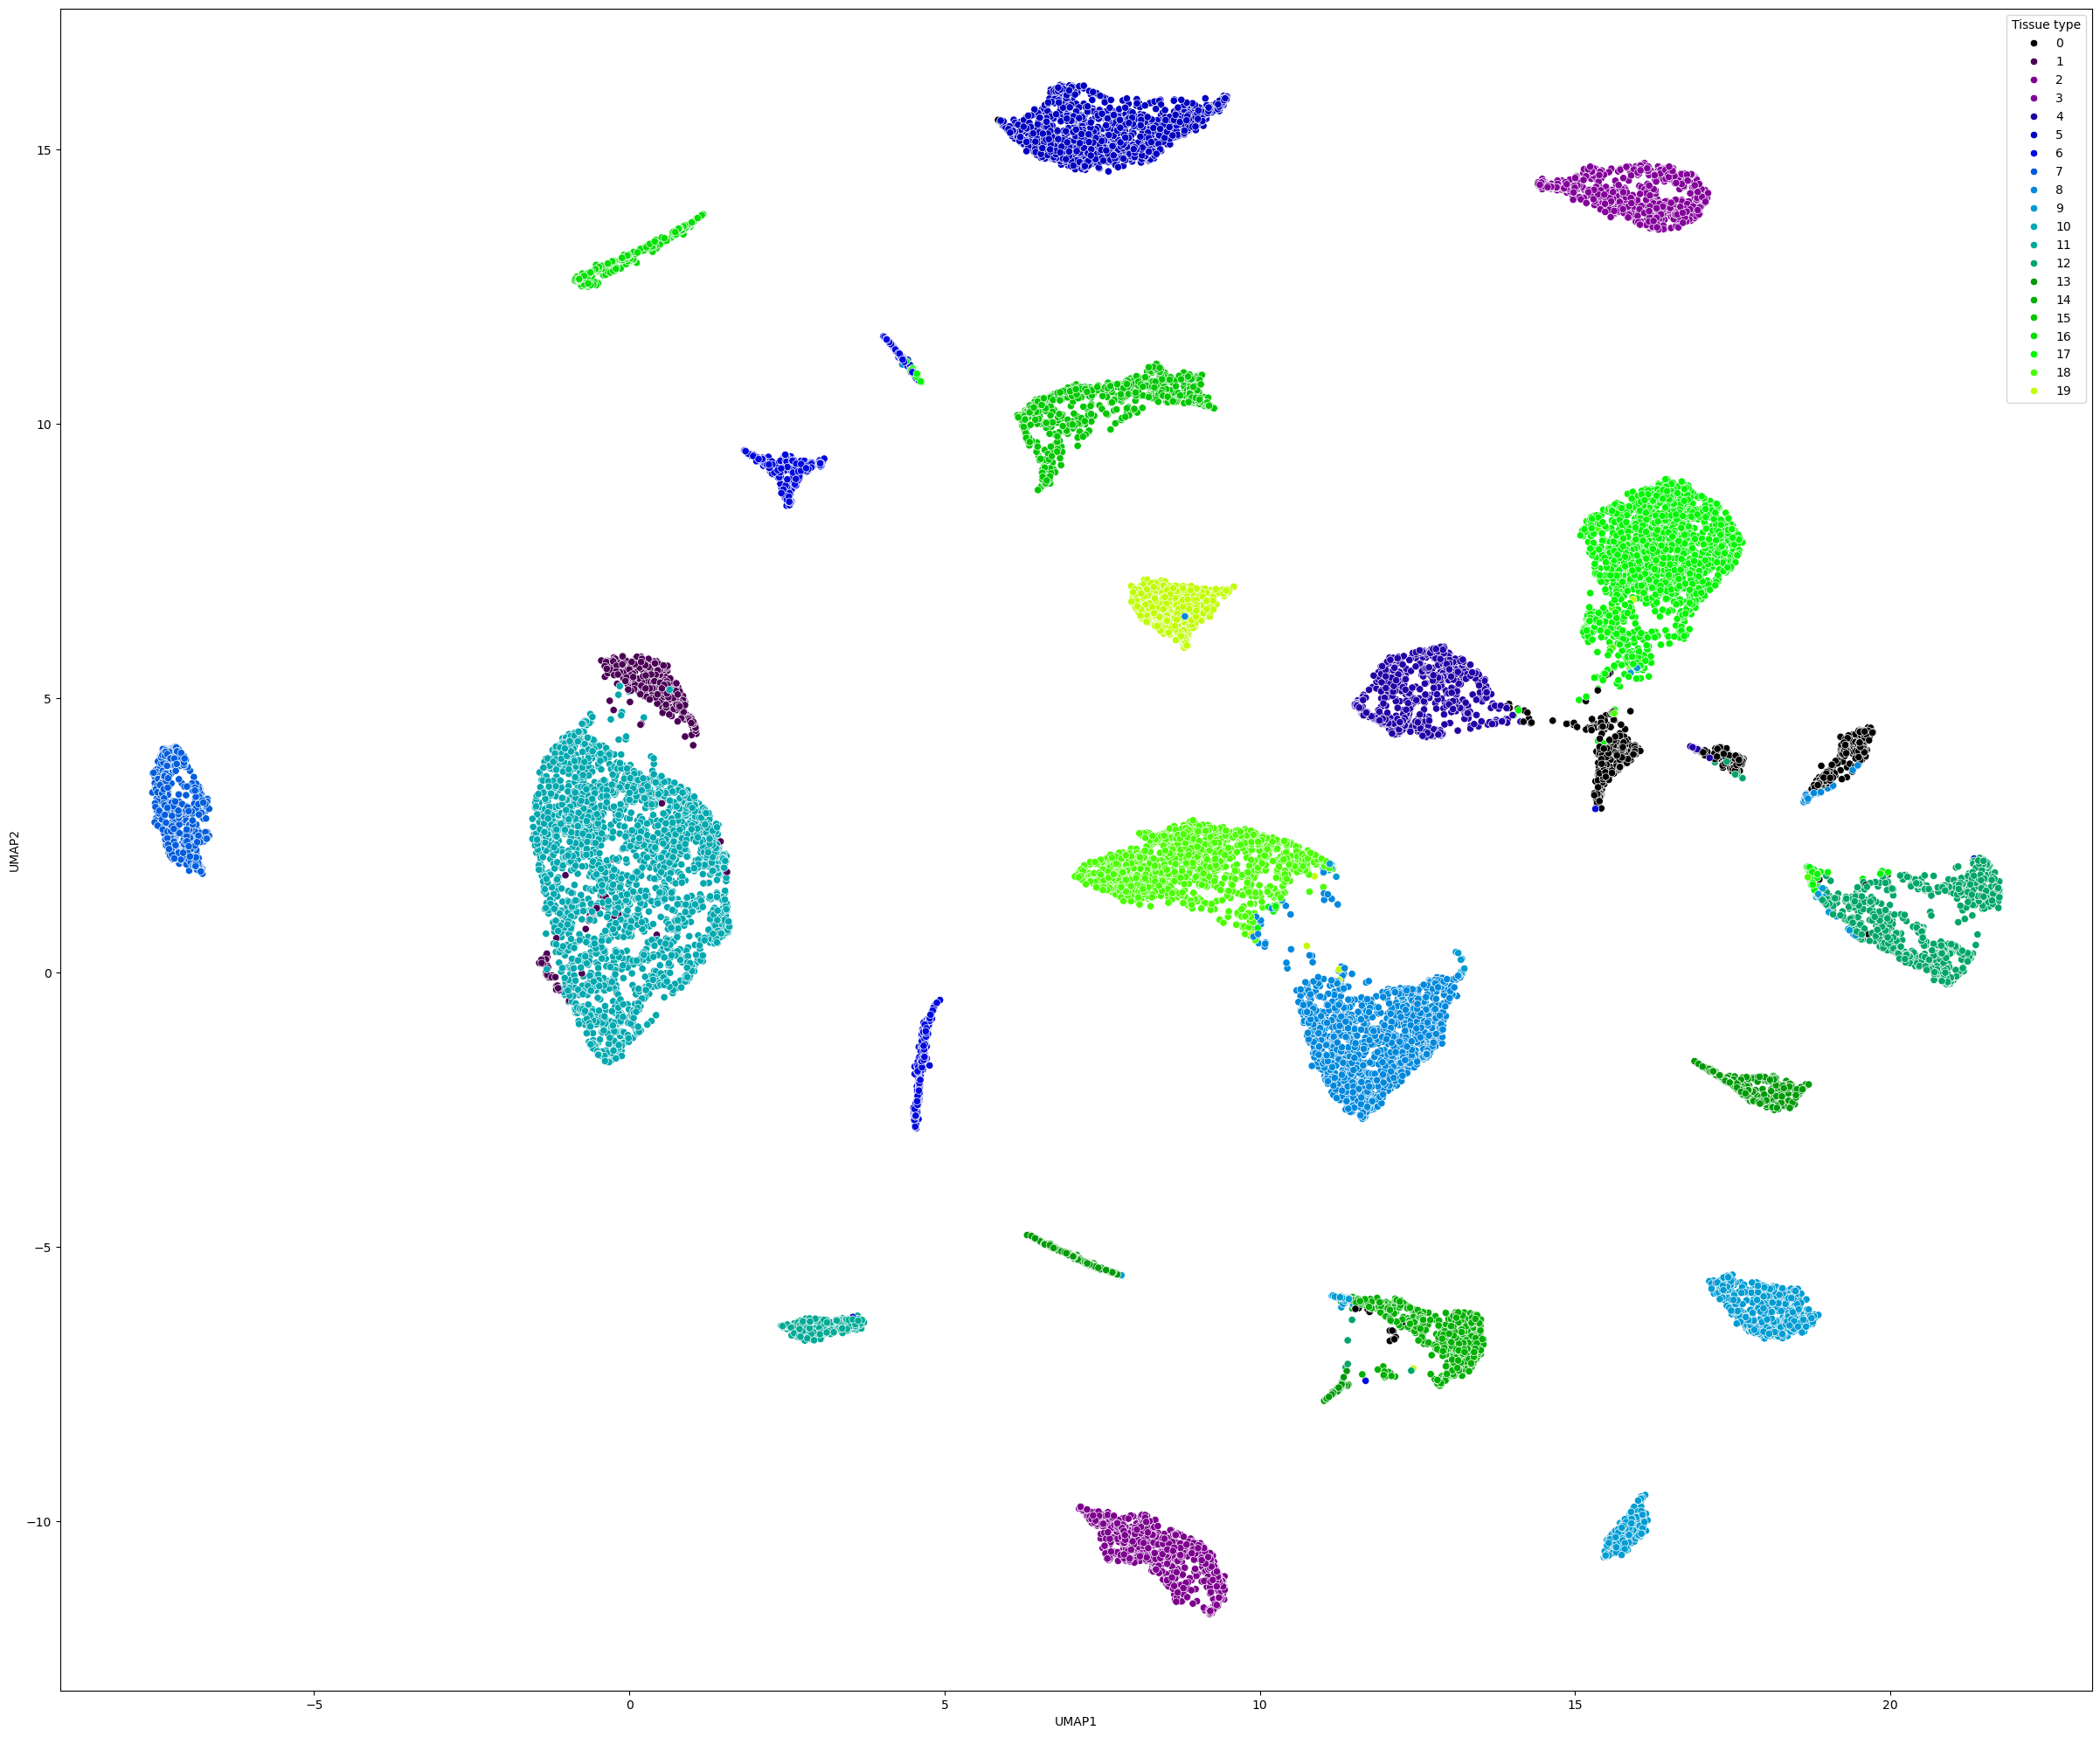

In [91]:
mpl.pyplot.figure(figsize=(30,25))
#sb.scatterplot(data=umap_Gtex_zscore,x="UMAP1",y="UMAP2",hue=mapping_col_age,legend="full")
sb.scatterplot(data=umap_Gtex_zscore,x="UMAP1",y="UMAP2",palette=colours,hue=kmeans_result,legend="full")

mpl.pyplot.legend(title="Tissue type")
mpl.pyplot.show()

### Correlation plot 
To see the coexpression of genes. can see the correlation between each gene and made a clustered heatmap. can lookup said genes and see which genes clusters correspond to particular tissues 

correlation plot of the top 100 genes in variance
e.g PLP, BEX1 etc being associated with CNS

In [93]:
#Gtex_top_var_zscore.corr()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


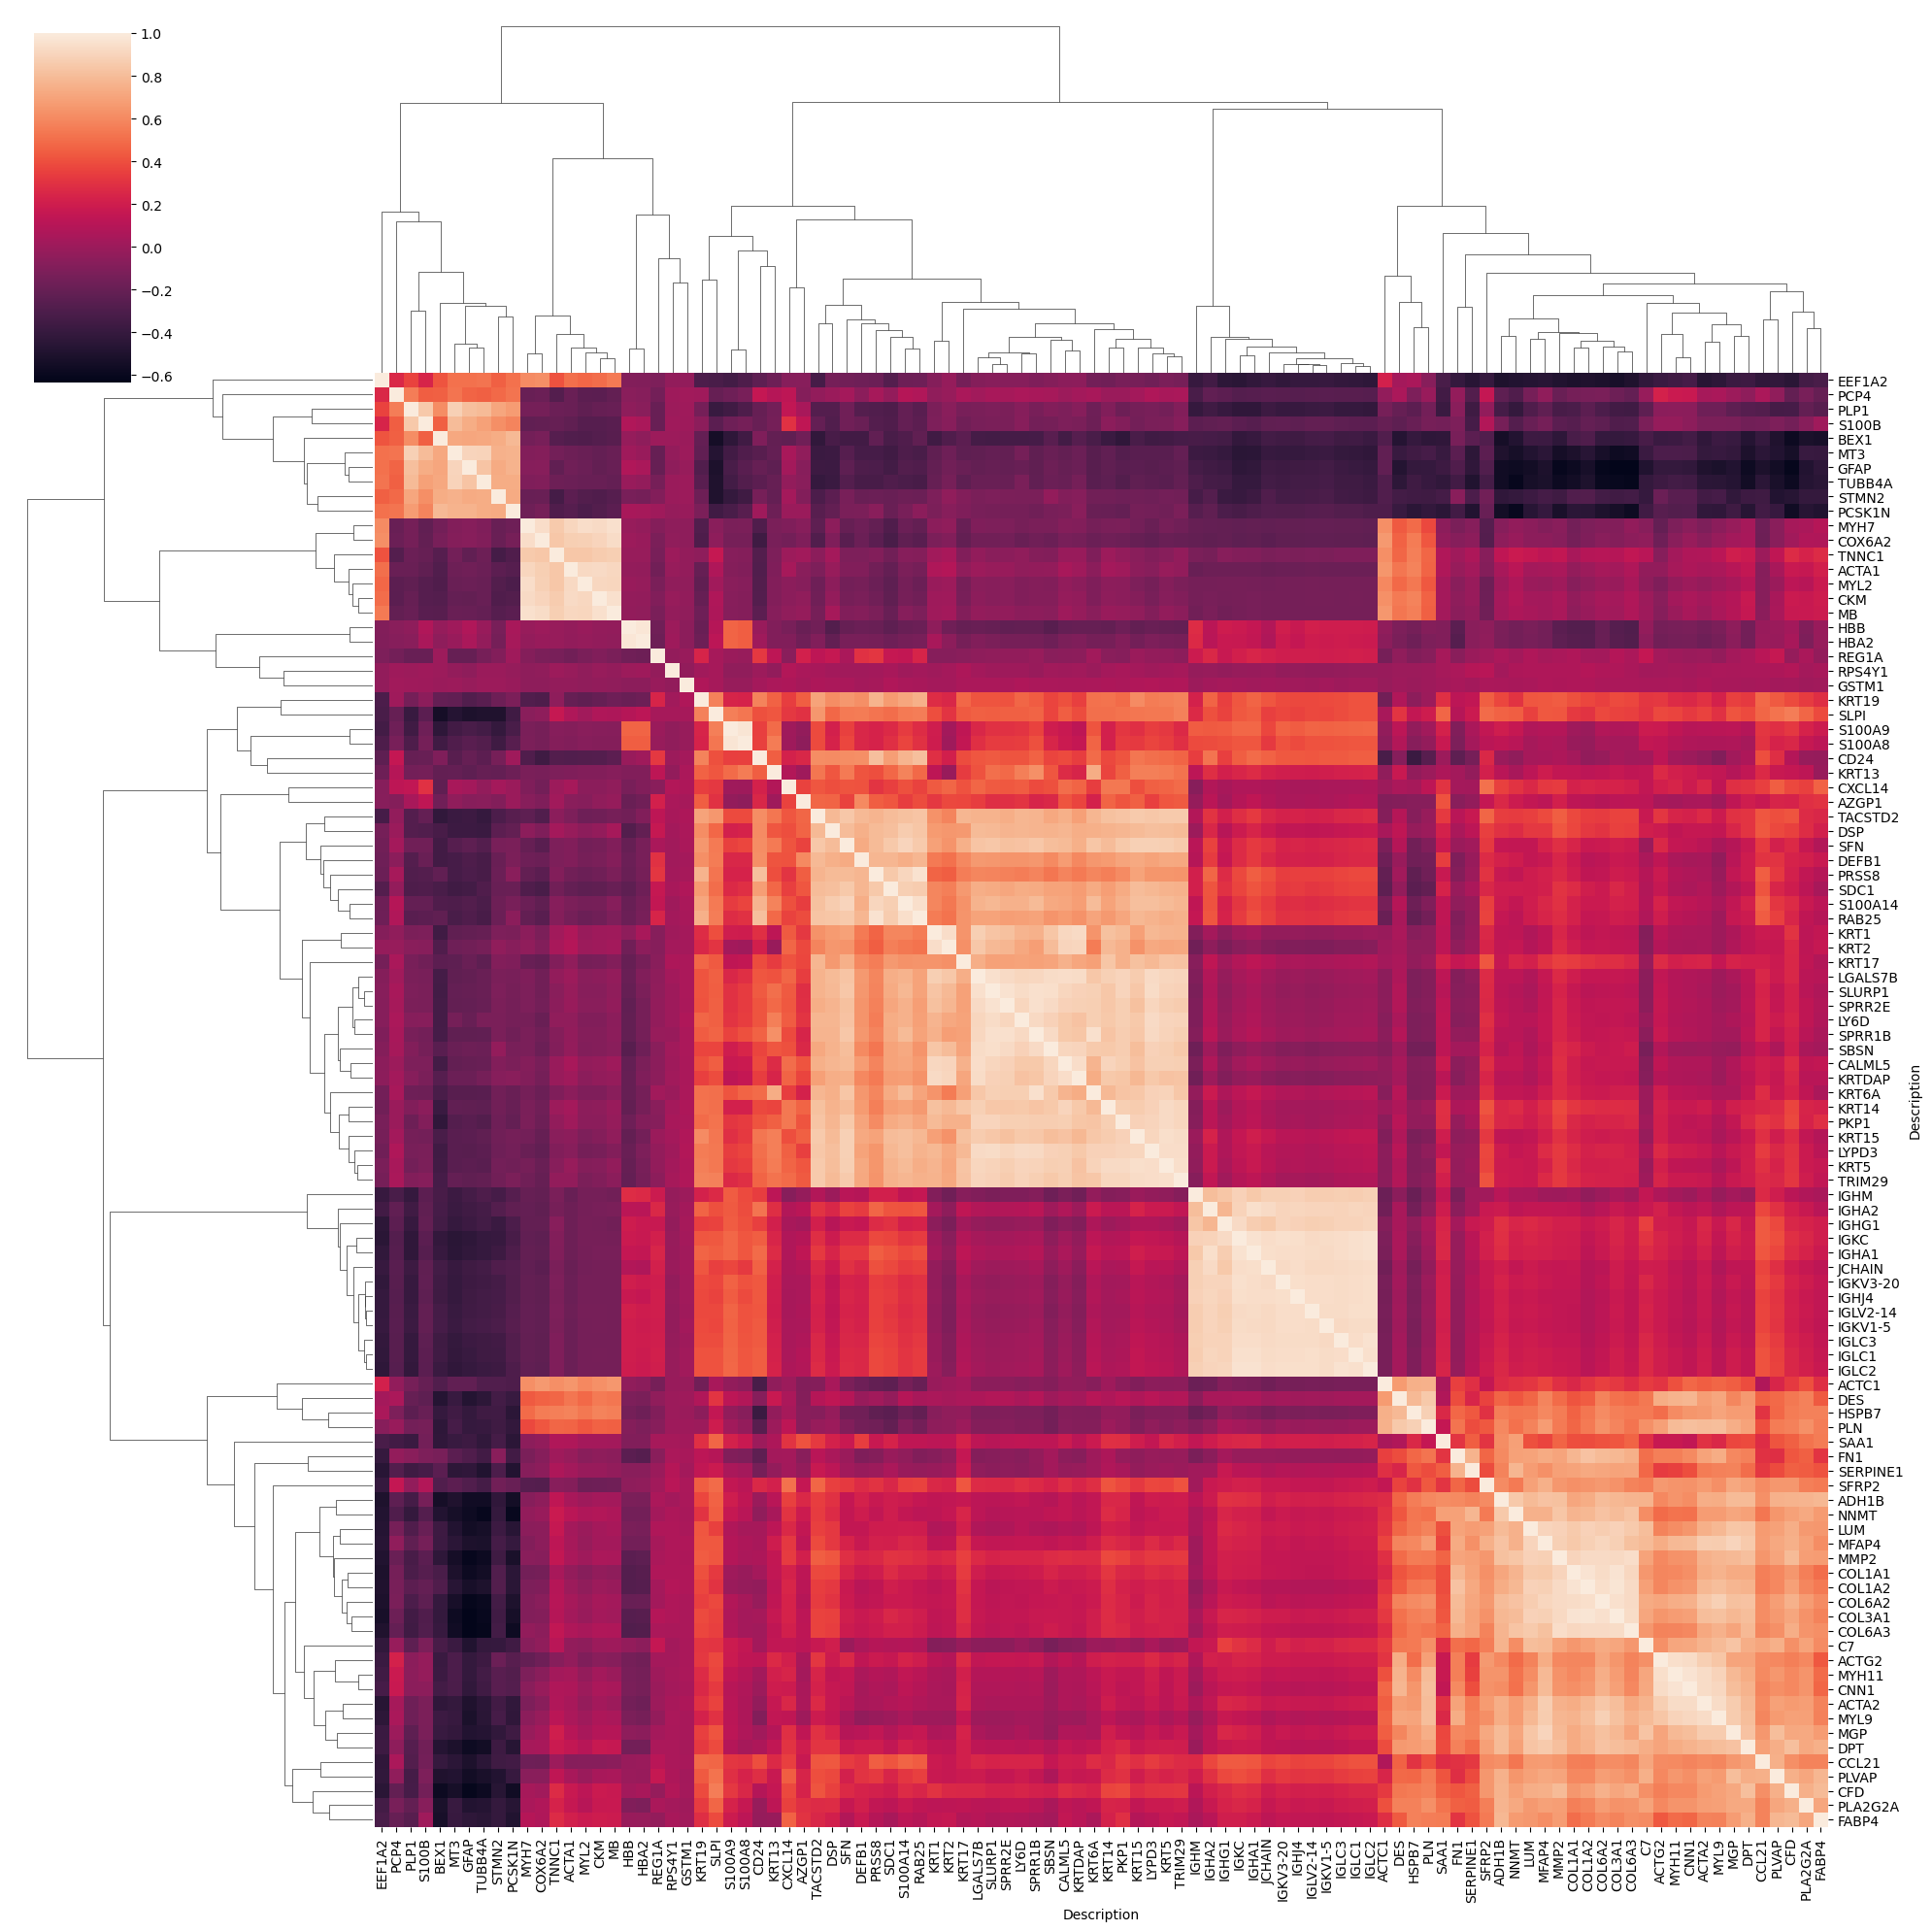

In [94]:
sb.clustermap(data=Gtex_top_var_zscore.T.iloc[:,:100].corr(),yticklabels=True,xticklabels=True,figsize=(20,20))
mpl.pyplot.savefig("Figures/Gene_correlation_plot.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

### visualisation 11

**Gene expression by AGE**

This doesnt work as well as differences are dominated by tissue type, so any differences in tissue type numbers between the samples in each age group will skew the graph

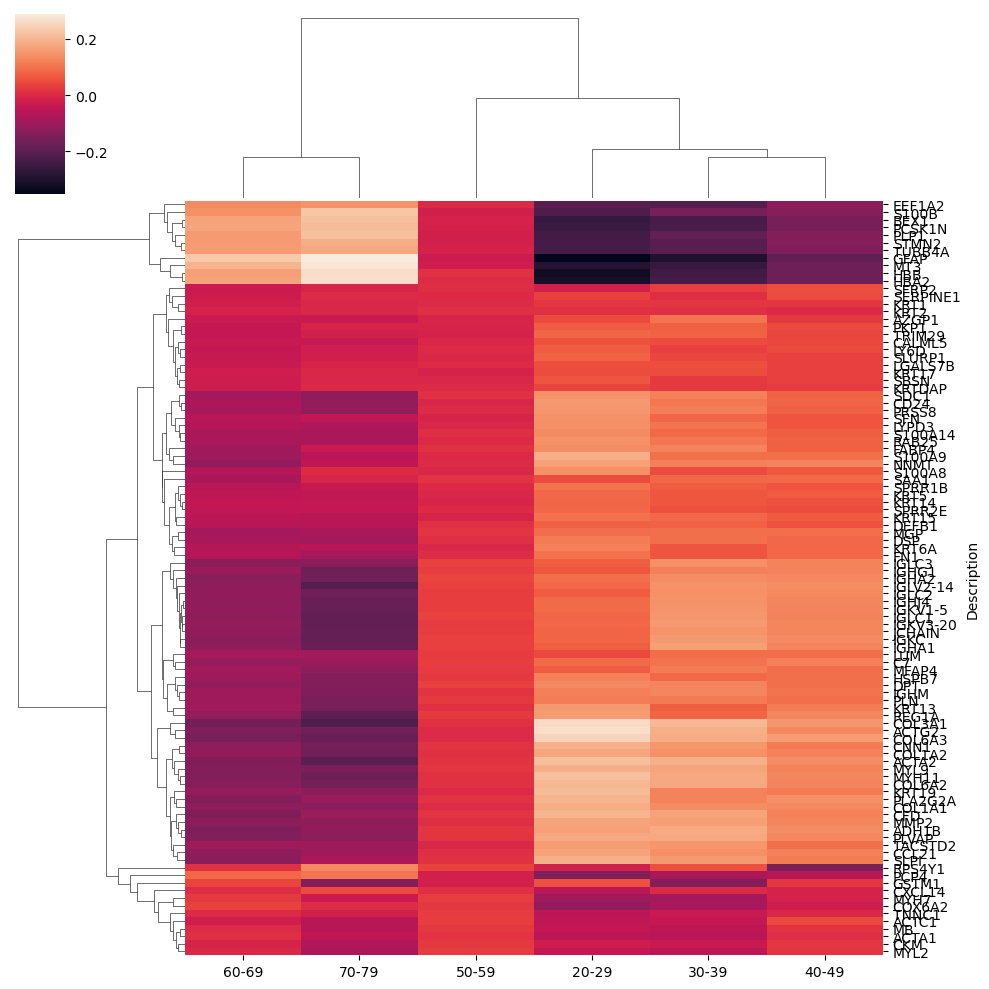

In [96]:

sb.clustermap(Gtex_top_var_zscore.T.groupby(mapping_col_age).mean().T.iloc[1:100,:],yticklabels=True,xticklabels=True)

### Visualisation 12,13,14

**Gene expression by AGE for brain, muscle and skin tissues**

By grouping tissues out, more subtle differences in expression by age can be seen

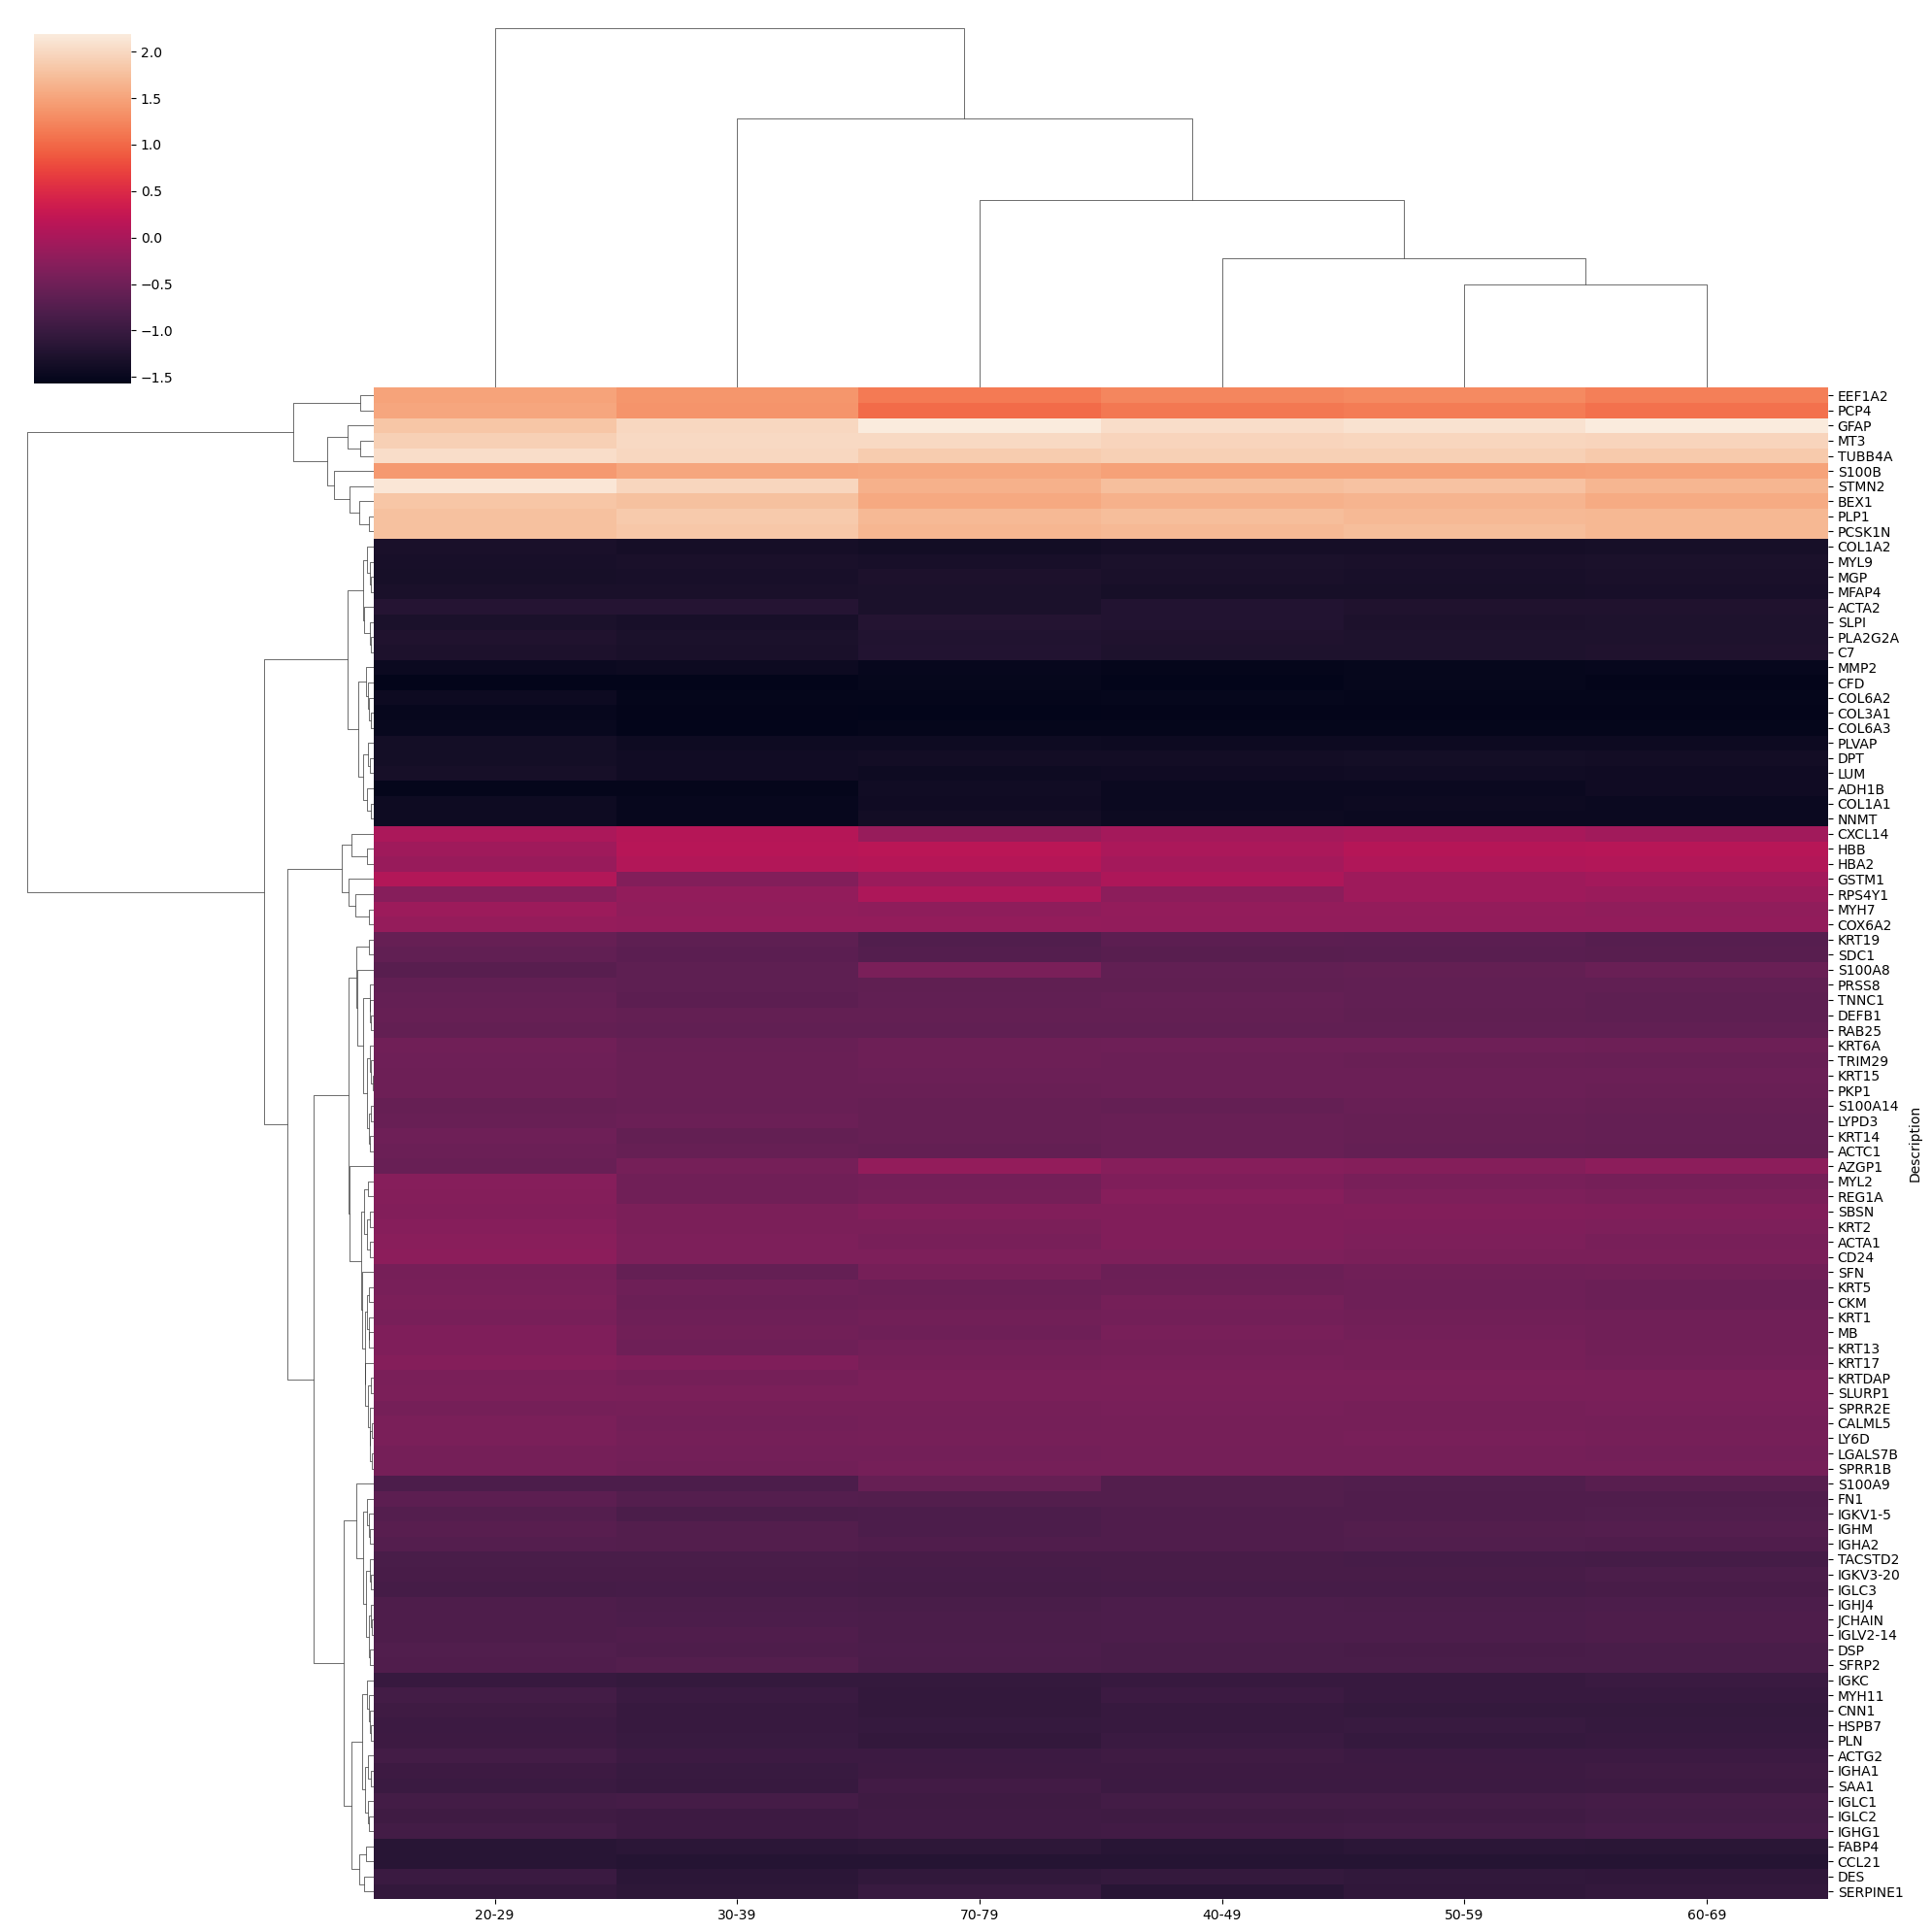

In [98]:
Brain_grouping=Gtex_top_var_zscore.T.groupby(mapping_col).get_group("Brain").T
Brain_age_mapping=Brain_grouping.columns.map(sample_metadata.set_index("SAMPID")["AGE"])
sb.clustermap(Brain_grouping.T.groupby(Brain_age_mapping).mean().T.iloc[:100,:],yticklabels=True,figsize=(20,20))
mpl.pyplot.show()

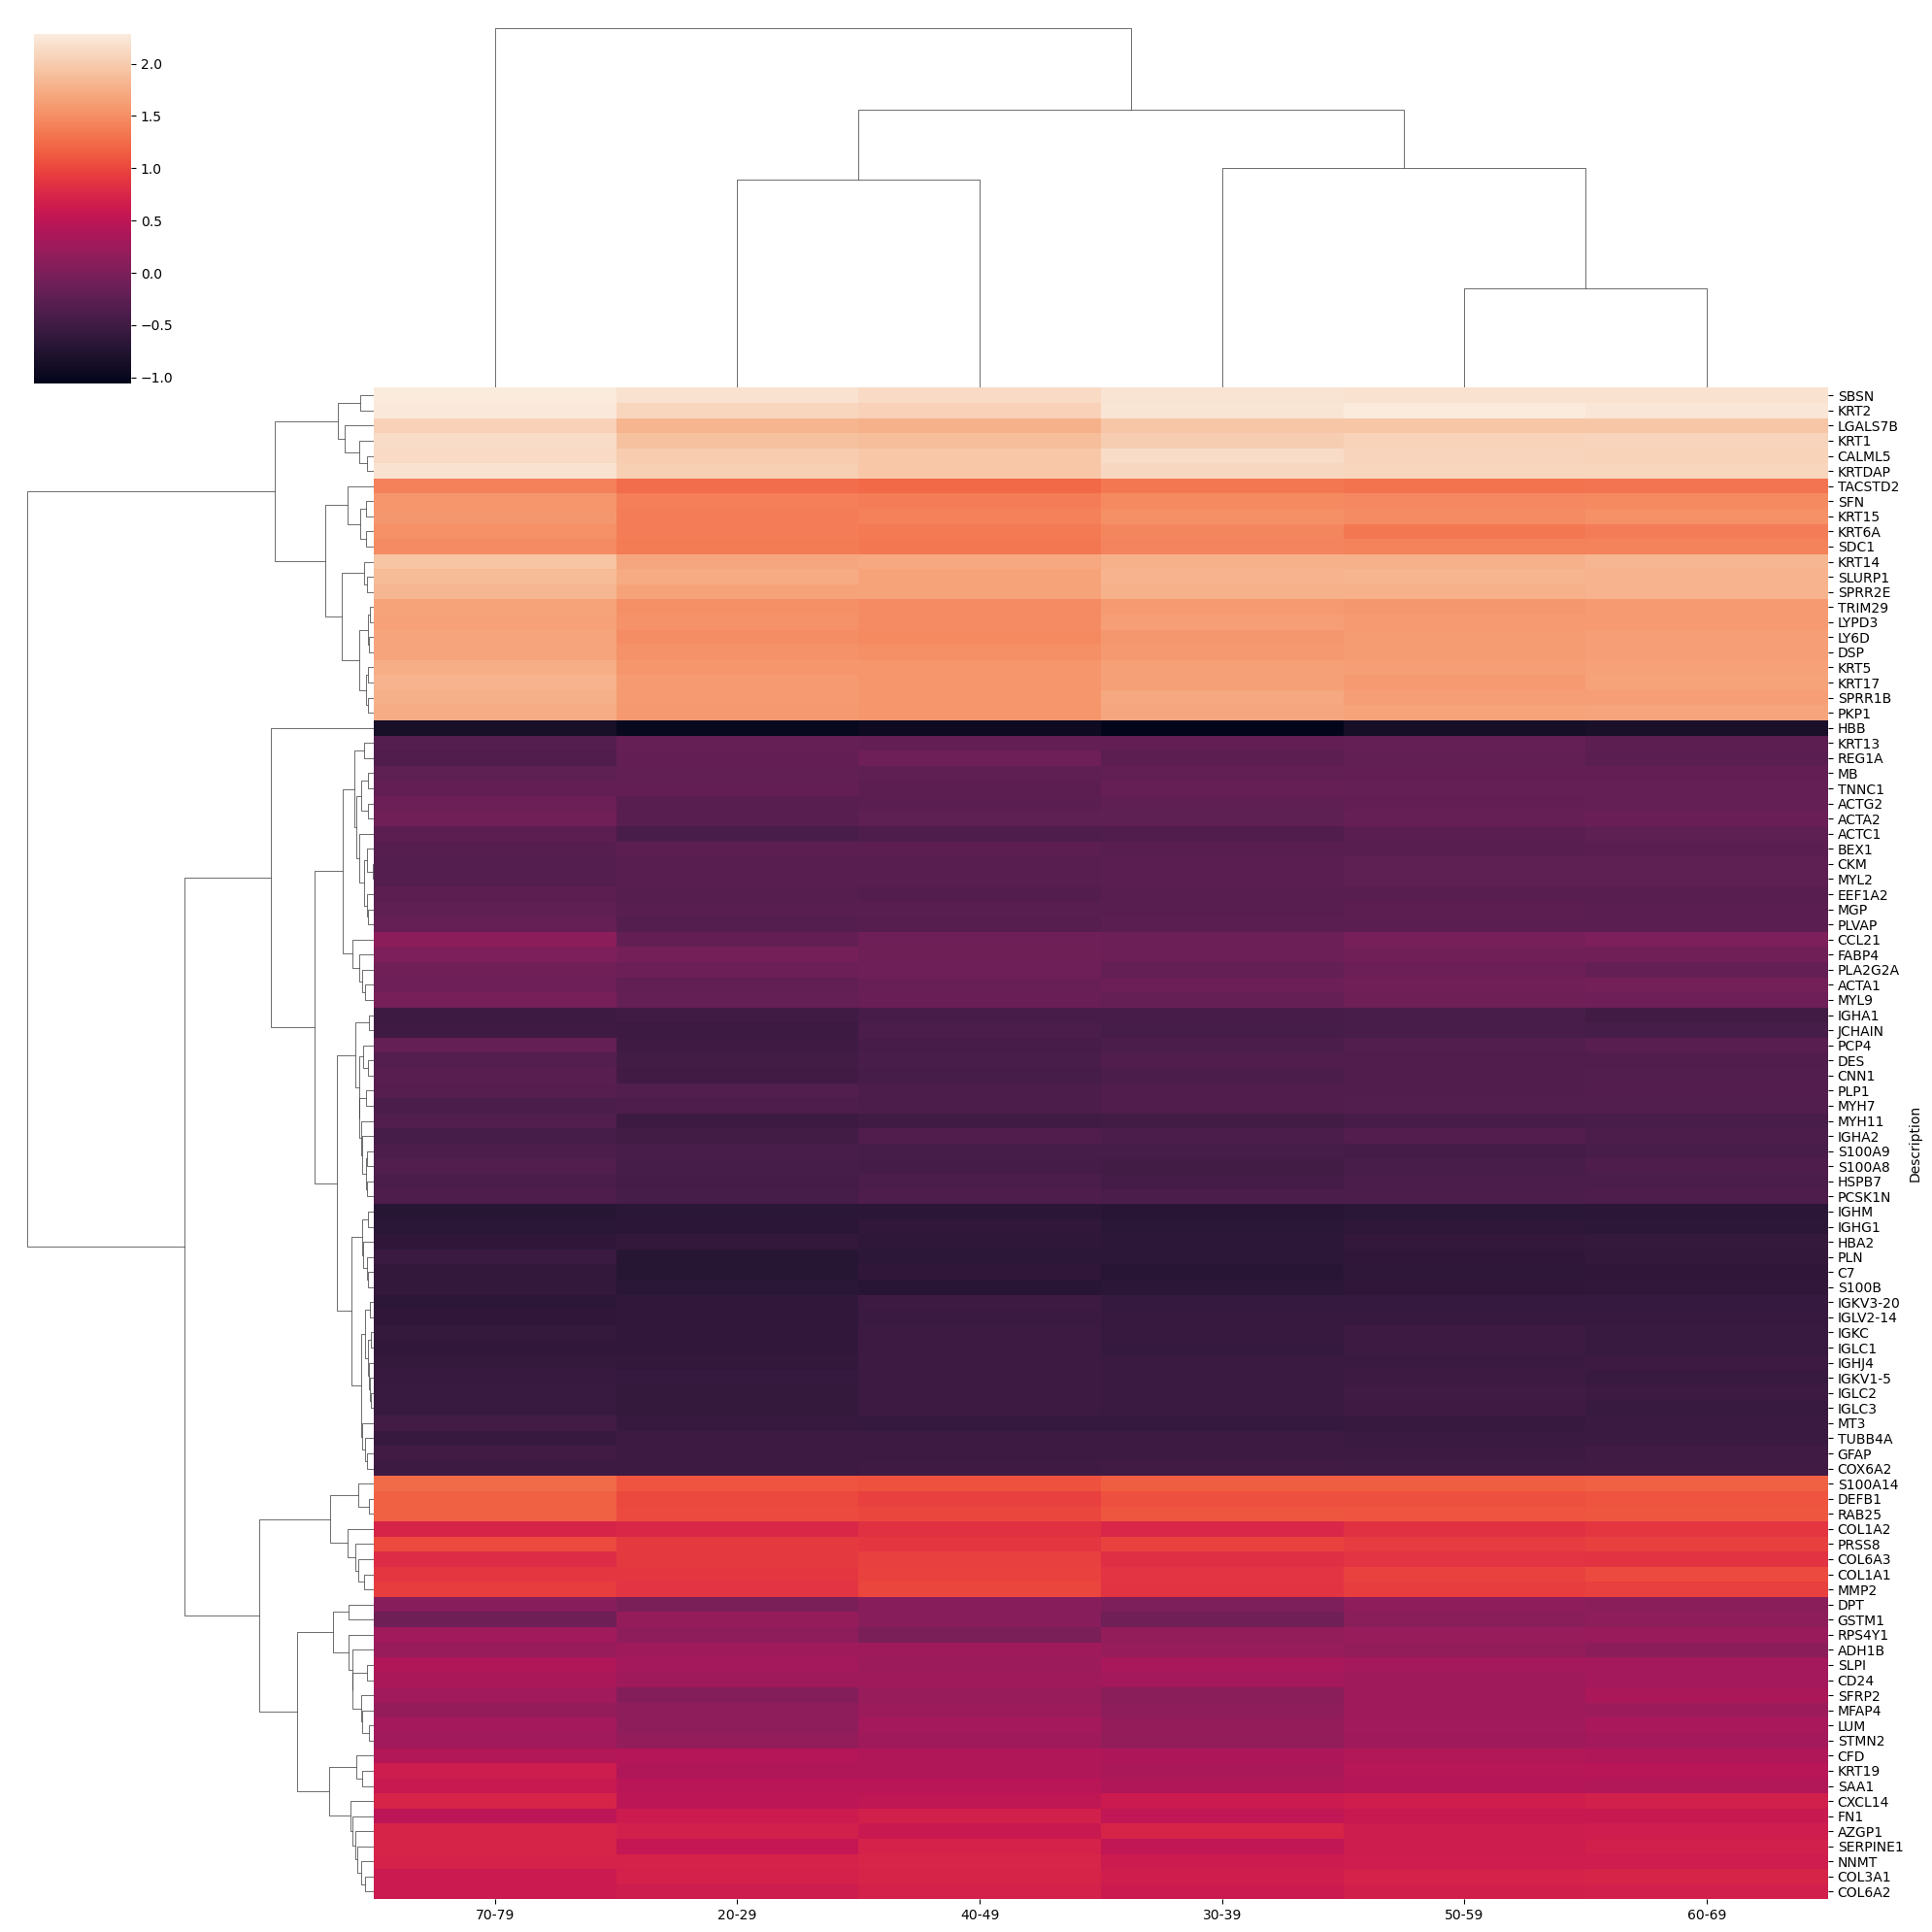

In [99]:
Skin_grouping=Gtex_top_var_zscore.T.groupby(mapping_col).get_group("Skin").T
Skin_age_mapping=Skin_grouping.columns.map(sample_metadata.set_index("SAMPID")["AGE"])
sb.clustermap(Skin_grouping.T.groupby(Skin_age_mapping).mean().T.iloc[:100,:],yticklabels=True,figsize=(20,20))
mpl.pyplot.show()

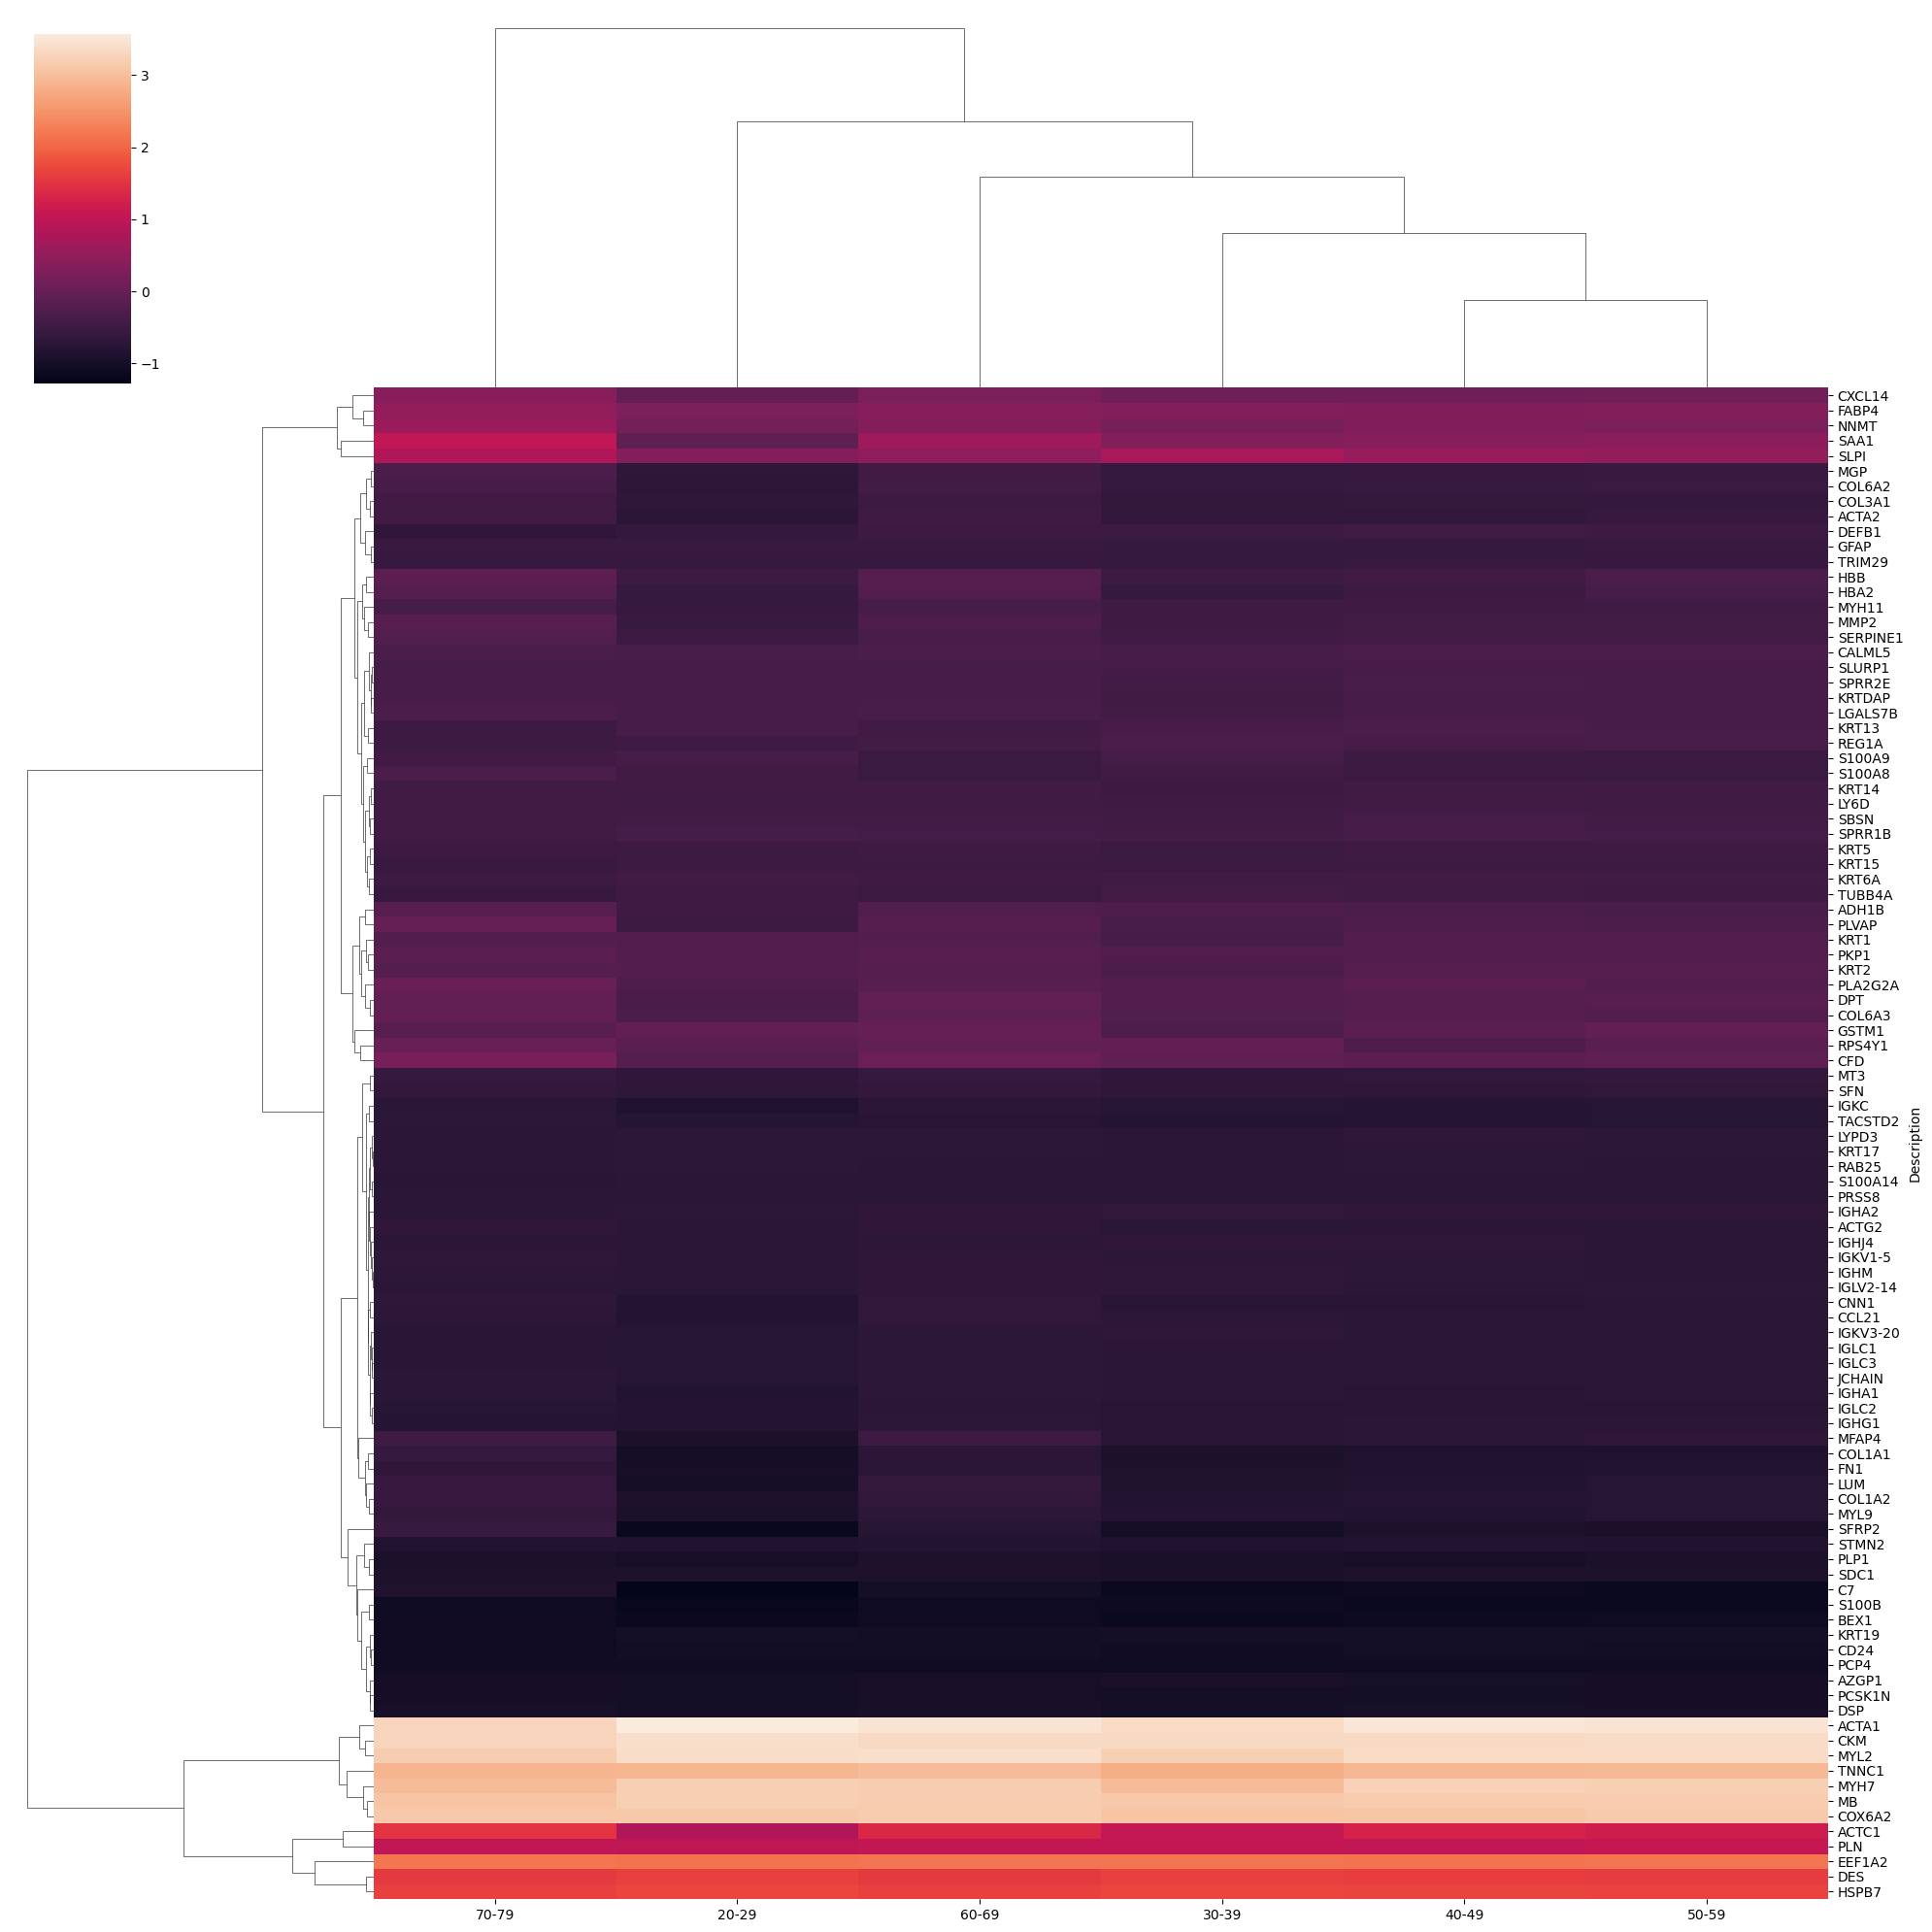

In [100]:
Muscle_grouping=Gtex_top_var_zscore.T.groupby(mapping_col).get_group("Muscle").T
Muscle_age_mapping=Muscle_grouping.columns.map(sample_metadata.set_index("SAMPID")["AGE"])
sb.clustermap(Muscle_grouping.T.groupby(Muscle_age_mapping).mean().T.iloc[:100,:],yticklabels=True,figsize=(20,20))
mpl.pyplot.show()

### Visualisation 15
**Changes in expression in gene between Sex (in Muscle tissue)**

can see sex specific genes RPS4Y1 

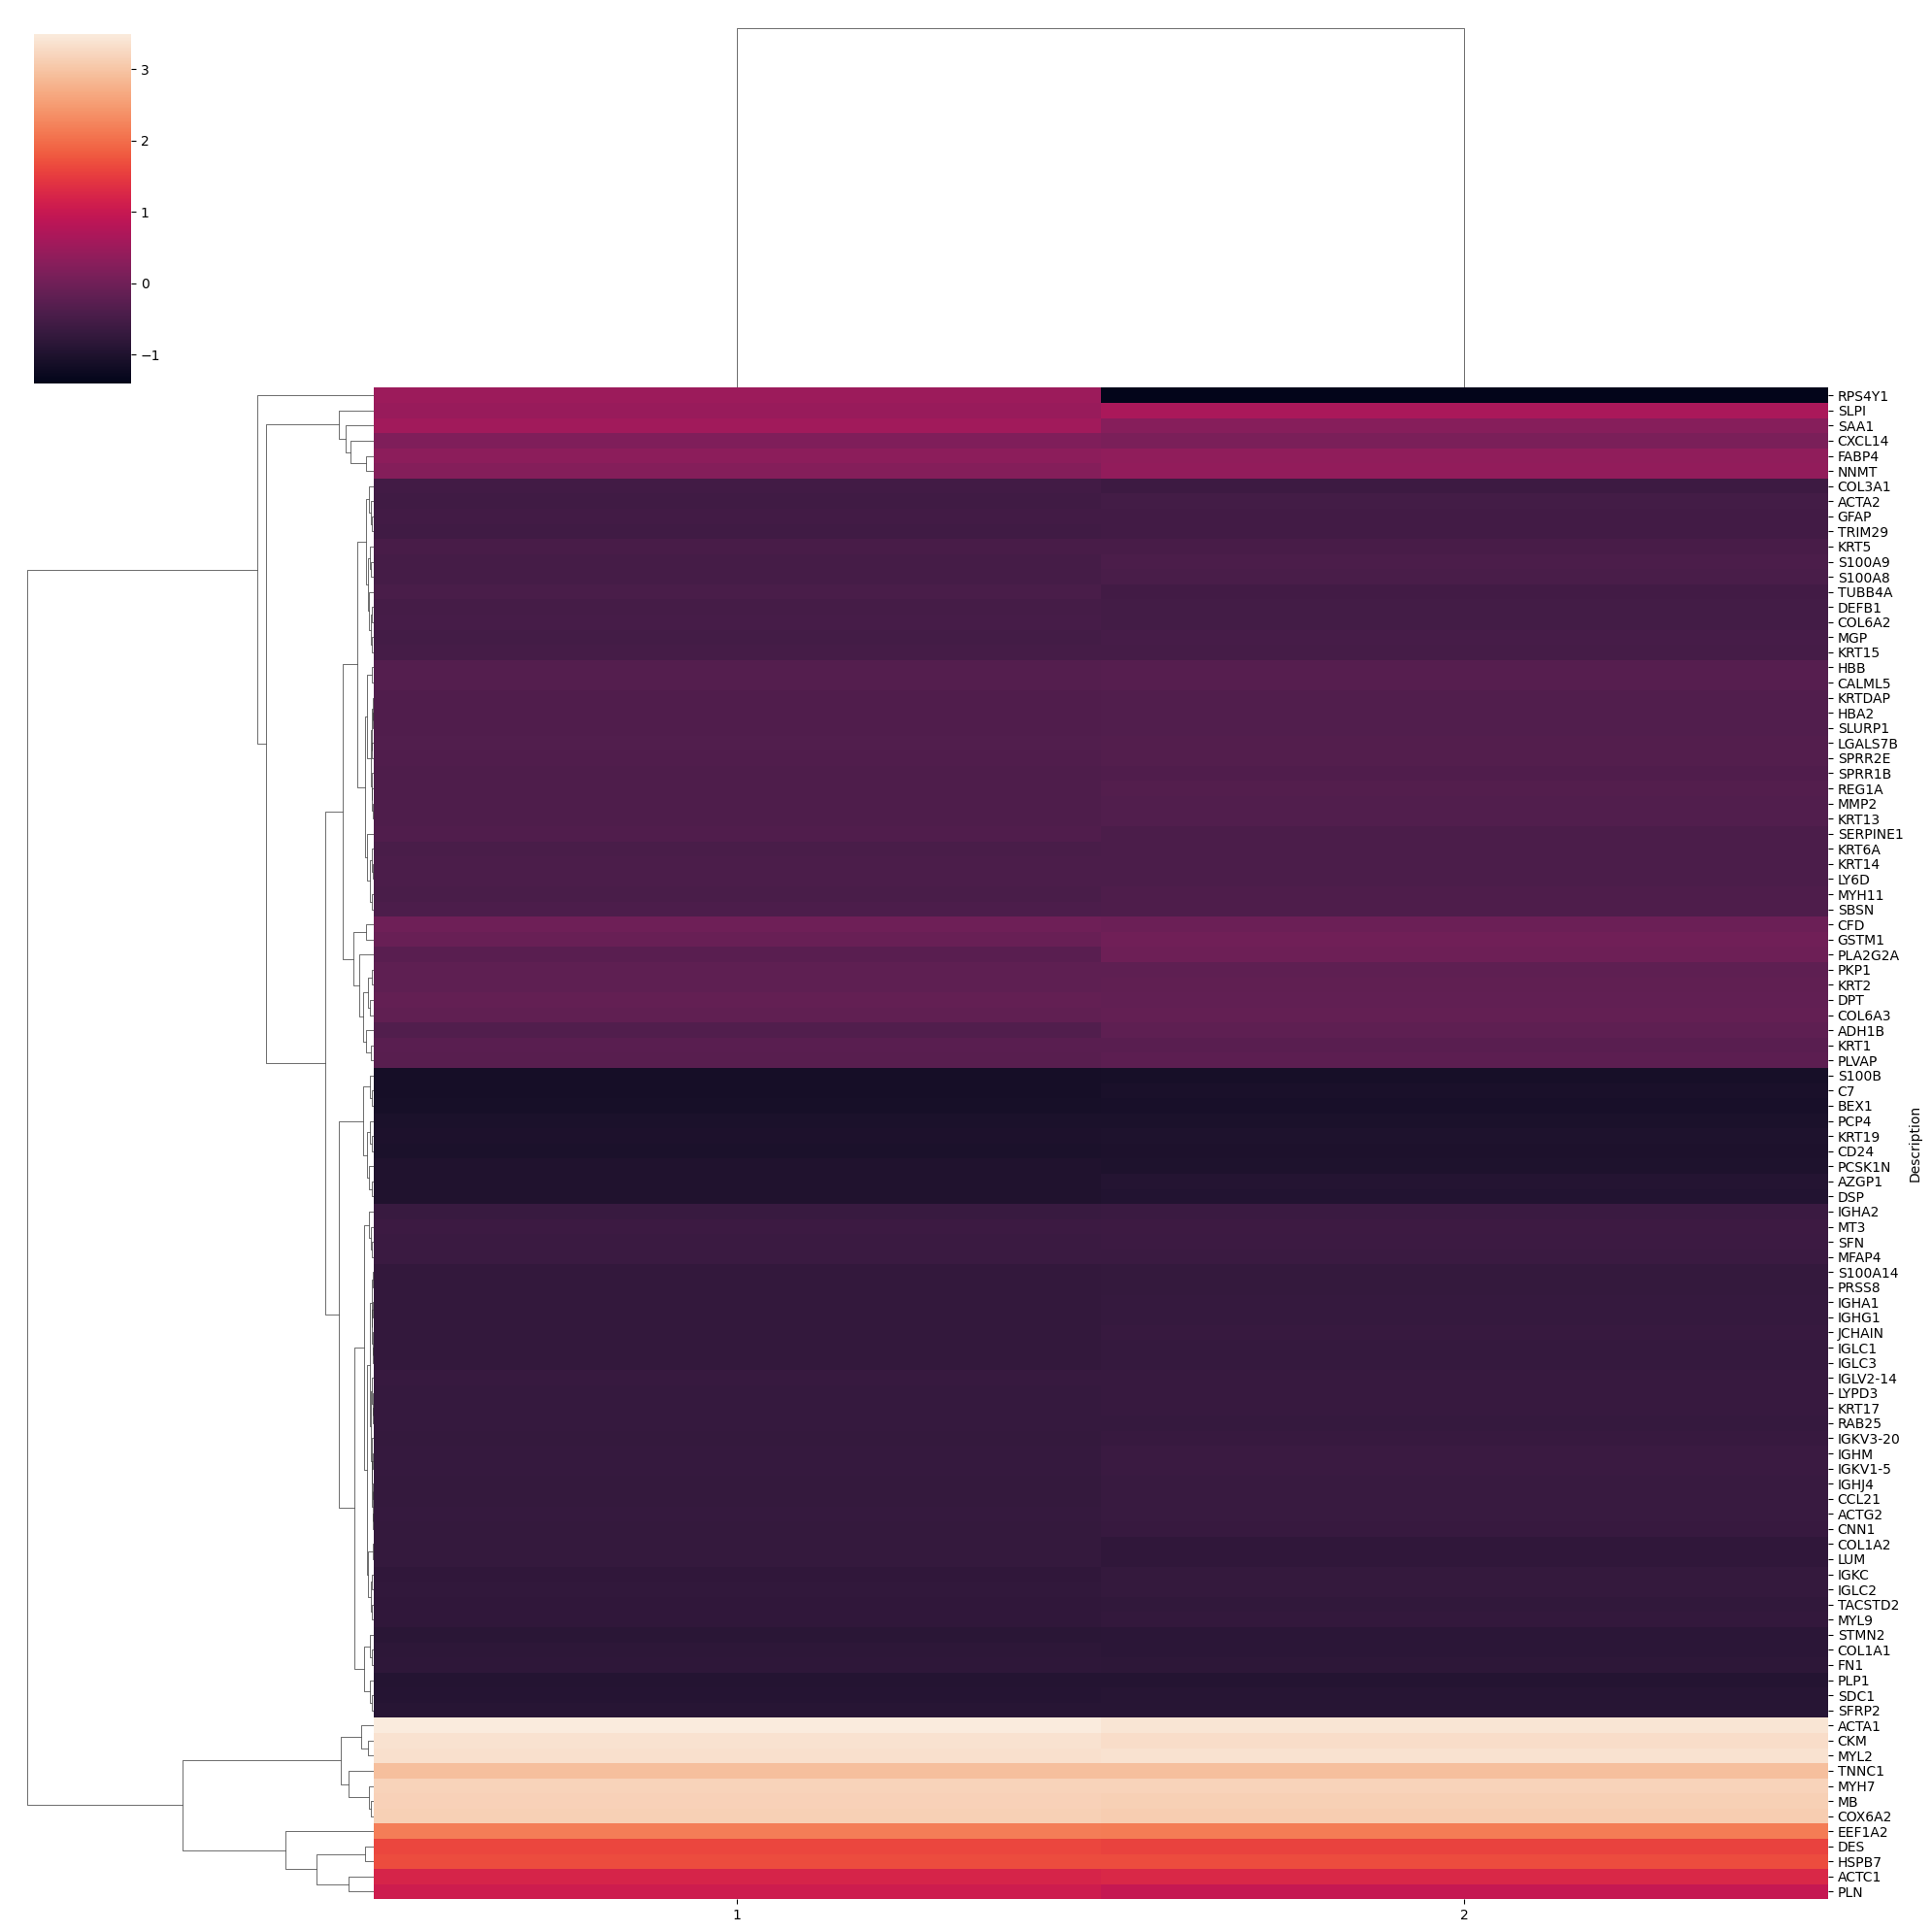

In [102]:
Muscle_Sex_mapping=Muscle_grouping.columns.map(sample_metadata.set_index("SAMPID")["SEX"])
sb.clustermap(Muscle_grouping.T.groupby(Muscle_Sex_mapping).mean().T.iloc[:100,:],yticklabels=True,figsize=(20,20))
mpl.pyplot.show()

In [103]:
sample_metadata

SAMPID            SMTS  \
0           GTEX-1117F-0005-SM-HL9SH           Blood   
1      GTEX-1117F-0011-R10b-SM-GI4VE           Brain   
2      GTEX-1117F-0011-R11b-SM-GIN8R           Brain   
3       GTEX-1117F-0011-R2b-SM-GI4VL           Brain   
4       GTEX-1117F-0011-R3a-SM-GJ3PJ           Brain   
...                              ...             ...   
19611        GTEX-ZZPU-2326-SM-GOQYU           Nerve   
19612        GTEX-ZZPU-2426-SM-5E44I    Blood Vessel   
19613        GTEX-ZZPU-2526-SM-GOQZ3            Skin   
19614        GTEX-ZZPU-2626-SM-5E45Y          Muscle   
19615        GTEX-ZZPU-2726-SM-5NQ8O  Adipose Tissue   

                                          SMTSD      SUBJID  SEX    AGE  \
0                                   Whole Blood  GTEX-1117F    2  60-69   
1                  Brain - Frontal Cortex (BA9)  GTEX-1117F    2  60-69   
2                 Brain - Cerebellar Hemisphere  GTEX-1117F    2  60-69   
3                      Brain - Substantia nigra  GTEX-1117F    2  60-69   
4      Brain - Anterior cingulate cortex (BA24)  GTEX-1117F    2  60-69   
...                                         ...         ...  ...    ...   
19611                            Nerve - Tibial   GTEX-ZZPU    2  50-59   
19612                           Artery - Tibial   GTEX-ZZPU    2  50-59   
19613            Skin - Sun Exposed (Lower leg)   GTEX-ZZPU    2  50-59   
19614                         Muscle - Skeletal   GTEX-ZZPU    2  50-59   
19615                    Adipose - Subcutaneous   GTEX-ZZPU    2  50-59   

       DTHHRDY  
0          4.0  
1          4.0  
2          4.0  
3          4.0  
4          4.0  
...        ...  
19611      0.0  
19612      0.0  
19613      0.0  
19614      0.0  
19615      0.0  

[19616 rows x 7 columns]

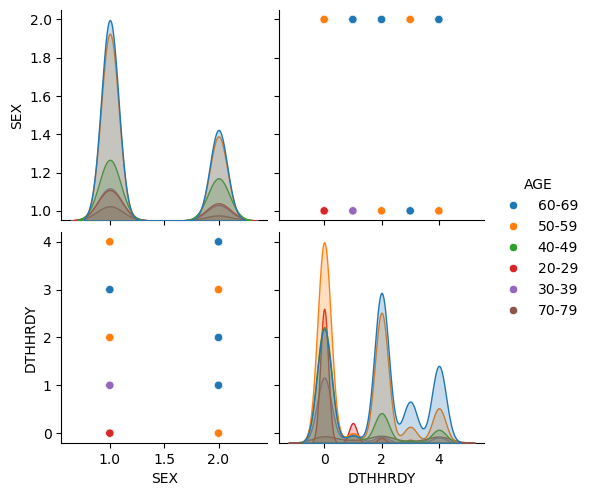

In [104]:
sb.pairplot(sample_metadata,hue="AGE")

# Machine learning 

going to try and apply neural network learning method to predict tissue type, going to take try and stratify sample based on tissue type and do 75% 25% train test split.

Maybe do random forest first then NN

## Random Forest

Random forest uses multiple decision trees and uses the combined results of the decision trees to classify items
in this case tissue type

will assess using accuracy , precision, recall and f1 score

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,accuracy_score,precision_recall_curve,balanced_accuracy_score

In [107]:
mapping_col

Index(['Blood', 'Brain', 'Brain', 'Brain', 'Brain', 'Brain', 'Brain', 'Brain',
       'Brain', 'Adipose Tissue',
       ...
       'Thyroid', 'Stomach', 'Esophagus', 'Ovary', 'Vagina', 'Nerve',
       'Blood Vessel', 'Skin', 'Muscle', 'Adipose Tissue'],
      dtype='object', length=19616)

In [108]:
X=Gtex_top_var.T
Y=mapping_col

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=24,stratify=Y) #stratify to reflect actual database and avoid biases due to exposure to data


In [110]:
rf=RandomForestClassifier(n_estimators=30,random_state=18)

In [111]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30, random_state=18)

In [112]:
Y_pred=rf.predict(X_test)

In [113]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.9872579001019368


In [114]:
balanced_accuracy_score(Y_test, Y_pred)

0.9351707925954698

In [115]:
report = classification_report(Y_test, Y_pred)

In [116]:
report

'                 precision    recall  f1-score   support\n\n Adipose Tissue       0.94      1.00      0.97       130\n  Adrenal Gland       1.00      1.00      1.00        30\n        Bladder       0.89      1.00      0.94         8\n          Blood       1.00      1.00      1.00       113\n   Blood Vessel       1.00      0.98      0.99       143\n          Brain       1.00      1.00      1.00       324\n         Breast       1.00      0.90      0.95        51\n   Cervix Uteri       1.00      0.20      0.33         5\n          Colon       0.98      0.97      0.97        90\n      Esophagus       0.98      1.00      0.99       158\n Fallopian Tube       1.00      0.33      0.50         3\n          Heart       0.99      1.00      0.99        91\n         Kidney       1.00      1.00      1.00        12\n          Liver       1.00      1.00      1.00        26\n           Lung       1.00      1.00      1.00        60\n         Muscle       0.99      1.00      0.99        82\n          N

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


## Visualisation 16
**Confusion Matrix**

confusion matrices show the difference between the actual labels and the predicted labels for the test set,

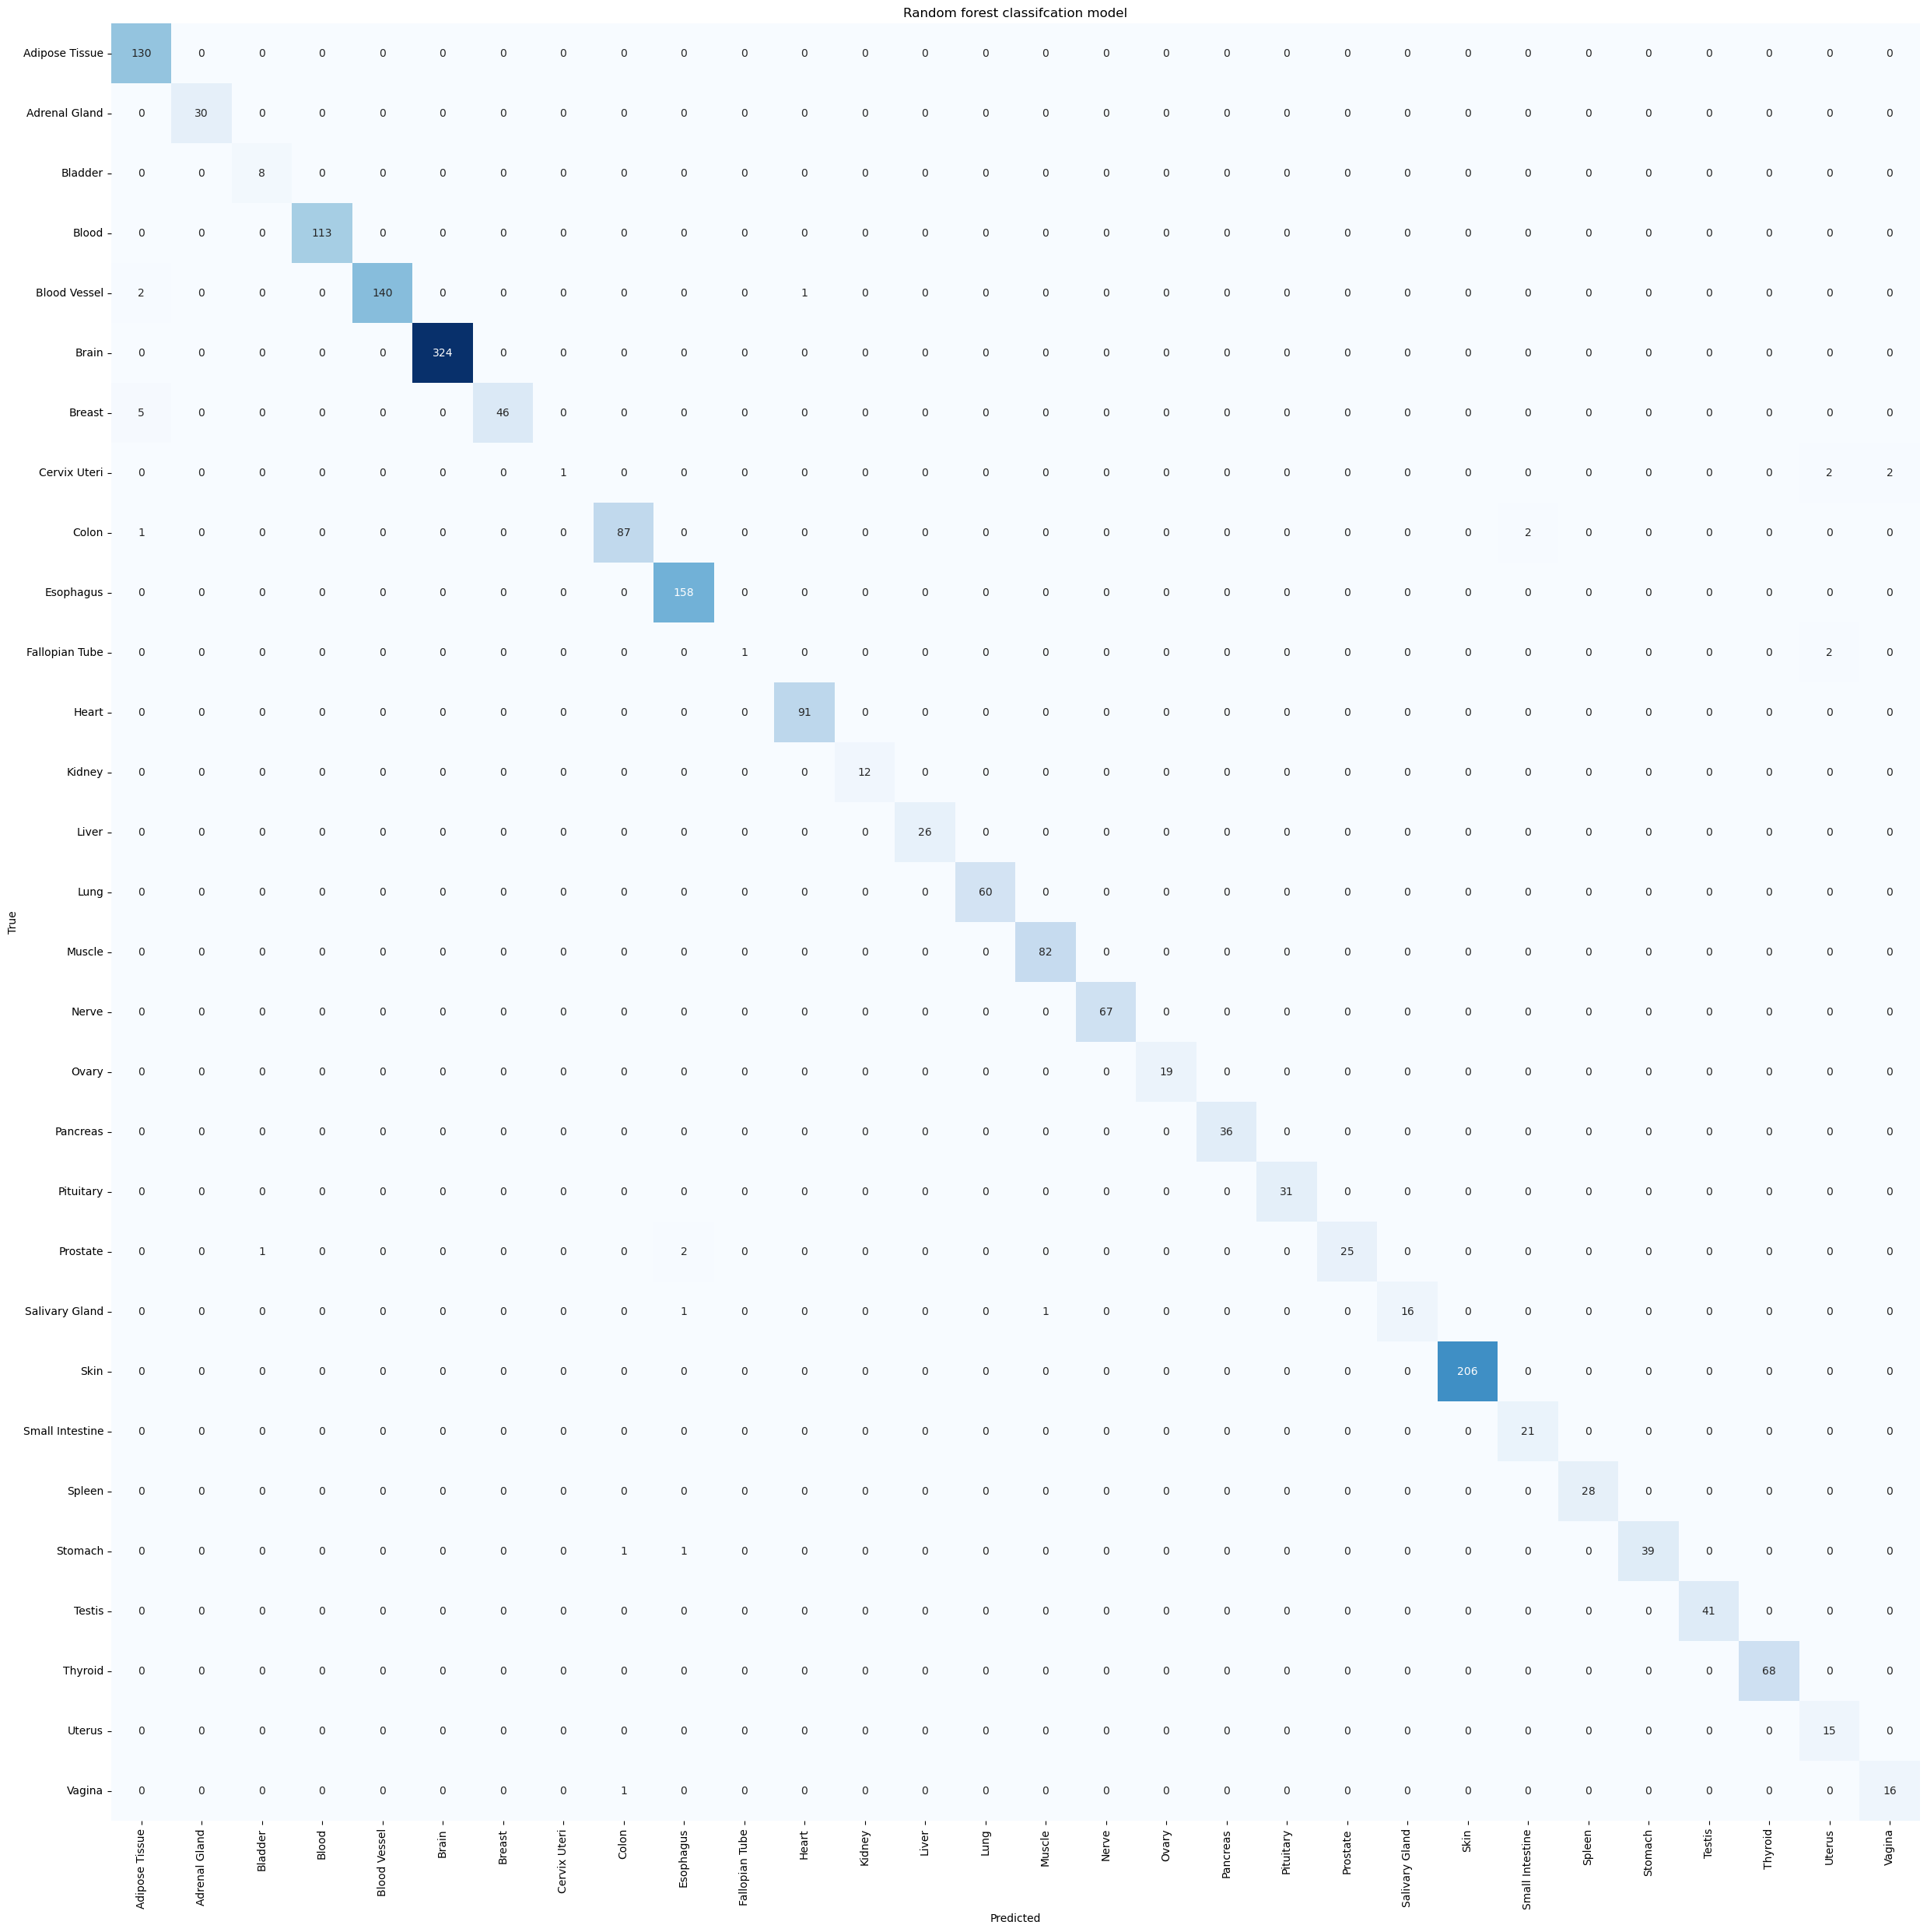

In [119]:
confusion_matrix(Y_test,Y_pred,)
mpl.pyplot.figure(figsize=(30,30))
sb.heatmap(confusion_matrix(Y_test,Y_pred,labels=sorted(mapping_col.unique())),annot=True,fmt="d",cbar=False,cmap="Blues",
           yticklabels=sorted(mapping_col.unique()),
          xticklabels=sorted(mapping_col.unique()))
mpl.pyplot.title("Random forest classifcation model")
mpl.pyplot.xlabel("Predicted")
mpl.pyplot.ylabel("True")
mpl.pyplot.savefig("Figures/Random_Forest_confusion_matrix.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()


In [120]:
Y_test.value_counts()

Brain              324
Skin               206
Esophagus          158
Blood Vessel       143
Adipose Tissue     130
Blood              113
Heart               91
Colon               90
Muscle              82
Thyroid             68
Nerve               67
Lung                60
Breast              51
Stomach             41
Testis              41
Pancreas            36
Pituitary           31
Adrenal Gland       30
Prostate            28
Spleen              28
Liver               26
Small Intestine     21
Ovary               19
Salivary Gland      18
Vagina              17
Uterus              15
Kidney              12
Bladder              8
Cervix Uteri         5
Fallopian Tube       3
Name: count, dtype: int64

In [121]:
precision_score(Y_test,Y_pred,average=None)

array([0.94202899, 1.        , 0.88888889, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97752809, 0.97530864,
       1.        , 0.98913043, 1.        , 1.        , 1.        ,
       0.98795181, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.91304348, 1.        ,
       1.        , 1.        , 1.        , 0.78947368, 0.88888889])

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay


In [123]:
sorted(Y_test.unique())

['Adipose Tissue',
 'Adrenal Gland',
 'Bladder',
 'Blood',
 'Blood Vessel',
 'Brain',
 'Breast',
 'Cervix Uteri',
 'Colon',
 'Esophagus',
 'Fallopian Tube',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Muscle',
 'Nerve',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Salivary Gland',
 'Skin',
 'Small Intestine',
 'Spleen',
 'Stomach',
 'Testis',
 'Thyroid',
 'Uterus',
 'Vagina']

## Visualisation 17

**Heatmap Metrics for each tissue type**
Recall, precision and F1 for each tissue type

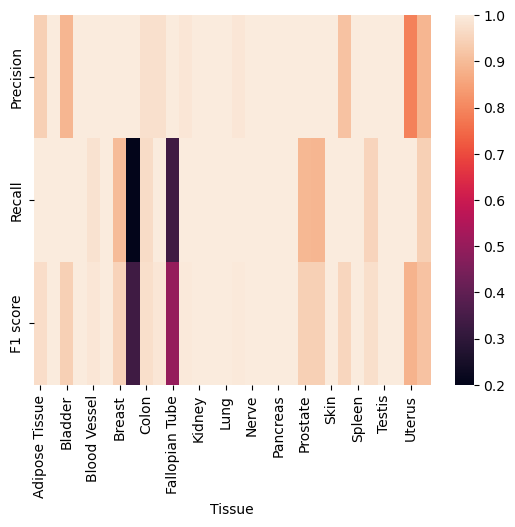

In [138]:
n_classes=len(Y_test.unique())
precision=precision_score(Y_test, Y_pred,average=None)
recall=recall_score(Y_test, Y_pred,average=None)
f1=f1_score(Y_test, Y_pred,average=None)

metrics_=pd.DataFrame(zip(sorted(Y_test.unique()),precision,recall,f1),columns=["Tissue","Precision","Recall","F1 score"])


metrics_.set_index("Tissue",inplace=True)
#metrics_.drop("Tissue",axis=1)
metrics_

sb.heatmap(metrics_.T)
mpl.pyplot.show()

## Visualisation 18

***Recall among classes**

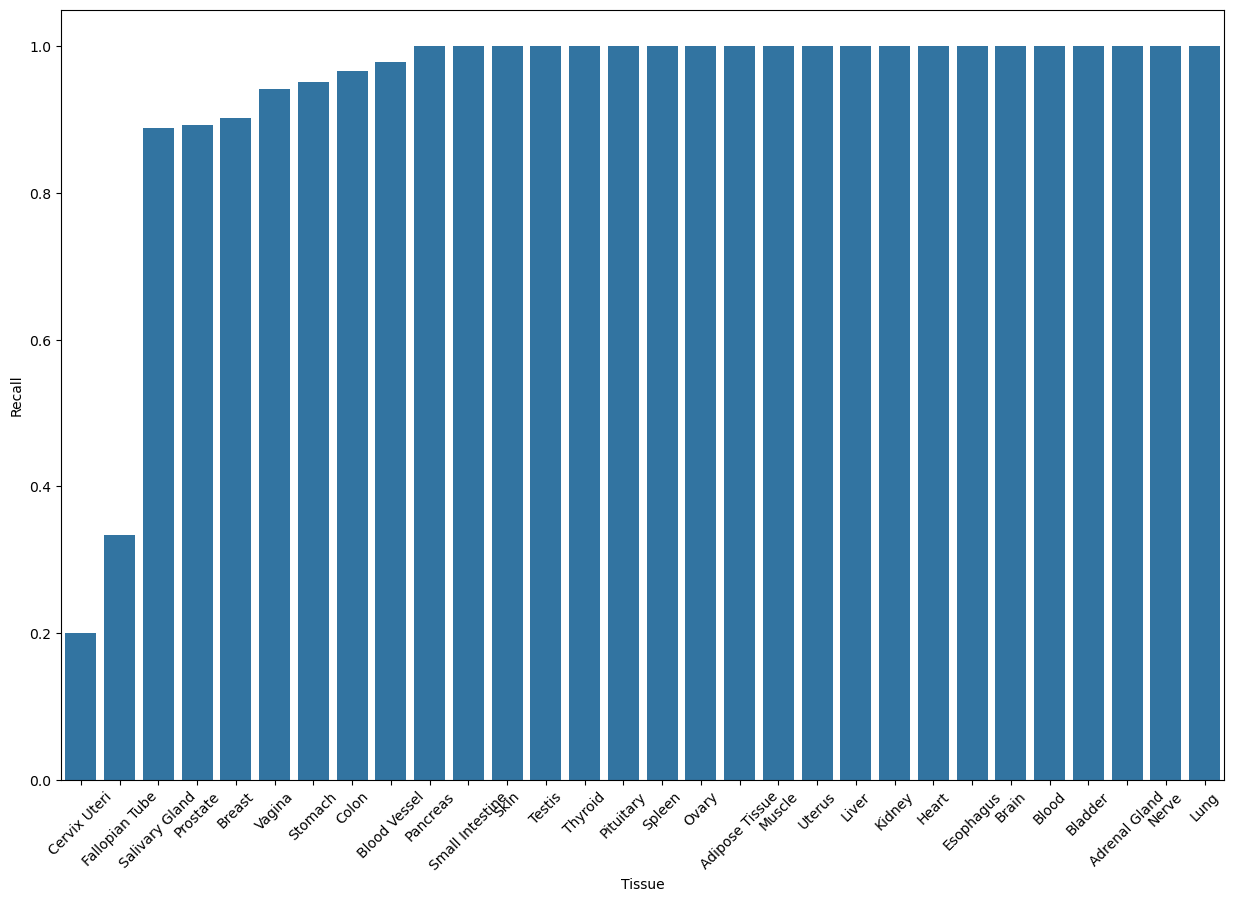

In [140]:
mpl.pyplot.figure(figsize=(15,10))
sb.barplot(metrics_.sort_values(by="Recall"),y="Recall",x=metrics_.sort_values(by="Recall").index)
mpl.pyplot.xticks(rotation=45)
mpl.pyplot.savefig("Figures/RF_recall.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

### Neural networks

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import optimizers
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=50,stratify=Y)

encode=LabelEncoder()
Y_train_int=encode.fit_transform(Y_train)
Y_test_int=encode.transform(Y_test)

Y_train_cat=tf.keras.utils.to_categorical(Y_train_int,num_classes=30)
Y_test_cat=tf.keras.utils.to_categorical(Y_test_int,num_classes=30)


In [147]:
model=Sequential([
    Input(shape=(1000,)),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(30,activation='softmax')])


In [149]:
model.compile(optimizer=optimizers.AdamW(), loss='categorical_crossentropy', metrics=['accuracy'])

callback=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [151]:
history=model.fit(X_train,Y_train_cat,validation_split=0.2,callbacks=callback,shuffle=True,epochs=20,verbose=1)

Epoch 1/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8413 - loss: 0.8786 - val_accuracy: 0.9663 - val_loss: 0.1113
Epoch 2/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9708 - loss: 0.0903 - val_accuracy: 0.9705 - val_loss: 0.0928
Epoch 3/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9742 - loss: 0.0898 - val_accuracy: 0.9612 - val_loss: 0.1496
Epoch 4/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9806 - loss: 0.0674 - val_accuracy: 0.9830 - val_loss: 0.0552
Epoch 5/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9834 - loss: 0.0521 - val_accuracy: 0.9839 - val_loss: 0.0543
Epoch 6/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.9827 - val_loss: 0.0546
Epoch 7/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9912 - loss: 0.0335 - val_accuracy: 0.9788 - val_loss: 0.0642
Epoch 8/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9868 - loss: 0.0453 - val_accuracy: 0.

In [153]:
Y_pred_prob=model.predict(X_test)
Y_pred=Y_pred_prob.argmax(axis=1)
Y_pred_labels=encode.inverse_transform(Y_pred)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [155]:
accuracy_score(Y_test_int,Y_pred)

0.9959225280326198

In [157]:
encode.classes_

array(['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood',
       'Blood Vessel', 'Brain', 'Breast', 'Cervix Uteri', 'Colon',
       'Esophagus', 'Fallopian Tube', 'Heart', 'Kidney', 'Liver', 'Lung',
       'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate',
       'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen', 'Stomach',
       'Testis', 'Thyroid', 'Uterus', 'Vagina'], dtype=object)

## Visualisation 19
**Confusion Matrix**

confusion matrices show the difference between the actual labels and the predicted labels for the test set,

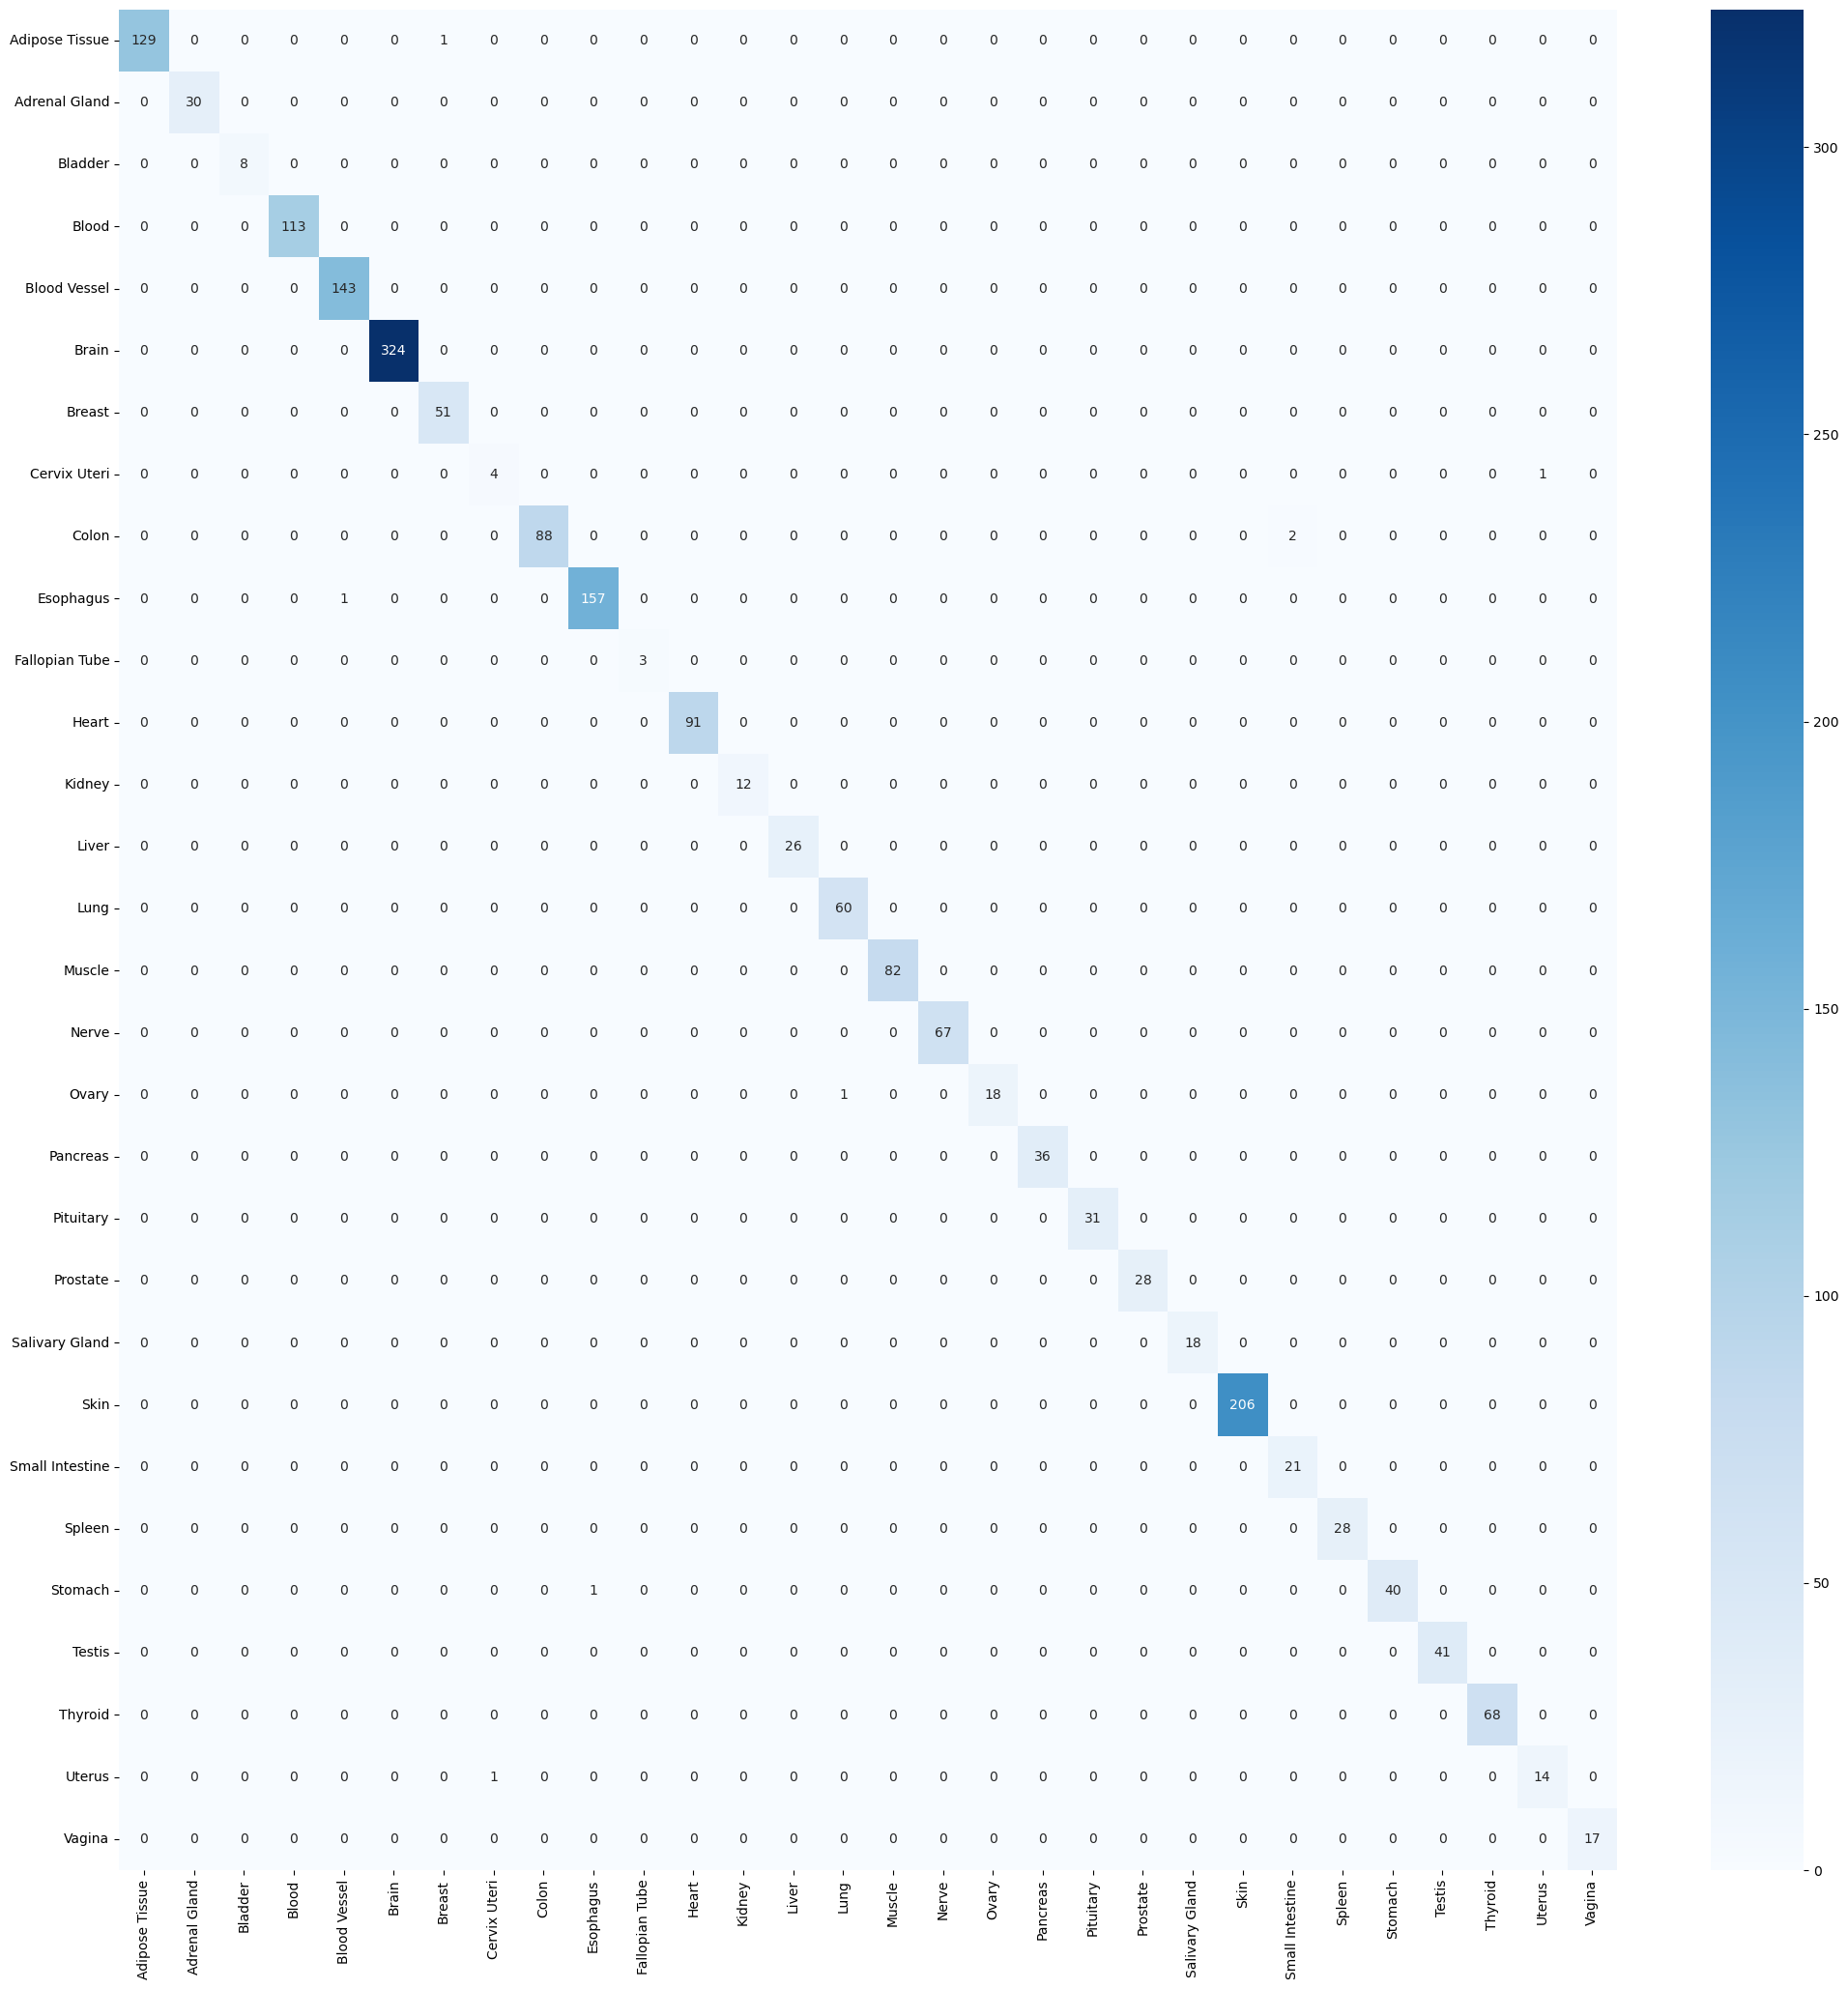

In [160]:
mpl.pyplot.figure(figsize=(25,25))
sb.heatmap(confusion_matrix(Y_test,Y_pred_labels),cmap="Blues",annot=True,fmt="d",xticklabels=encode.classes_,yticklabels=encode.classes_)
mpl.pyplot.savefig("Figures/Neural_network_confusion_matrix.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

In [162]:
precision_score(Y_test,Y_pred_labels,average=None)

array([1.        , 1.        , 1.        , 1.        , 0.99305556,
       1.        , 0.98076923, 0.8       , 1.        , 0.99367089,
       1.        , 1.        , 1.        , 1.        , 0.98360656,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.91304348, 1.        ,
       1.        , 1.        , 1.        , 0.93333333, 1.        ])

In [164]:
history.history

{'accuracy': [0.9252283573150635,
  0.969482421875,
  0.975359320640564,
  0.9819443225860596,
  0.9836437106132507,
  0.9850598573684692,
  0.9872548580169678,
  0.9862635135650635,
  0.9893790483474731,
  0.9863343238830566,
  0.9924237132072449,
  0.991715669631958,
  0.9885293245315552,
  0.9881753325462341,
  0.9934858083724976,
  0.9931317567825317,
  0.9919280409812927,
  0.9931317567825317,
  0.9937690496444702,
  0.9895206689834595],
 'loss': [0.33538416028022766,
  0.09651105850934982,
  0.08465474843978882,
  0.061169832944869995,
  0.051460303366184235,
  0.047092586755752563,
  0.047681935131549835,
  0.045926209539175034,
  0.03224729374051094,
  0.051101382821798325,
  0.024453263729810715,
  0.026563597843050957,
  0.037774499505758286,
  0.045204516500234604,
  0.02041570469737053,
  0.021881429478526115,
  0.02741875872015953,
  0.0202985480427742,
  0.019486483186483383,
  0.04008730873465538],
 'val_accuracy': [0.966298520565033,
  0.9705466032028198,
  0.9612007737

## Visualisation 19
Accuracy vs Validation accuracy across epochs

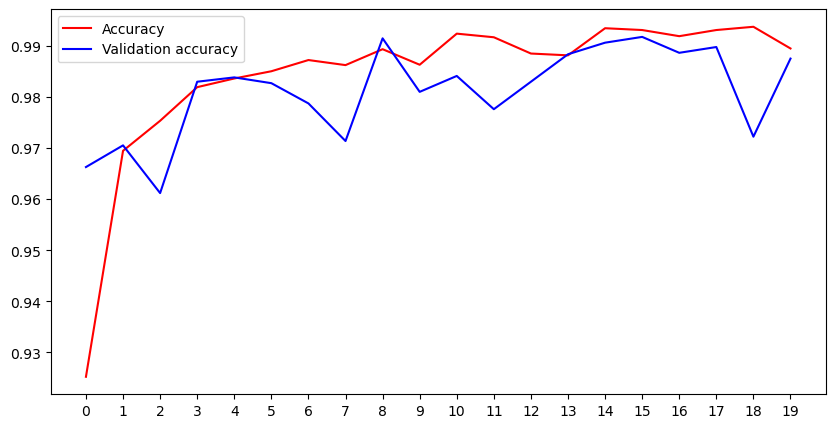

In [167]:
mpl.pyplot.figure(figsize=(10,5))
mpl.pyplot.plot(history.history["accuracy"],color="red",label="Accuracy")
mpl.pyplot.plot(history.history["val_accuracy"],color="blue",label="Validation accuracy")
mpl.pyplot.legend()
mpl.pyplot.xticks(range(0,20,1))
mpl.pyplot.savefig("Figures/Accuracy_vs_Validation_accuracy.png", dpi=300, bbox_inches="tight")

mpl.pyplot.show()


## Visualisation 20
Accuracy vs Validation loss across epochs

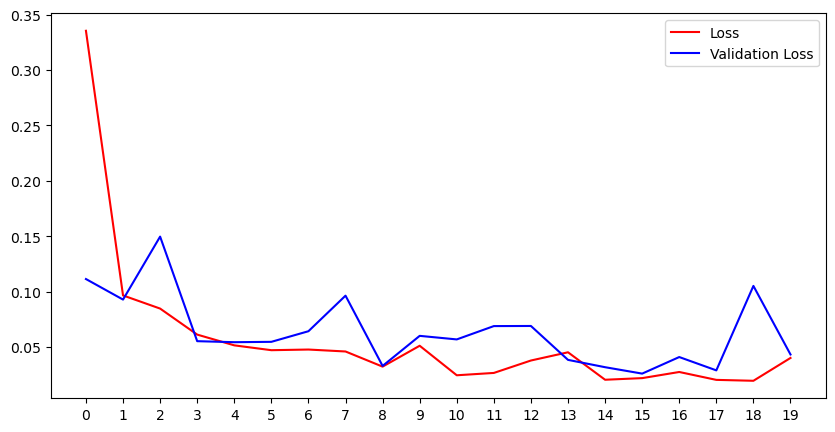

In [170]:
mpl.pyplot.figure(figsize=(10,5))
mpl.pyplot.plot(history.history["loss"],color="red",label="Loss")
mpl.pyplot.plot(history.history["val_loss"],color="blue",label="Validation Loss")
mpl.pyplot.legend()
mpl.pyplot.xticks(range(0,20,1))
mpl.pyplot.savefig("Figures/Accuracy_vs_Validation_loss.png", dpi=300, bbox_inches="tight")
mpl.pyplot.show()

## Visualisation 21
Precision vs Recall

Precision_recall_Curve function gives Precision and recall for 

In [ ]:
#mpl.pyplot.figure(figsize=(20,20))
#for i,label in enumerate(encode.classes_):
 #   Precision,Recall,_=precision_recall_curve(Y_test_cat[:,i],Y_pred_prob[:,i])
  # mpl.pyplot.plot(Recall,Precision,label=label,)
#mpl.pyplot.xlabel("Precision")
#mpl.pyplot.ylabel("Recall")
#mpl.pyplot.legend()